### Problem Statement: 
To build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

- Which variables are important to predict the price of variable?

- How do these variables describe the price of the house?

To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt
import missingno as msno

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

#Importing Predictive Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib

In [2]:
train = pd.read_csv("train.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [3]:
print("Shape of our dataset is : ",train.shape)

Shape of our dataset is :  (1168, 81)


In [4]:
#Analysing Datatypes in our dataset and Checking for null Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
#Statistical Analysis of Numerical Features in our dataset
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

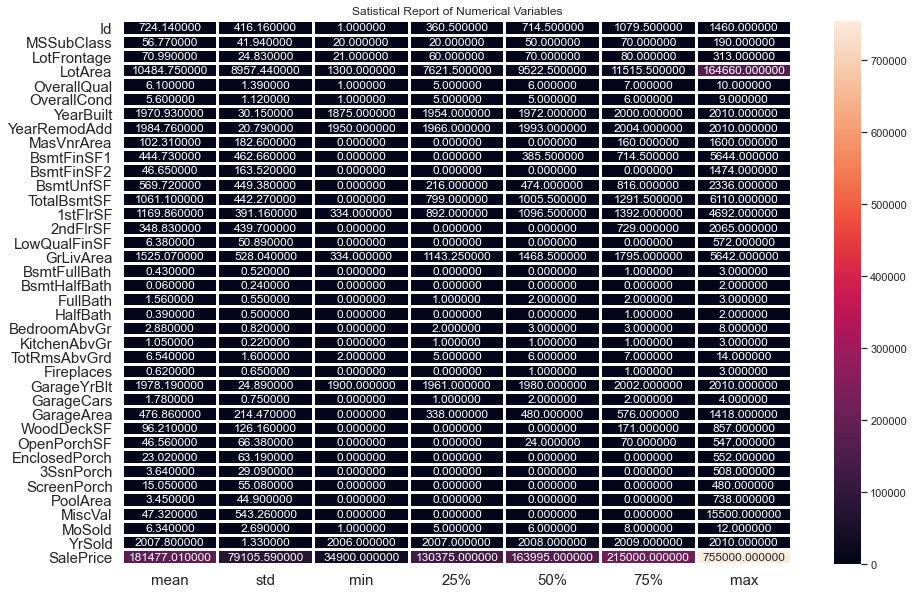

In [6]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

In [7]:
#Checking for Duplicate Values
train.duplicated().sum()

0

In [8]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
#Checking for null Values to treat them
print("\nMissing values in percentage: \n \n",train.isnull().sum()/train.shape[0]*100)
#show values in percentage


Missing values in percentage: 
 
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
Alley            93.407534
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.

<AxesSubplot:>

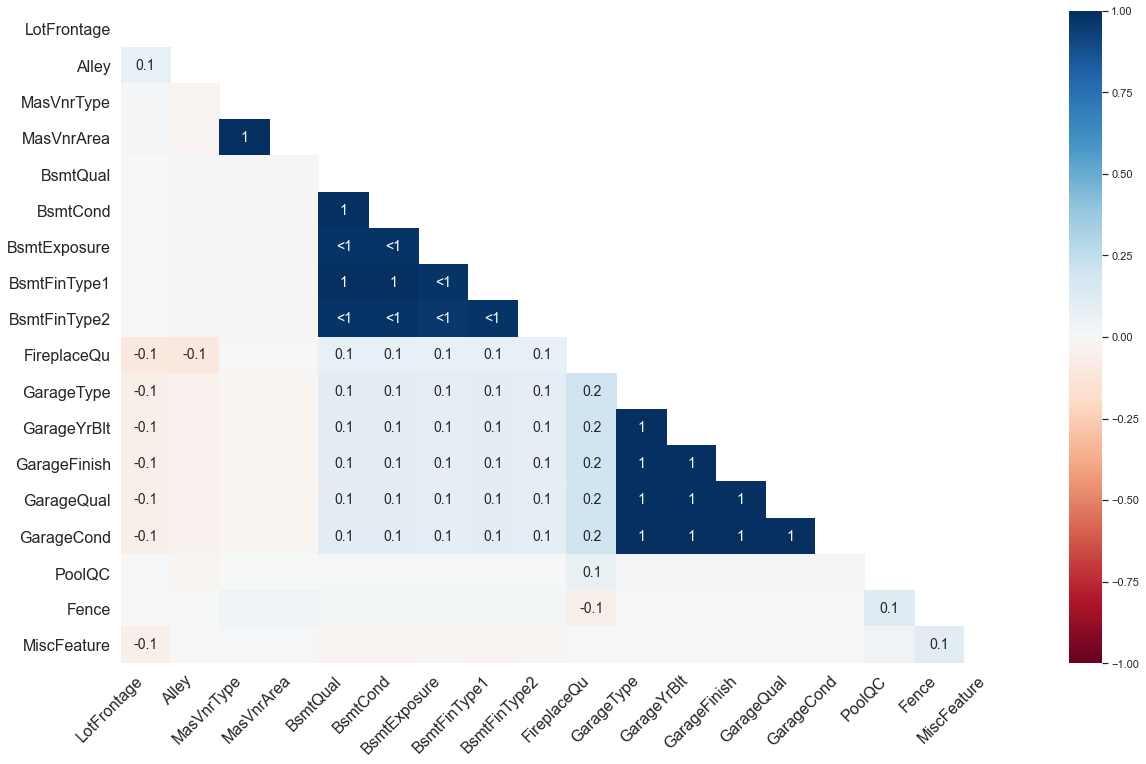

In [10]:
msno.heatmap(train)

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column.

### Data Visualization 

#### Univariate Analysis

Text(0.5, 1.0, 'Distribution of MSSubClass')

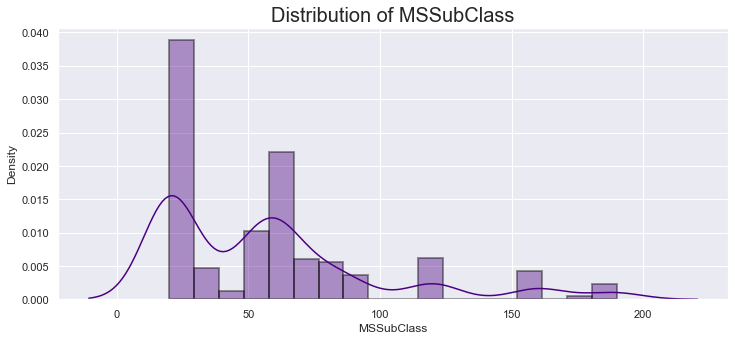

In [11]:
plt.figure(figsize = (12,5))

sns.distplot(train['MSSubClass'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of MSSubClass", fontsize = 20)

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Text(0.5, 1.0, 'MSZoning Source Categories')

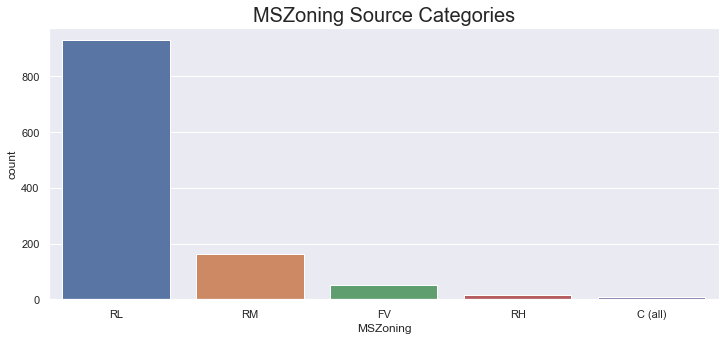

In [12]:
print(train['MSZoning'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['MSZoning'])
plt.title("MSZoning Source Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of Lotfrontage')

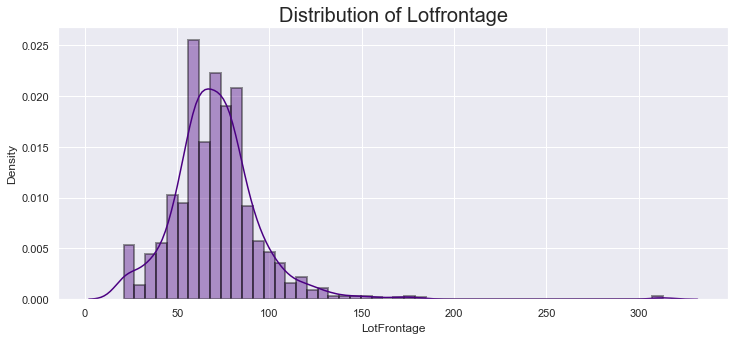

In [13]:
plt.figure(figsize = (12,5))

sns.distplot(train['LotFrontage'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of Lotfrontage", fontsize = 20)

Text(0.5, 1.0, 'Distribution of LotArea')

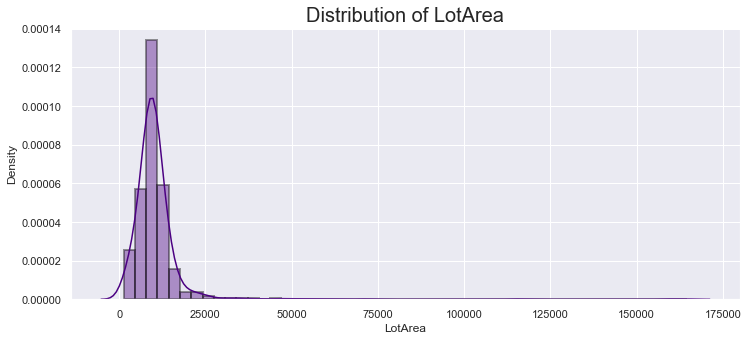

In [14]:
plt.figure(figsize = (12,5))

sns.distplot(train['LotArea'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of LotArea", fontsize = 20)

Pave    1164
Grvl       4
Name: Street, dtype: int64


Text(0.5, 1.0, 'Street Source Categories')

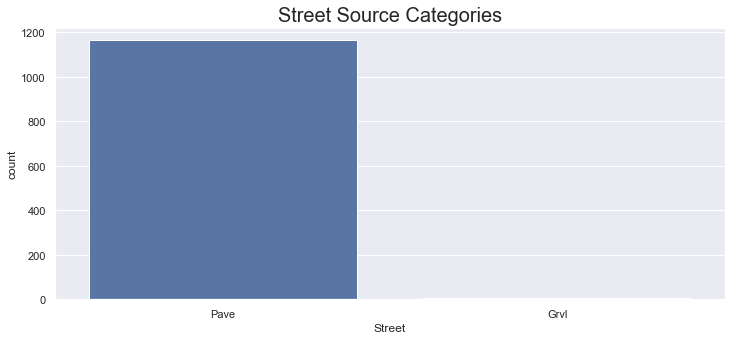

In [15]:
print(train['Street'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Street'])
plt.title("Street Source Categories", fontsize = 20)

Grvl    41
Pave    36
Name: Alley, dtype: int64


Text(0.5, 1.0, 'Alley Categories')

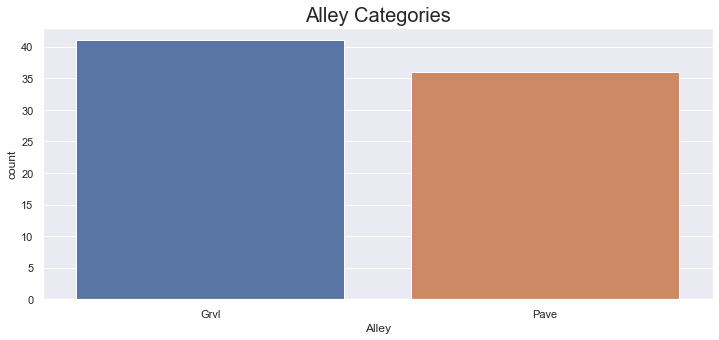

In [16]:
print(train['Alley'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Alley'])
plt.title("Alley Categories", fontsize = 20)

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


Text(0.5, 1.0, 'LotShape Categories')

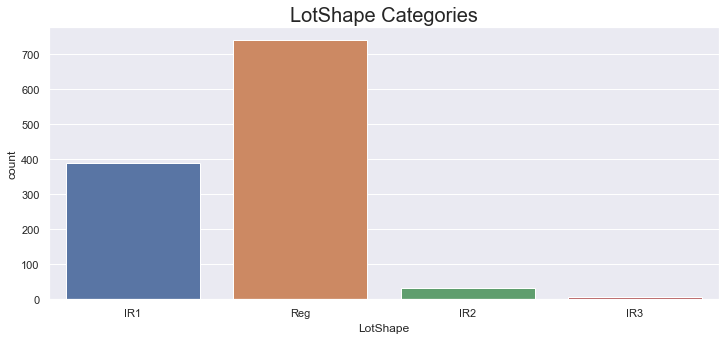

In [17]:
print(train['LotShape'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['LotShape'])
plt.title("LotShape Categories", fontsize = 20)

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Text(0.5, 1.0, 'LandContour Categories')

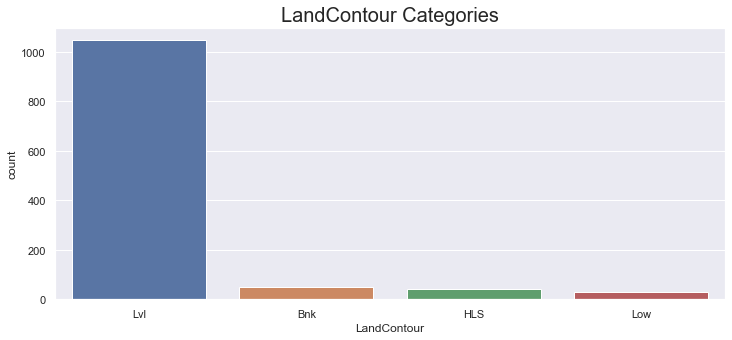

In [18]:
print(train['LandContour'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['LandContour'])
plt.title("LandContour Categories", fontsize = 20)

AllPub    1168
Name: Utilities, dtype: int64


Text(0.5, 1.0, 'Utilities Categories')

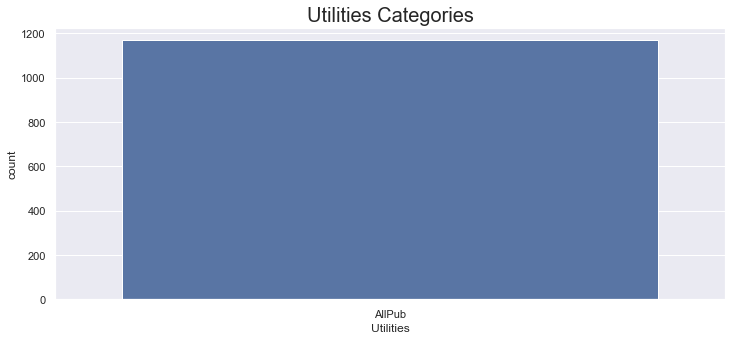

In [19]:
print(train['Utilities'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Utilities'])
plt.title("Utilities Categories", fontsize = 20)

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


Text(0.5, 1.0, 'LotConfig Categories')

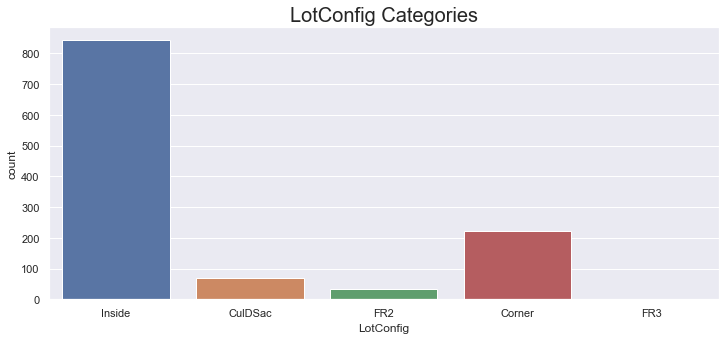

In [20]:
print(train['LotConfig'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['LotConfig'])
plt.title("LotConfig Categories", fontsize = 20)

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Text(0.5, 1.0, 'LandSlope Categories')

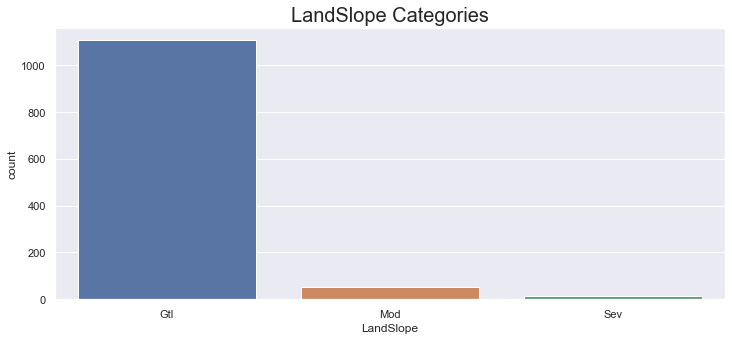

In [21]:
print(train['LandSlope'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['LandSlope'])
plt.title("LandSlope Categories", fontsize = 20)

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'NPkVill'),
  Text(1, 0, 'NAmes'),
  Text(2, 0, 'NoRidge'),
  Text(3, 0, 'NWAmes'),
  Text(4, 0, 'Gilbert'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'Edwards'),
  Text(7, 0, 'IDOTRR'),
  Text(8, 0, 'CollgCr'),
  Text(9, 0, 'Mitchel'),
  Text(10, 0, 'Crawfor'),
  Text(11, 0, 'BrDale'),
  Text(12, 0, 'StoneBr'),
  Text(13, 0, 'BrkSide'),
  Text(14, 0, 'NridgHt'),
  Text(15, 0, 'OldTown'),
  Text(16, 0, 'Somerst'),
  Text(17, 0, 'Timber'),
  Text(18, 0, 'SWISU'),
  Text(19, 0, 'SawyerW'),
  Text(20, 0, 'ClearCr'),
  Text(21, 0, 'Veenker'),
  Text(22, 0, 'Blmngtn'),
  Text(23, 0, 'MeadowV'),
  Text(24, 0, 'Blueste')])

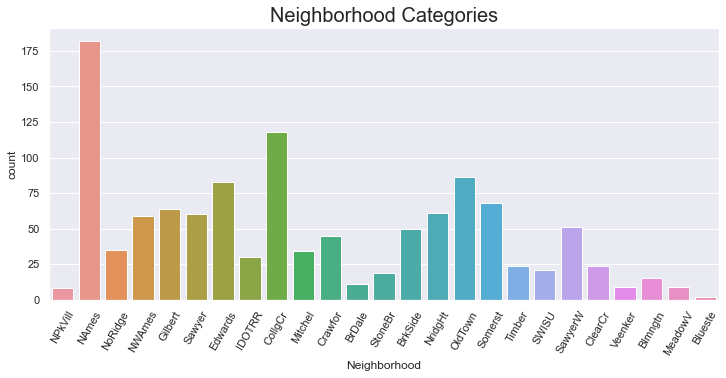

In [22]:
print(train['Neighborhood'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Neighborhood'])
plt.title("Neighborhood Categories", fontsize = 20)
plt.xticks(rotation = 60)

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


Text(0.5, 1.0, 'Condition1 Categories')

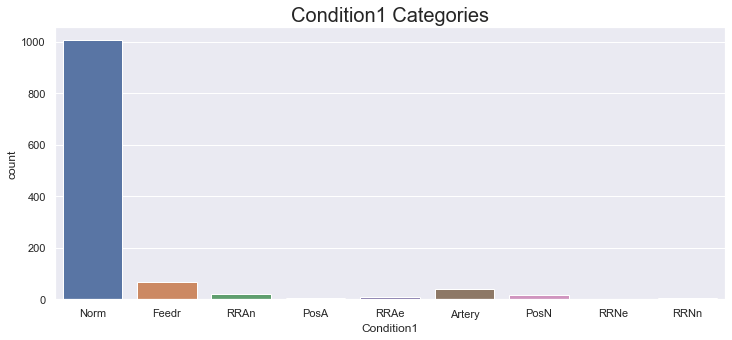

In [23]:
print(train['Condition1'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Condition1'])
plt.title("Condition1 Categories", fontsize = 20)

Norm      1154
Feedr        6
PosN         2
Artery       2
RRNn         1
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64


Text(0.5, 1.0, 'Condition2 Categories')

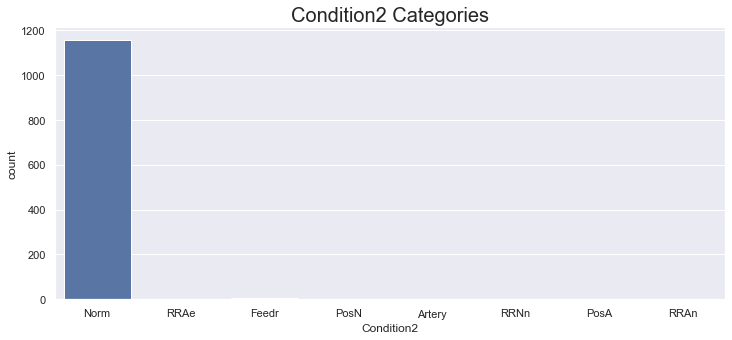

In [24]:
print(train['Condition2'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Condition2'])
plt.title("Condition2 Categories", fontsize = 20)

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


Text(0.5, 1.0, 'BldgType Categories')

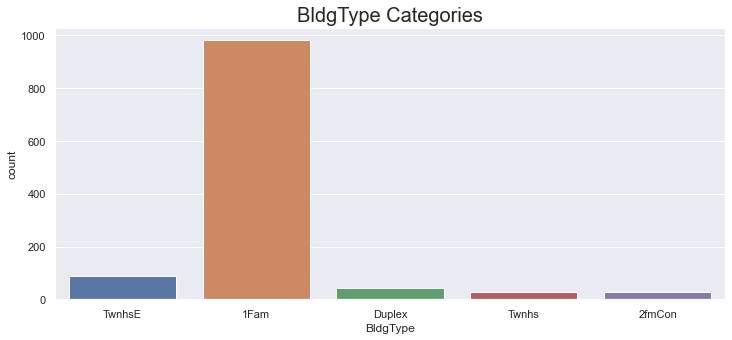

In [25]:
print(train['BldgType'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BldgType'])
plt.title("BldgType Categories", fontsize = 20)

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


Text(0.5, 1.0, 'HouseStyle Categories')

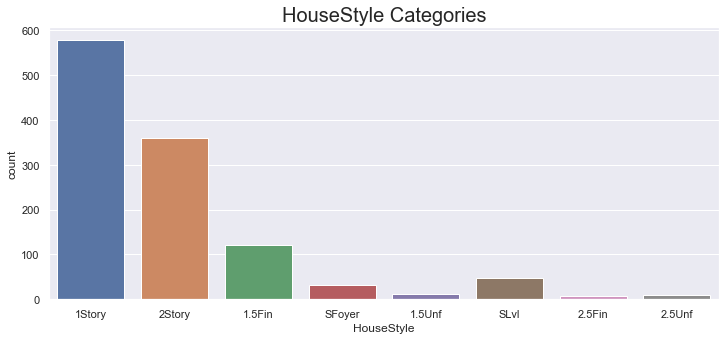

In [26]:
print(train['HouseStyle'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['HouseStyle'])
plt.title("HouseStyle Categories", fontsize = 20)

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


Text(0.5, 1.0, 'OverallQual Categories')

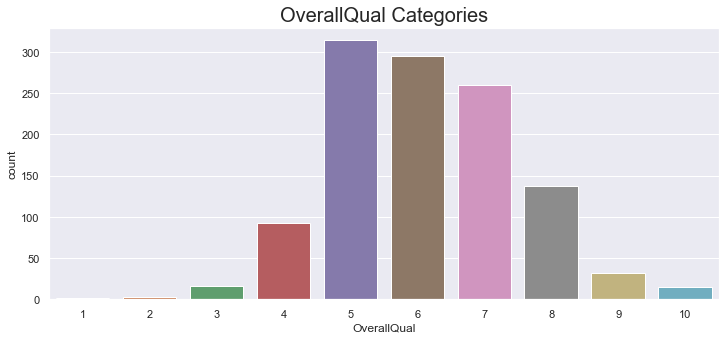

In [27]:
print(train['OverallQual'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['OverallQual'])
plt.title("OverallQual Categories", fontsize = 20)

5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


Text(0.5, 1.0, 'OverallCond Categories')

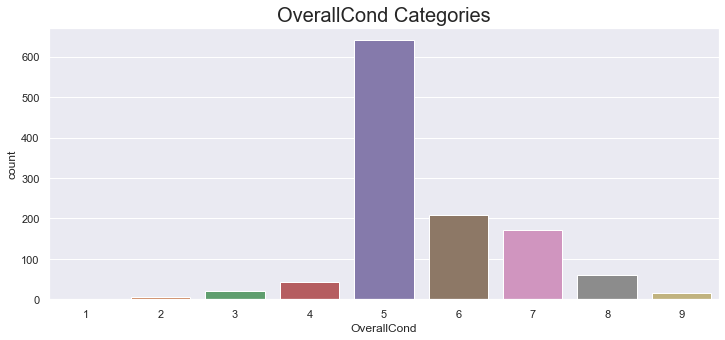

In [28]:
print(train['OverallCond'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['OverallCond'])
plt.title("OverallCond Categories", fontsize = 20)

2006    57
2005    51
2007    41
2004    37
2003    33
1977    25
1976    23
1920    22
1959    21
1971    20
1965    20
1954    20
2002    20
1998    20
1972    18
1962    18
1999    18
1957    18
1970    18
2001    18
2008    18
1958    17
1940    17
1993    16
1910    16
1966    15
1968    15
1995    15
2000    15
1960    15
2009    14
1950    14
1961    14
1956    13
1963    13
1925    13
1969    13
1955    13
1978    13
1994    13
1997    12
1967    12
1996    12
1949    12
1948    12
1964    11
1941    11
1953    10
1990    10
1988     9
1992     9
1936     9
1974     8
1915     8
1973     8
1900     8
1980     8
1916     7
1918     7
1979     7
1924     6
1923     6
1922     6
1921     6
1926     6
1946     6
1914     6
1951     6
1975     6
1928     5
1984     5
1986     5
1991     5
1937     5
1982     5
1935     5
1981     5
1930     5
1880     4
1929     4
1939     4
1952     4
1931     4
1983     4
1945     4
1985     4
1932     3
1934     3
1947     3
1912     3
1938     2

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 [Text(0, 0, '1875'),
  Text(1, 0, '1880'),
  Text(2, 0, '1882'),
  Text(3, 0, '1890'),
  Text(4, 0, '1892'),
  Text(5, 0, '1893'),
  Text(6, 0, '1898'),
  Text(7, 0, '1900'),
  Text(8, 0, '1904'),
  Text(9, 0, '1905'),
  Text(10, 0, '1906'),
  Text(11, 0, '1908'),
  Text(12, 0, '1910'),
  Text(13, 0, '1911'),
  Text(14, 0, '1912'),
  Text(15, 0, '1913'),
  Text(16, 0, '191

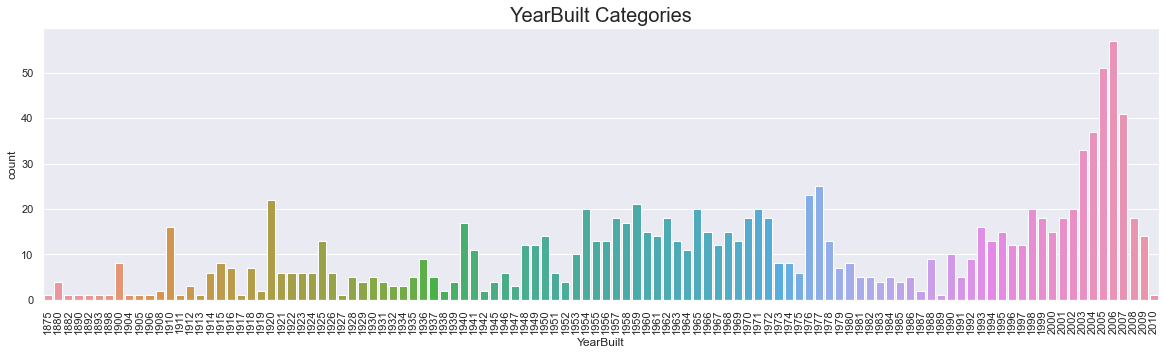

In [29]:
print(train['YearBuilt'].value_counts())
plt.figure(figsize = (20,5))
sns.countplot(train['YearBuilt'])
plt.title("YearBuilt Categories", fontsize = 20)
plt.xticks(rotation = 90)

1950    146
2006     82
2007     64
2005     57
2004     46
2000     44
2002     41
2003     37
1996     31
2008     30
1998     26
1999     25
1995     24
1970     20
1976     20
2009     20
1997     19
1993     18
1977     18
2001     16
1994     16
1971     16
1965     15
1972     15
1959     13
1962     13
1966     13
1978     13
1969     13
1992     13
1991     13
1958     12
1963     11
1954     11
1990     11
1968     11
1967     10
1960      9
1956      9
1980      9
1975      9
1979      9
1989      9
1973      8
1981      8
1953      8
1961      8
1957      8
1987      7
1964      7
1955      7
1988      7
1985      6
1982      6
1986      5
1984      5
2010      5
1974      4
1983      4
1952      4
1951      4
Name: YearRemodAdd, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '1950'),
  Text(1, 0, '1951'),
  Text(2, 0, '1952'),
  Text(3, 0, '1953'),
  Text(4, 0, '1954'),
  Text(5, 0, '1955'),
  Text(6, 0, '1956'),
  Text(7, 0, '1957'),
  Text(8, 0, '1958'),
  Text(9, 0, '1959'),
  Text(10, 0, '1960'),
  Text(11, 0, '1961'),
  Text(12, 0, '1962'),
  Text(13, 0, '1963'),
  Text(14, 0, '1964'),
  Text(15, 0, '1965'),
  Text(16, 0, '1966'),
  Text(17, 0, '1967'),
  Text(18, 0, '1968'),
  Text(19, 0, '1969'),
  Text(20, 0, '1970'),
  Text(21, 0, '1971'),
  Text(22, 0, '1972'),
  Text(23, 0, '1973'),
  Text(24, 0, '1974'),
  Text(25, 0, '1975'),
  Text(26, 0, '1976'),
  Text(27, 0, '1977'),
  Text(28, 0, '1978'),
  Text(29, 0, '1979'),
  Text(30, 0, '1980'),
  Text(31, 0, '1981

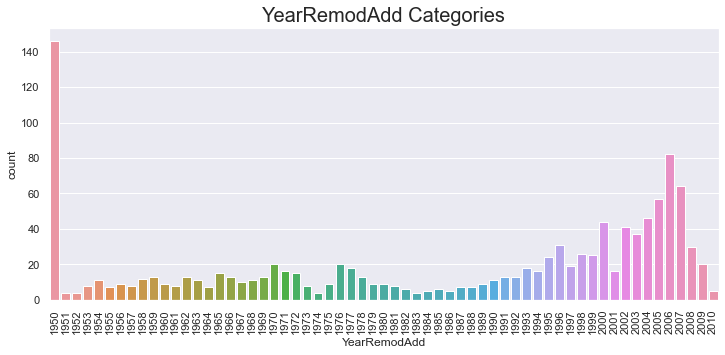

In [30]:
print(train['YearRemodAdd'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['YearRemodAdd'])
plt.title("YearRemodAdd Categories", fontsize = 20)
plt.xticks(rotation = 90)

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


Text(0.5, 1.0, 'RoofStyle Categories')

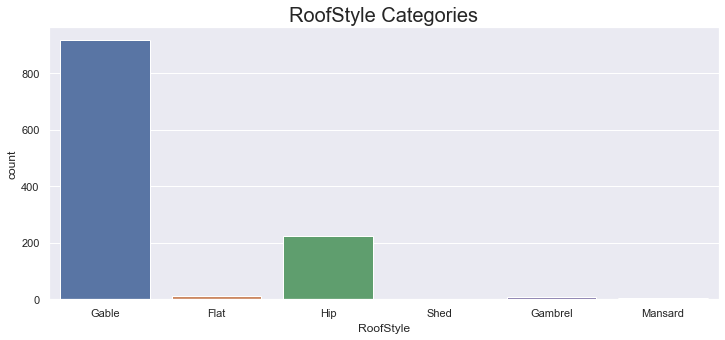

In [31]:
print(train['RoofStyle'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['RoofStyle'])
plt.title("RoofStyle Categories", fontsize = 20)

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64


Text(0.5, 1.0, 'RoofMatl Categories')

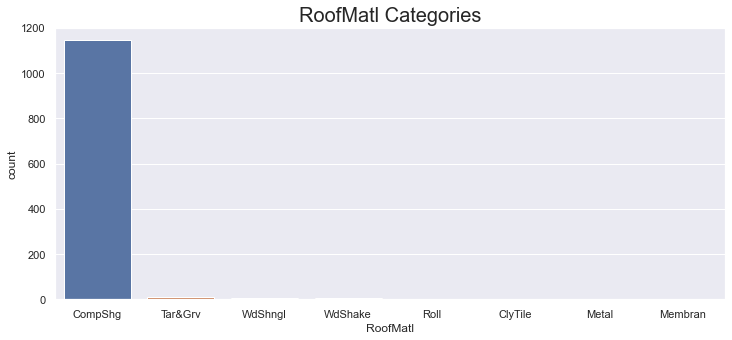

In [32]:
print(train['RoofMatl'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['RoofMatl'])
plt.title("RoofMatl Categories", fontsize = 20)

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
BrkComm      1
ImStucc      1
Name: Exterior1st, dtype: int64


Text(0.5, 1.0, 'Exterior1st Categories')

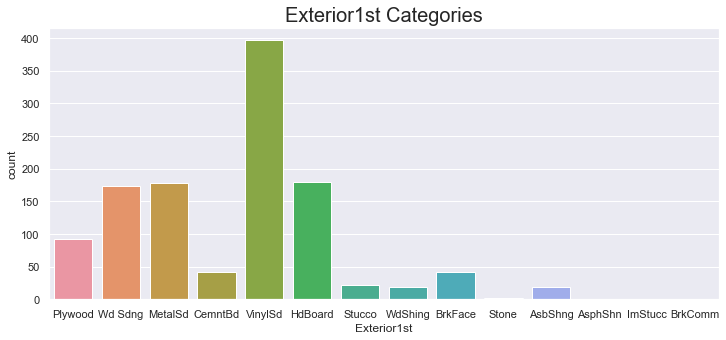

In [33]:
print(train['Exterior1st'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Exterior1st'])
plt.title("Exterior1st Categories", fontsize = 20)

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


Text(0.5, 1.0, 'Exterior2nd Categories')

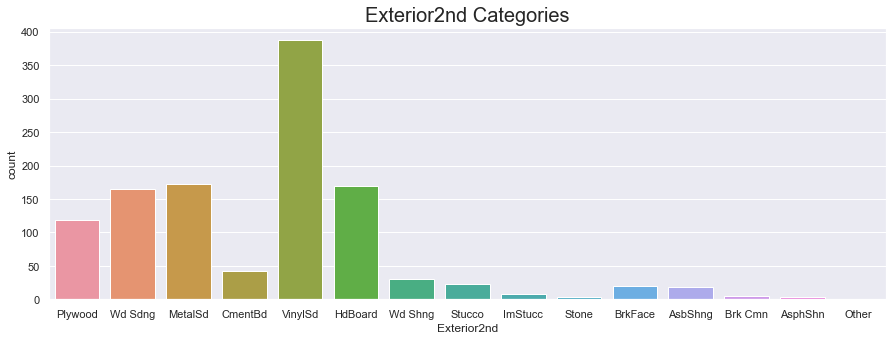

In [34]:
print(train['Exterior2nd'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(train['Exterior2nd'])
plt.title("Exterior2nd Categories", fontsize = 20)

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


Text(0.5, 1.0, 'MasVnrType Categories')

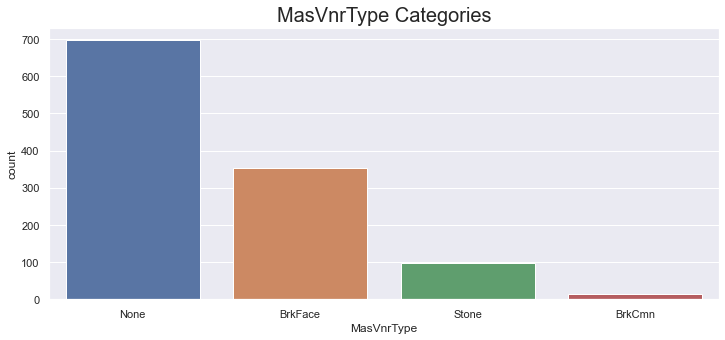

In [35]:
print(train['MasVnrType'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['MasVnrType'])
plt.title("MasVnrType Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of MasVnrArea')

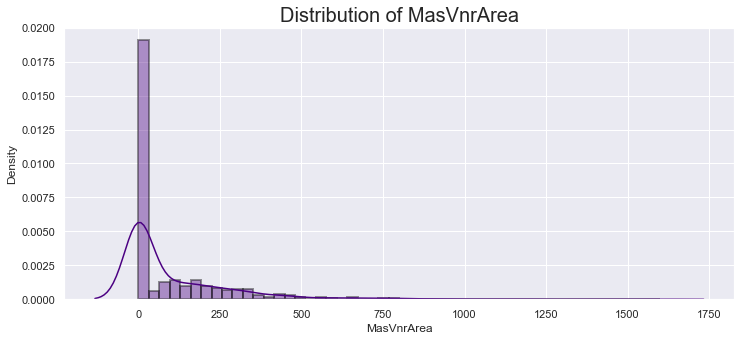

In [36]:
plt.figure(figsize = (12,5))

sns.distplot(train['MasVnrArea'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of MasVnrArea", fontsize = 20)

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


Text(0.5, 1.0, 'ExterQual Categories')

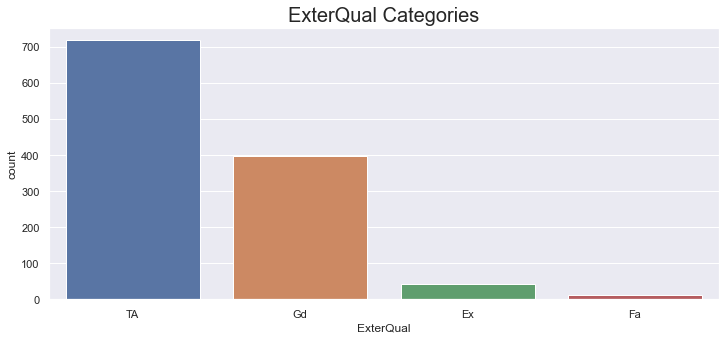

In [37]:
print(train['ExterQual'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['ExterQual'])
plt.title("ExterQual Categories", fontsize = 20)

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


Text(0.5, 1.0, 'ExterCond Categories')

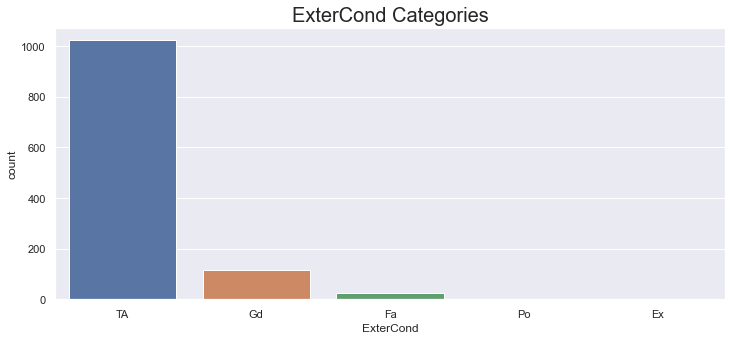

In [38]:
print(train['ExterCond'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['ExterCond'])
plt.title("ExterCond Categories", fontsize = 20)

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


Text(0.5, 1.0, 'Foundation Categories')

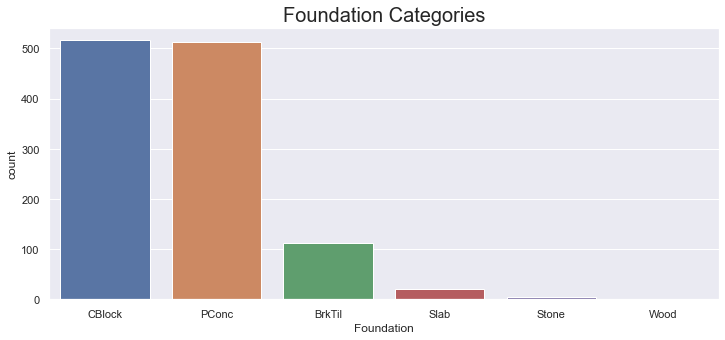

In [39]:
print(train['Foundation'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Foundation'])
plt.title("Foundation Categories", fontsize = 20)

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


Text(0.5, 1.0, 'BsmtCond Categories')

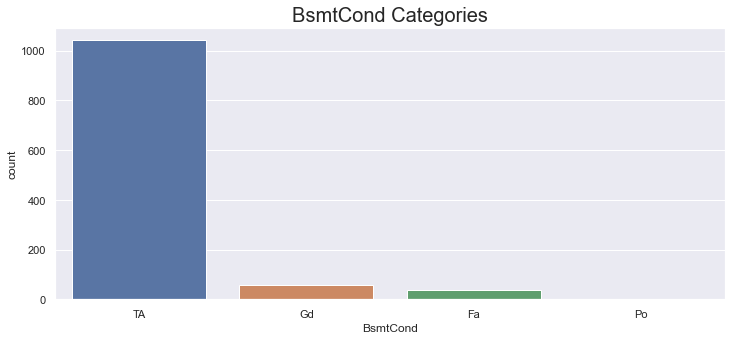

In [40]:
print(train['BsmtCond'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BsmtCond'])
plt.title("BsmtCond Categories", fontsize = 20)

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


Text(0.5, 1.0, 'BsmtExposure Categories')

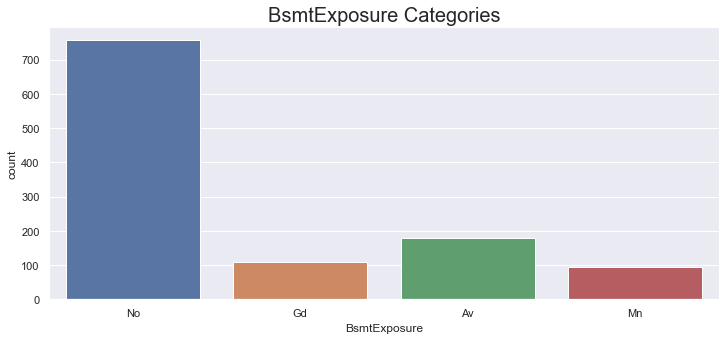

In [41]:
print(train['BsmtExposure'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BsmtExposure'])
plt.title("BsmtExposure Categories", fontsize = 20)

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


Text(0.5, 1.0, 'BsmtFinType1 Categories')

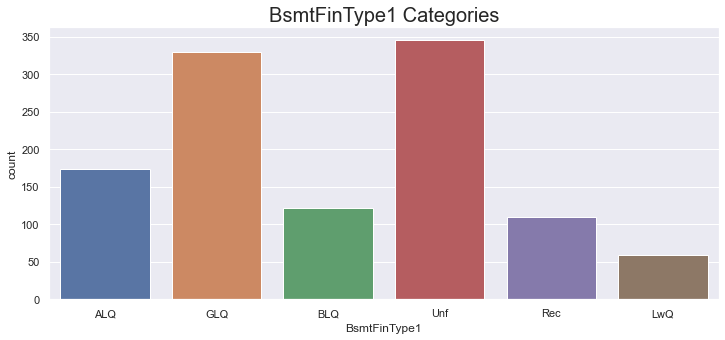

In [42]:
print(train['BsmtFinType1'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BsmtFinType1'])
plt.title("BsmtFinType1 Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of BsmtFinSF1')

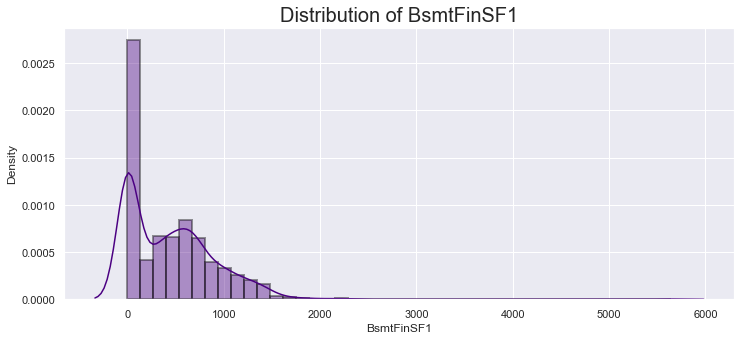

In [43]:
plt.figure(figsize = (12,5))

sns.distplot(train['BsmtFinSF1'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of BsmtFinSF1", fontsize = 20)

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


Text(0.5, 1.0, 'BsmtFinType2 Categories')

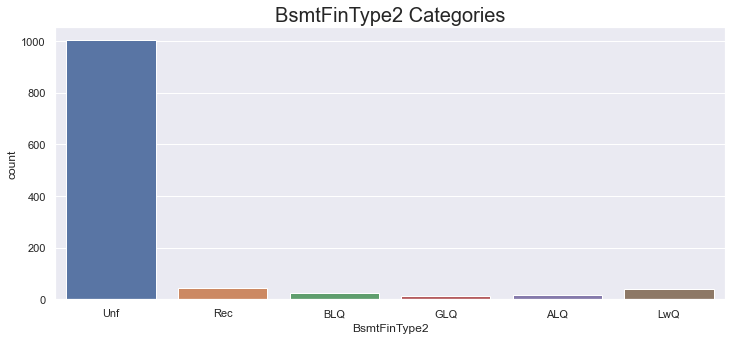

In [44]:
print(train['BsmtFinType2'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BsmtFinType2'])
plt.title("BsmtFinType2 Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of BsmtFinSF2')

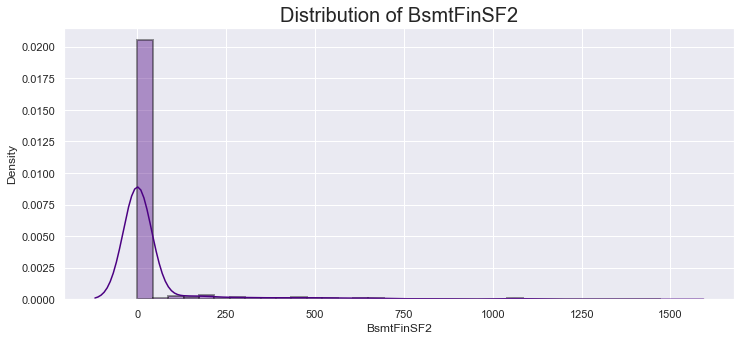

In [45]:
plt.figure(figsize = (12,5))

sns.distplot(train['BsmtFinSF2'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of BsmtFinSF2", fontsize = 20)

Text(0.5, 1.0, 'Distribution of BsmtUnfSF')

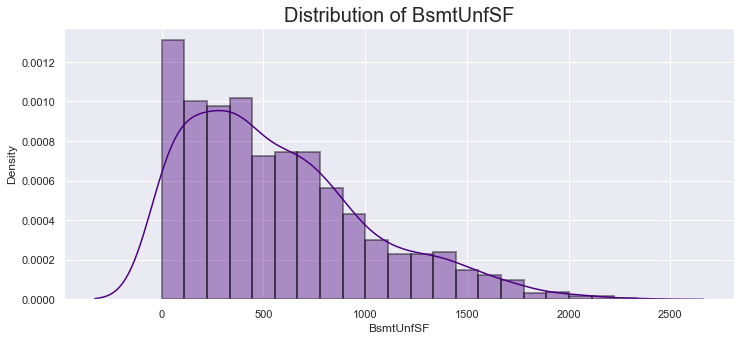

In [46]:
plt.figure(figsize = (12,5))

sns.distplot(train['BsmtUnfSF'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of BsmtUnfSF", fontsize = 20)

Text(0.5, 1.0, 'Distribution of TotalBsmtSF')

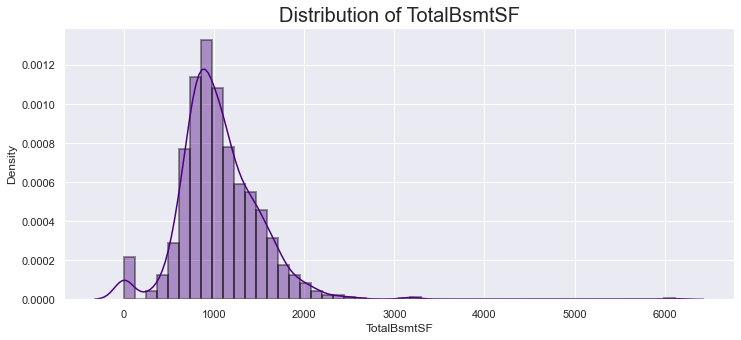

In [47]:
plt.figure(figsize = (12,5))

sns.distplot(train['TotalBsmtSF'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of TotalBsmtSF", fontsize = 20)

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


Text(0.5, 1.0, 'Heating Categories')

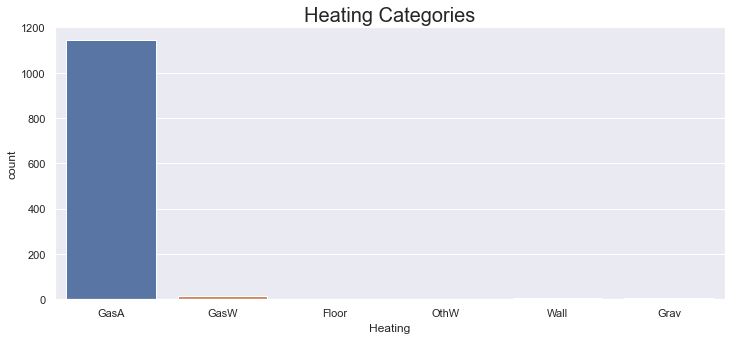

In [48]:
print(train['Heating'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Heating'])
plt.title("Heating Categories", fontsize = 20)

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


Text(0.5, 1.0, 'HeatingQC Categories')

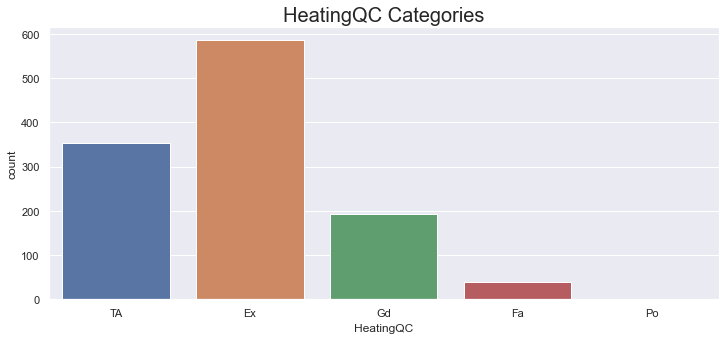

In [49]:
print(train['HeatingQC'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['HeatingQC'])
plt.title("HeatingQC Categories", fontsize = 20)

Y    1090
N      78
Name: CentralAir, dtype: int64


Text(0.5, 1.0, 'CentralAir Categories')

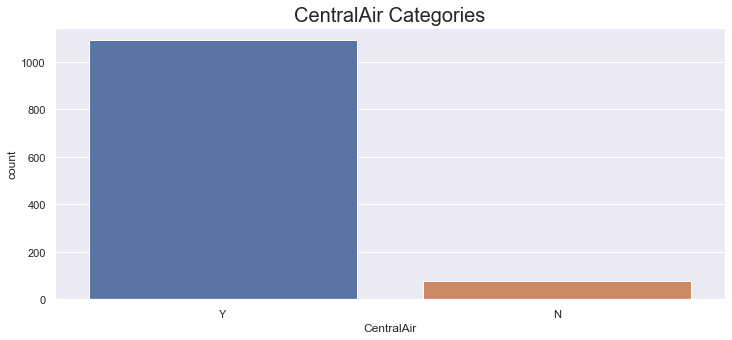

In [50]:
print(train['CentralAir'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['CentralAir'])
plt.title("CentralAir Categories", fontsize = 20)

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


Text(0.5, 1.0, 'Electrical Categories')

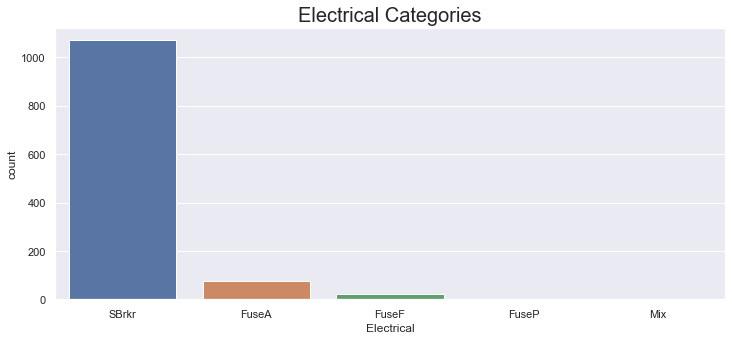

In [51]:
print(train['Electrical'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Electrical'])
plt.title("Electrical Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of 1stFlrSF')

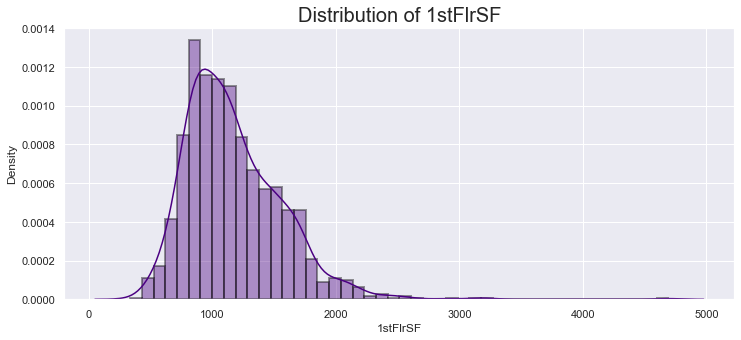

In [52]:
plt.figure(figsize = (12,5))

sns.distplot(train['1stFlrSF'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of 1stFlrSF", fontsize = 20)

Text(0.5, 1.0, 'Distribution of 2ndFlrSF')

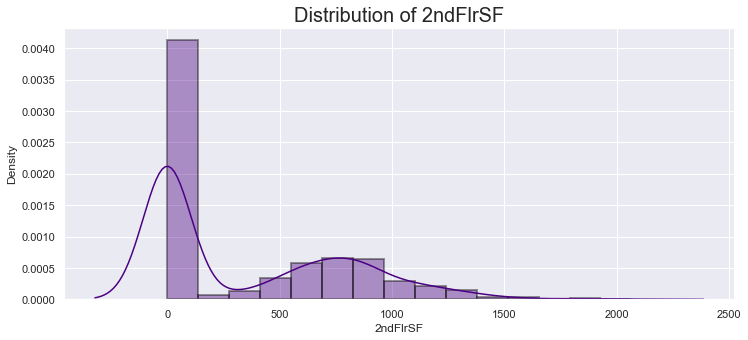

In [53]:
plt.figure(figsize = (12,5))

sns.distplot(train['2ndFlrSF'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of 2ndFlrSF", fontsize = 20)

0      1145
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
392       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64


Text(0.5, 1.0, 'LowQualFinSF Categories')

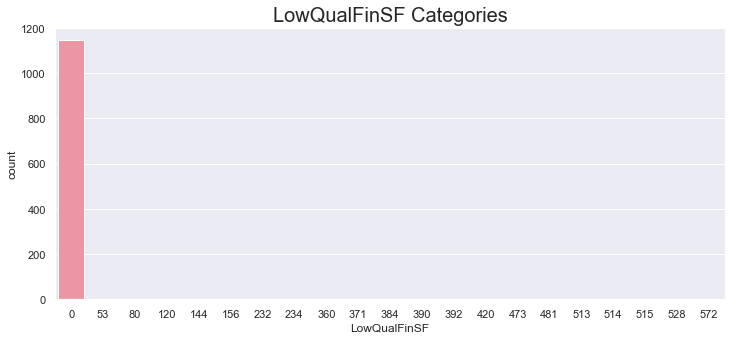

In [54]:
print(train['LowQualFinSF'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['LowQualFinSF'])
plt.title("LowQualFinSF Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of GrLivArea')

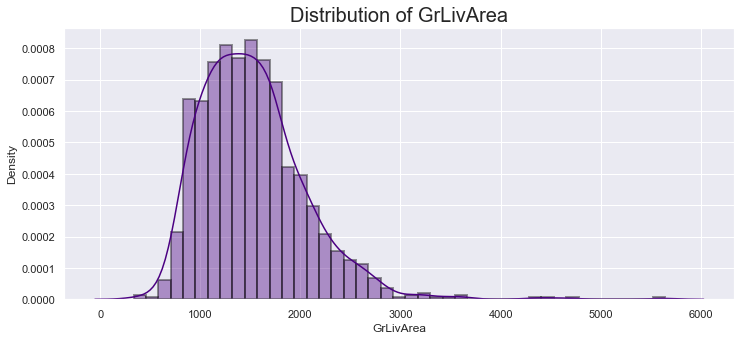

In [55]:
plt.figure(figsize = (12,5))


sns.distplot(train['GrLivArea'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of GrLivArea", fontsize = 20)

0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64


Text(0.5, 1.0, 'BsmtFullBath Categories')

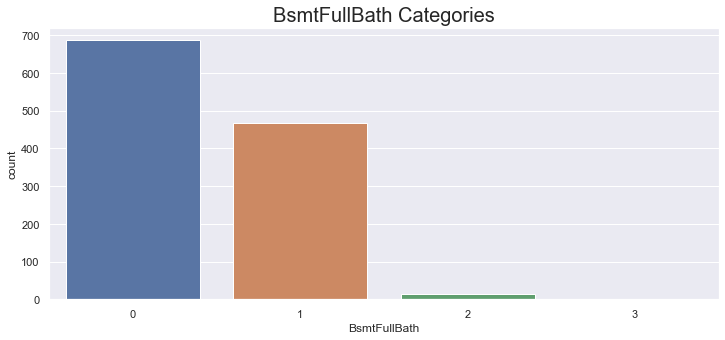

In [56]:
print(train['BsmtFullBath'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BsmtFullBath'])
plt.title("BsmtFullBath Categories", fontsize = 20)

0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64


Text(0.5, 1.0, 'BsmtHalfBath Categories')

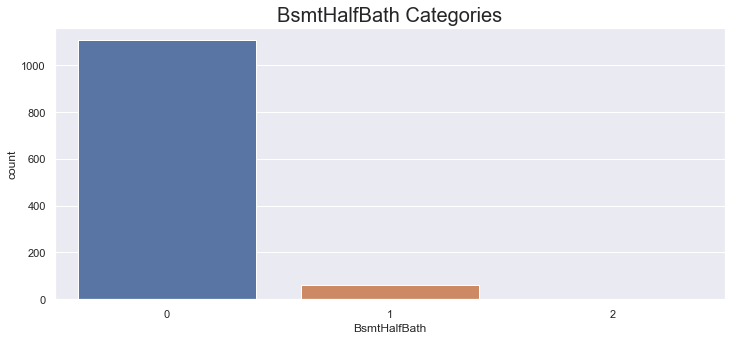

In [57]:
print(train['BsmtHalfBath'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BsmtHalfBath'])
plt.title("BsmtHalfBath Categories", fontsize = 20)

2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64


Text(0.5, 1.0, 'FullBath Categories')

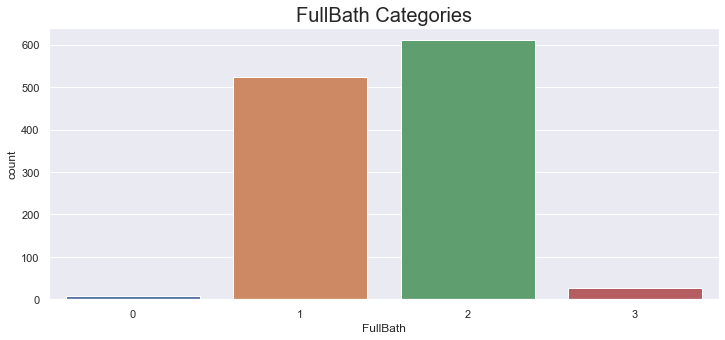

In [58]:
print(train['FullBath'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['FullBath'])
plt.title("FullBath Categories", fontsize = 20)

0    724
1    434
2     10
Name: HalfBath, dtype: int64


Text(0.5, 1.0, 'HalfBath Categories')

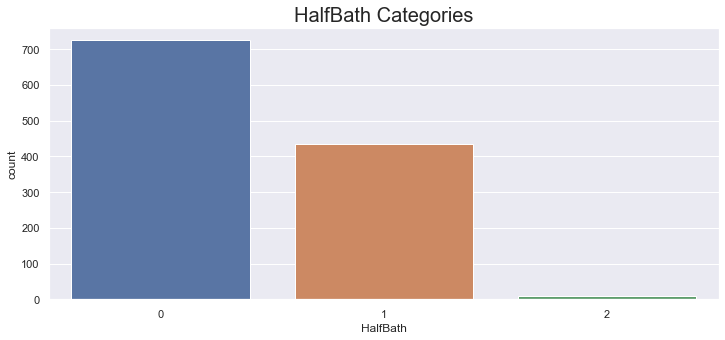

In [59]:
print(train['HalfBath'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['HalfBath'])
plt.title("HalfBath Categories", fontsize = 20)

3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64


Text(0.5, 1.0, 'BedroomAbvGr Categories')

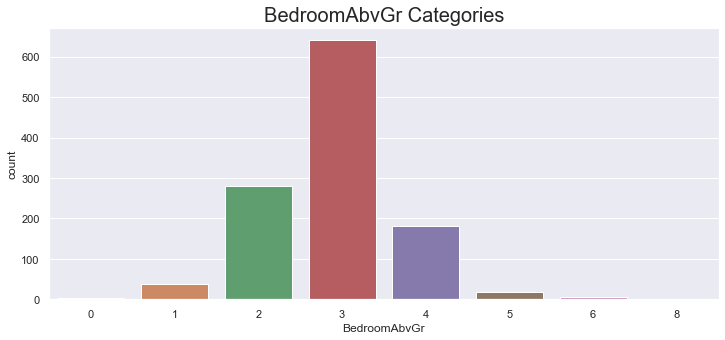

In [60]:
print(train['BedroomAbvGr'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['BedroomAbvGr'])
plt.title("BedroomAbvGr Categories", fontsize = 20)

1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64


Text(0.5, 1.0, 'KitchenAbvGr Categories')

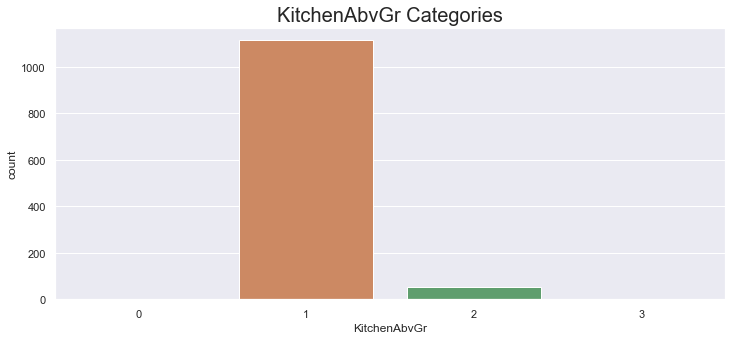

In [61]:
print(train['KitchenAbvGr'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['KitchenAbvGr'])
plt.title("KitchenAbvGr Categories", fontsize = 20)

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


Text(0.5, 1.0, 'KitchenQual Categories')

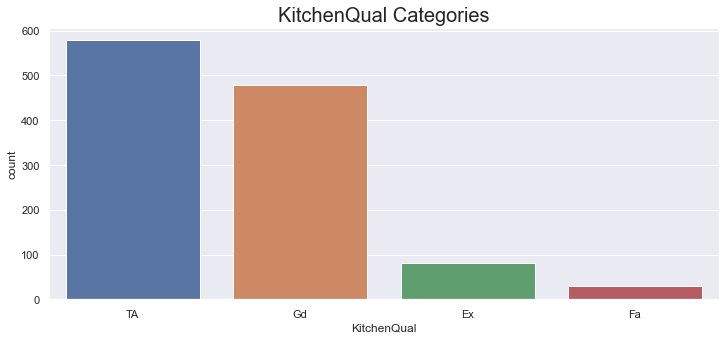

In [62]:
print(train['KitchenQual'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['KitchenQual'])
plt.title("KitchenQual Categories", fontsize = 20)

6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


Text(0.5, 1.0, 'TotRmsAbvGrd Categories')

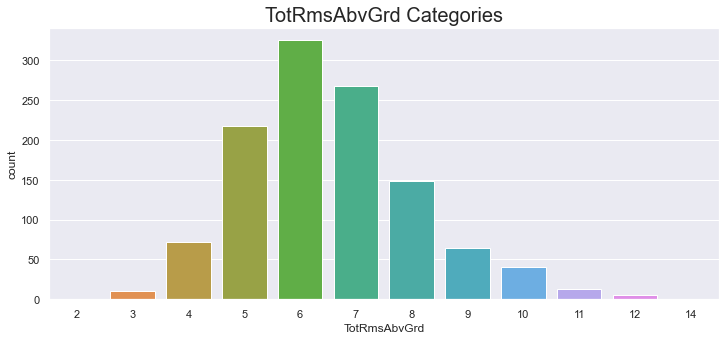

In [63]:
print(train['TotRmsAbvGrd'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['TotRmsAbvGrd'])
plt.title("TotRmsAbvGrd Categories", fontsize = 20)

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


Text(0.5, 1.0, 'Functional Categories')

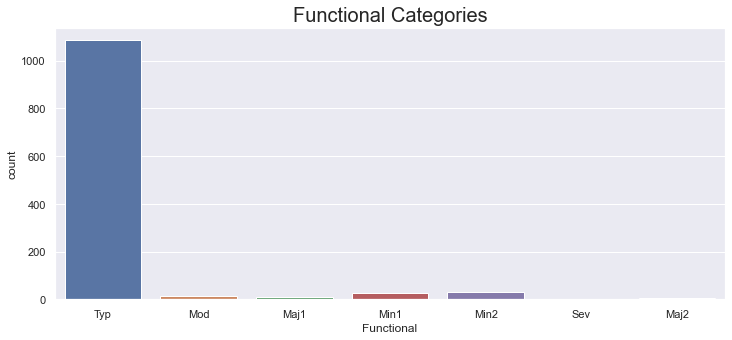

In [64]:
print(train['Functional'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Functional'])
plt.title("Functional Categories", fontsize = 20)

0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


Text(0.5, 1.0, 'Fireplaces Categories')

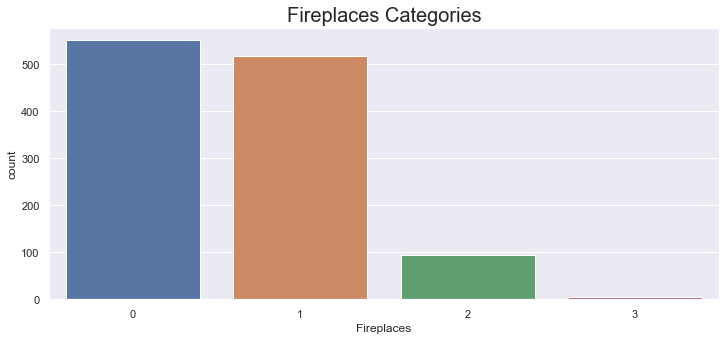

In [65]:
print(train['Fireplaces'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Fireplaces'])
plt.title("Fireplaces Categories", fontsize = 20)

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


Text(0.5, 1.0, 'FireplaceQu Categories')

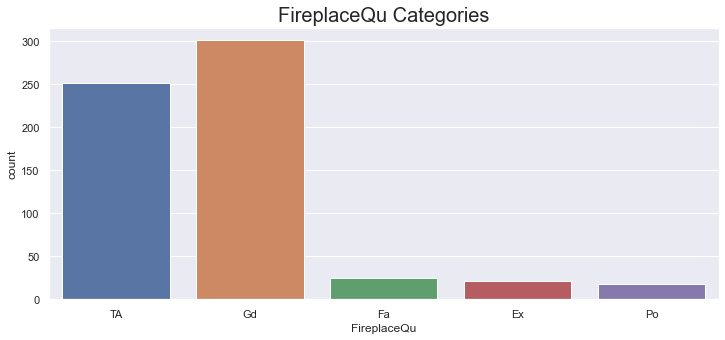

In [66]:
print(train['FireplaceQu'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['FireplaceQu'])
plt.title("FireplaceQu Categories", fontsize = 20)

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


Text(0.5, 1.0, 'GarageType Categories')

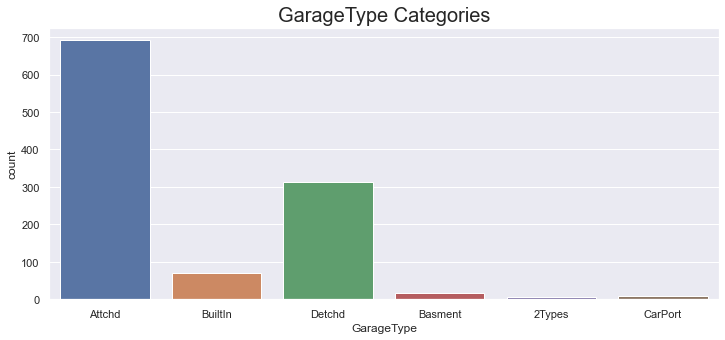

In [67]:
print(train['GarageType'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['GarageType'])
plt.title("GarageType Categories", fontsize = 20)

2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
1998.0    25
1977.0    24
2002.0    23
1999.0    23
2008.0    21
1976.0    20
1993.0    20
1957.0    18
1968.0    18
1966.0    18
1950.0    18
2001.0    18
2009.0    18
1962.0    18
2000.0    18
1997.0    17
1974.0    17
1995.0    17
1958.0    17
1965.0    17
1960.0    16
1994.0    15
1990.0    14
1954.0    14
1959.0    14
1978.0    14
1969.0    14
1970.0    14
1964.0    13
1961.0    13
1996.0    13
1963.0    13
1956.0    13
1940.0    12
1971.0    12
1920.0    12
1988.0    12
1955.0    12
1980.0    12
1979.0    11
1973.0    10
1967.0    10
1992.0    10
1981.0    10
1985.0     9
1948.0     9
1972.0     9
1953.0     9
1987.0     8
1975.0     8
1989.0     8
1983.0     7
1925.0     7
1941.0     7
1949.0     7
1991.0     7
1986.0     6
1930.0     6
1939.0     6
1951.0     5
1936.0     5
1926.0     4
1945.0     4
1984.0     4
1916.0     4
1935.0     4
1946.0     4
1932.0     3
1923.0     3
1952.0     3
1931.0     3
1922.0     3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 [Text(0, 0, '1900.0'),
  Text(1, 0, '1906.0'),
  Text(2, 0, '1908.0'),
  Text(3, 0, '1910.0'),
  Text(4, 0, '1914.0'),
  Text(5, 0, '1915.0'),
  Text(6, 0, '1916.0'),
  Text(7, 0, '1918.0'),
  Text(8, 0, '1920.0'),
  Text(9, 0, '1921.0'),
  Text(10, 0, '1922.0'),
  Text(11, 0, '1923.0'),
  Text(12, 0, '1924.0'),
  Text(13, 0, '1925.0'),
  Text(14, 0, '1926.0'),
  Text(15, 0, '1927.0'),
  Text(16, 0, '1928.0'),
  Text(17, 0, '1929.0'),
  Text(18, 0, '1930.0'),
  Text(19, 0, '1931.0'),
  Text(20, 0, '1932.0'),
  Text(21, 0, '1933.0'),
  Text(22, 0, '1934.0'

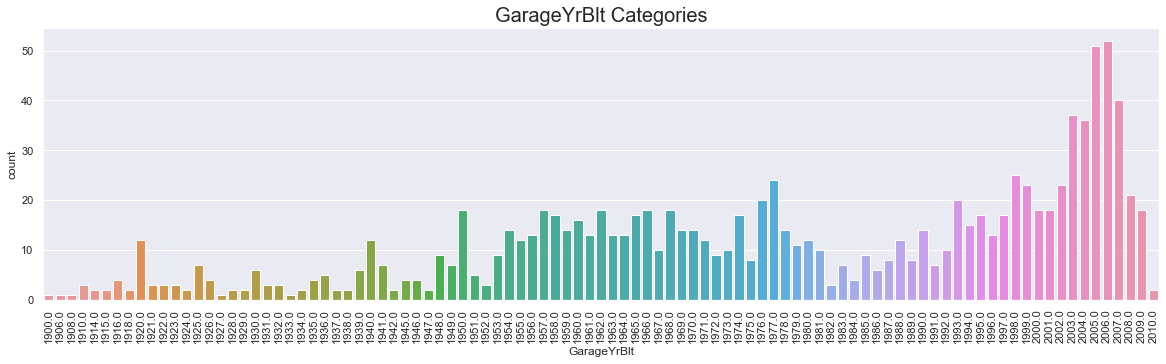

In [68]:
print(train['GarageYrBlt'].value_counts())
plt.figure(figsize = (20,5))
sns.countplot(train['GarageYrBlt'])
plt.title("GarageYrBlt Categories", fontsize = 20)
plt.xticks(rotation = 90)

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


Text(0.5, 1.0, 'GarageFinish Categories')

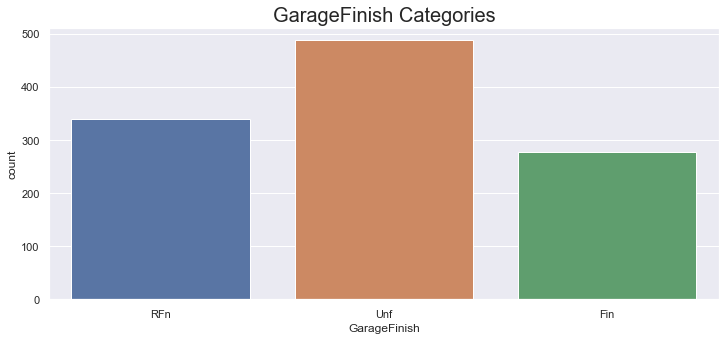

In [69]:
print(train['GarageFinish'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['GarageFinish'])
plt.title("GarageFinish Categories", fontsize = 20)

2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


Text(0.5, 1.0, 'GarageCars Categories')

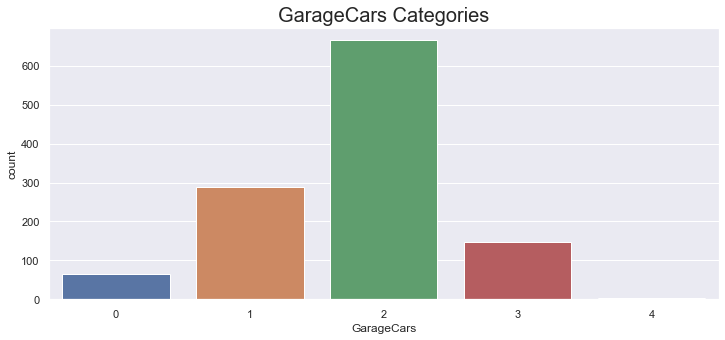

In [70]:
print(train['GarageCars'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['GarageCars'])
plt.title("GarageCars Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of GarageArea')

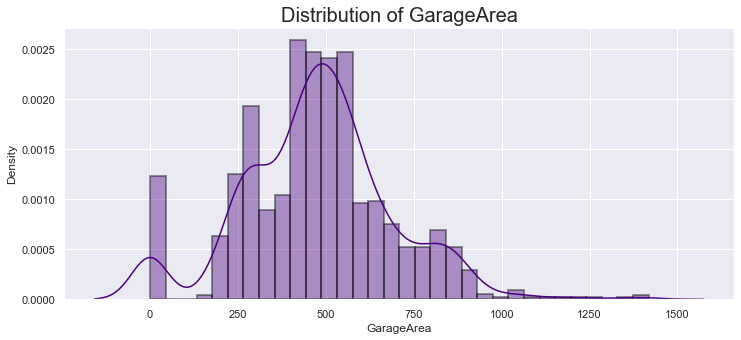

In [71]:
plt.figure(figsize = (12,5))

sns.distplot(train['GarageArea'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of GarageArea", fontsize = 20)

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


Text(0.5, 1.0, 'GarageQual Categories')

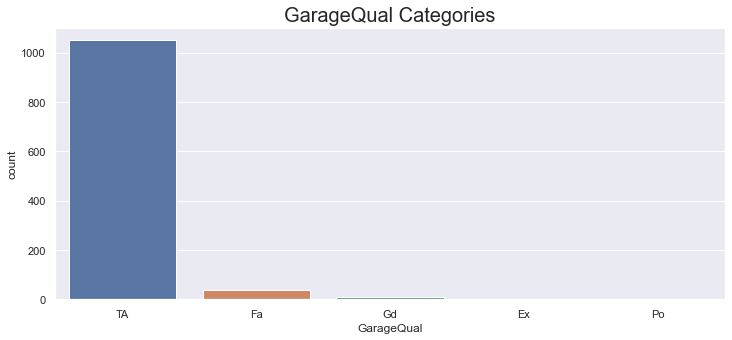

In [72]:
print(train['GarageQual'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['GarageQual'])
plt.title("GarageQual Categories", fontsize = 20)

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


Text(0.5, 1.0, 'GarageCond Categories')

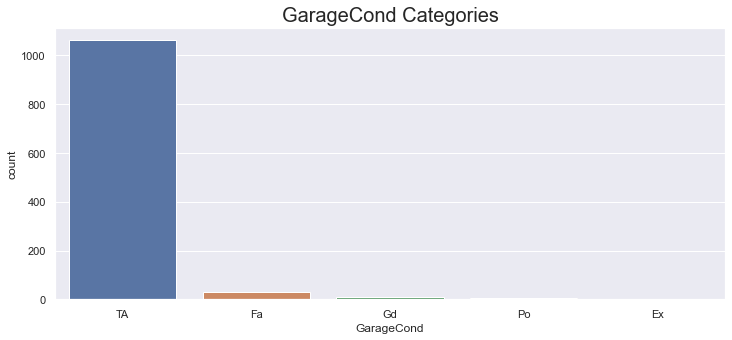

In [73]:
print(train['GarageCond'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['GarageCond'])
plt.title("GarageCond Categories", fontsize = 20)

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


Text(0.5, 1.0, 'PavedDrive Categories')

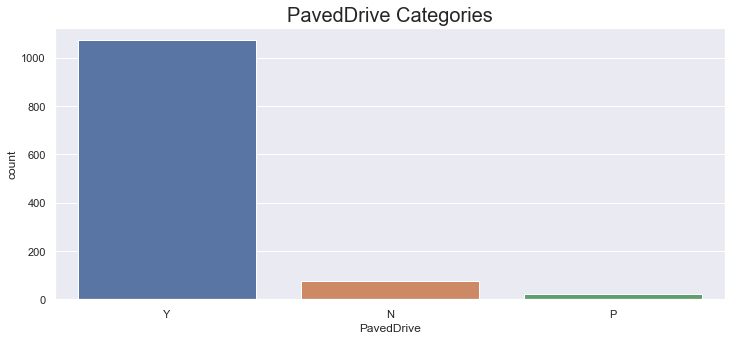

In [74]:
print(train['PavedDrive'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['PavedDrive'])
plt.title("PavedDrive Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of WoodDeckSF')

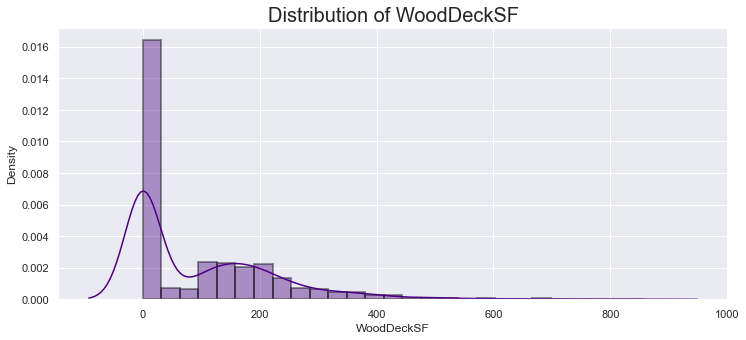

In [75]:
plt.figure(figsize = (12,5))

sns.distplot(train['WoodDeckSF'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of WoodDeckSF", fontsize = 20)

Text(0.5, 1.0, 'Distribution of OpenPorchSF')

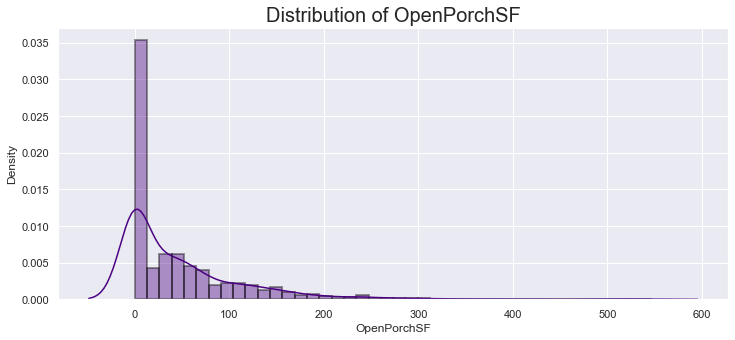

In [76]:
plt.figure(figsize = (12,5))

sns.distplot(train['OpenPorchSF'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of OpenPorchSF", fontsize = 20)

0      999
112     13
96       6
192      5
216      5
116      4
120      3
252      3
176      3
228      3
126      3
40       3
156      3
128      3
144      3
164      2
158      2
108      2
180      2
184      2
185      2
102      2
150      2
202      2
115      2
137      2
264      2
236      2
224      2
244      2
234      2
34       2
39       2
52       1
50       1
44       1
123      1
42       1
77       1
114      1
30       1
129      1
130      1
24       1
134      1
36       1
60       1
54       1
56       1
80       1
64       1
67       1
105      1
68       1
100      1
99       1
98       1
70       1
91       1
136      1
84       1
81       1
90       1
552      1
138      1
268      1
221      1
230      1
239      1
240      1
242      1
248      1
254      1
259      1
272      1
145      1
275      1
280      1
286      1
291      1
293      1
294      1
301      1
318      1
220      1
218      1
212      1
210      1
148      1
154      1
386      1

Text(0.5, 1.0, 'Distribution of EnclosedPorch')

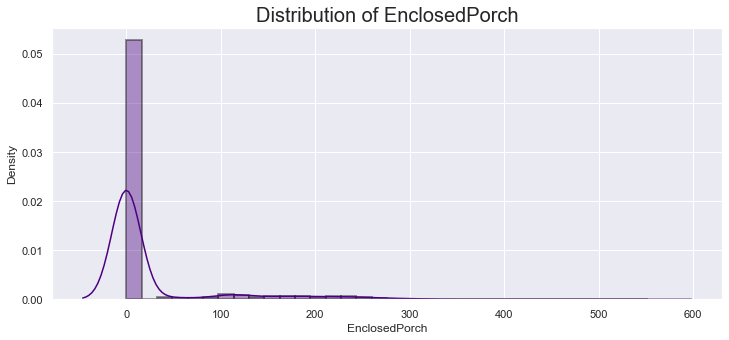

In [77]:
print(train['EnclosedPorch'].value_counts())

plt.figure(figsize = (12,5))

sns.distplot(train['EnclosedPorch'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of EnclosedPorch", fontsize = 20)

0      1146
168       3
216       2
180       2
144       2
290       1
245       1
238       1
196       1
182       1
304       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64


Text(0.5, 1.0, 'Distribution of 3SsnPorch')

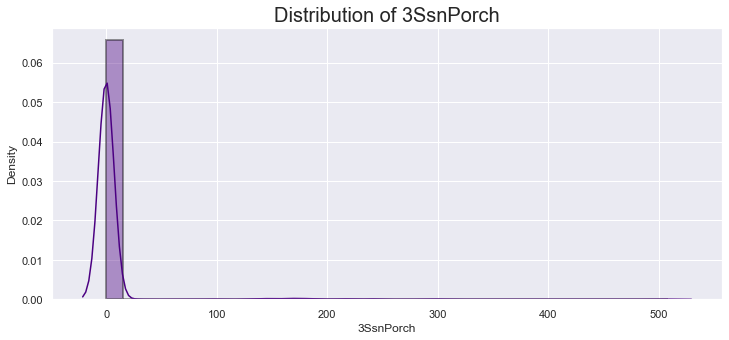

In [78]:
print(train['3SsnPorch'].value_counts())

plt.figure(figsize = (12,5))

sns.distplot(train['3SsnPorch'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of 3SsnPorch", fontsize = 20)

0      1073
192       5
224       5
189       4
126       3
168       3
180       3
160       3
120       3
176       2
147       2
184       2
144       2
142       2
200       2
216       2
100       2
90        2
288       2
122       1
145       1
155       1
40        1
154       1
153       1
53        1
60        1
63        1
80        1
128       1
143       1
95        1
99        1
140       1
130       1
116       1
156       1
480       1
161       1
252       1
410       1
385       1
322       1
291       1
287       1
273       1
271       1
266       1
265       1
260       1
259       1
225       1
163       1
222       1
204       1
198       1
197       1
190       1
185       1
182       1
178       1
440       1
170       1
165       1
175       1
Name: ScreenPorch, dtype: int64


Text(0.5, 1.0, 'Distribution of ScreenPorch')

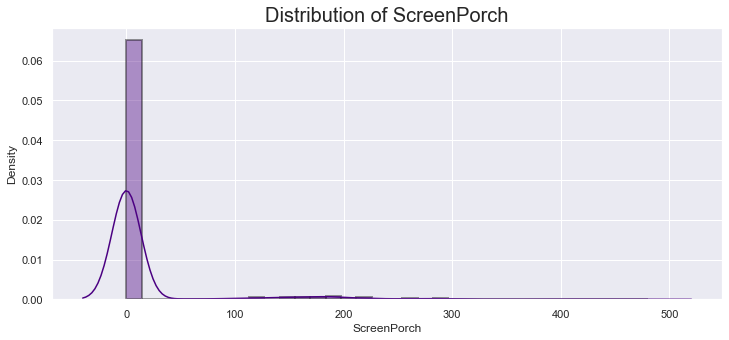

In [79]:
print(train['ScreenPorch'].value_counts())

plt.figure(figsize = (12,5))
sns.distplot(train['ScreenPorch'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of ScreenPorch", fontsize = 20)

Text(0.5, 1.0, 'Distribution of PoolArea')

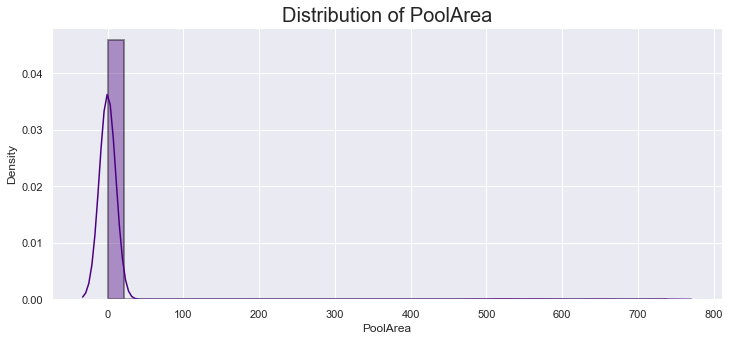

In [80]:
plt.figure(figsize = (12,5))

sns.distplot(train['PoolArea'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of PoolArea", fontsize = 20)

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


Text(0.5, 1.0, 'PoolQC Categories')

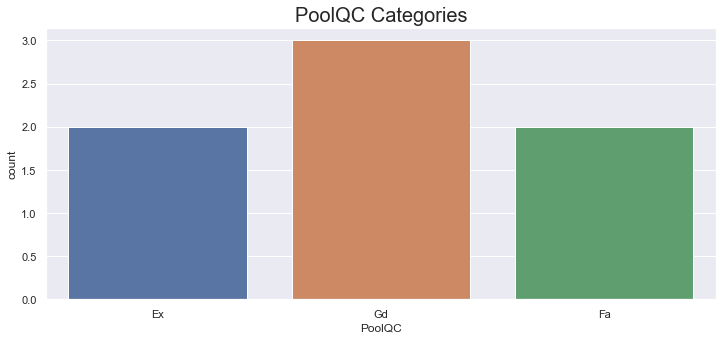

In [81]:
print(train['PoolQC'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['PoolQC'])
plt.title("PoolQC Categories", fontsize = 20)

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64


Text(0.5, 1.0, 'Fence Categories')

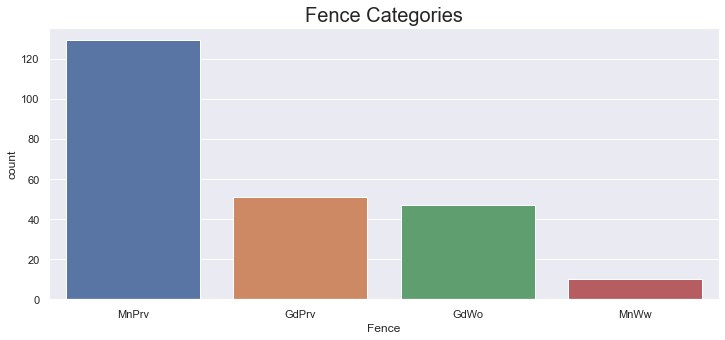

In [82]:
print(train['Fence'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['Fence'])
plt.title("Fence Categories", fontsize = 20)

Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64


Text(0.5, 1.0, 'MiscFeature Categories')

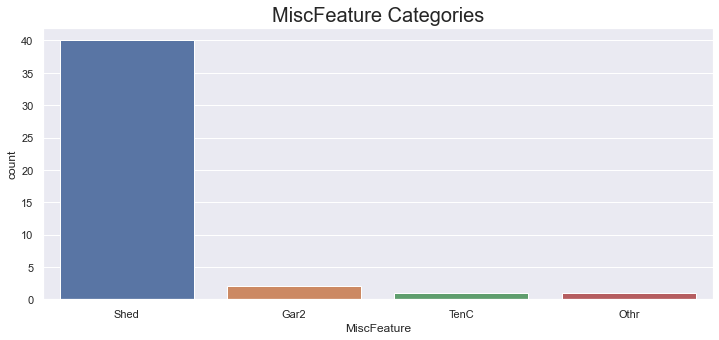

In [83]:
print(train['MiscFeature'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['MiscFeature'])
plt.title("MiscFeature Categories", fontsize = 20)

0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
15500       1
1150        1
800         1
620         1
1400        1
480         1
2500        1
450         1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64


Text(0.5, 1.0, 'MiscVal Categories')

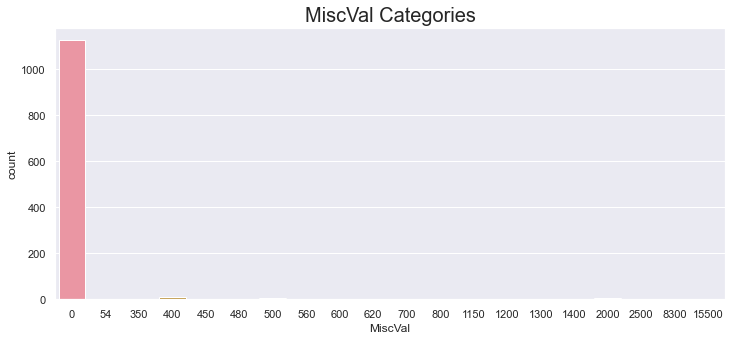

In [84]:
print(train['MiscVal'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['MiscVal'])
plt.title("MiscVal Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of MoSold')

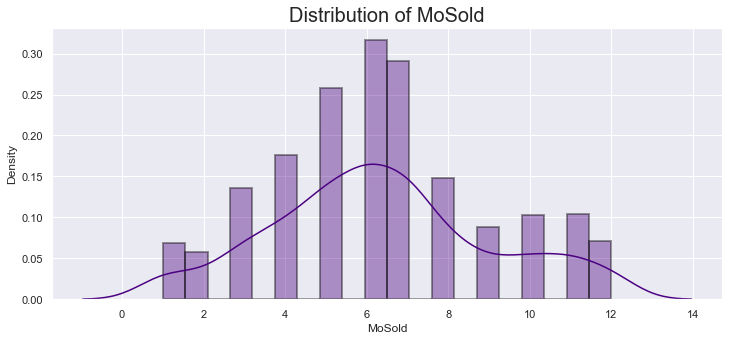

In [85]:
plt.figure(figsize = (12,5))

sns.distplot(train['MoSold'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of MoSold", fontsize = 20)

Text(0.5, 1.0, 'Distribution of YrSold')

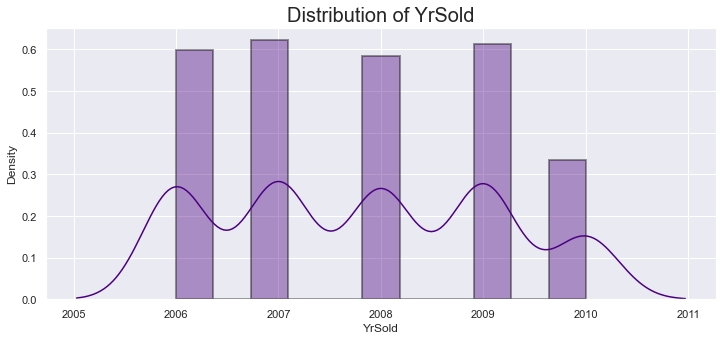

In [86]:
plt.figure(figsize = (12,5))

sns.distplot(train['YrSold'], color = 'indigo',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of YrSold", fontsize = 20)

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


Text(0.5, 1.0, 'SaleType Categories')

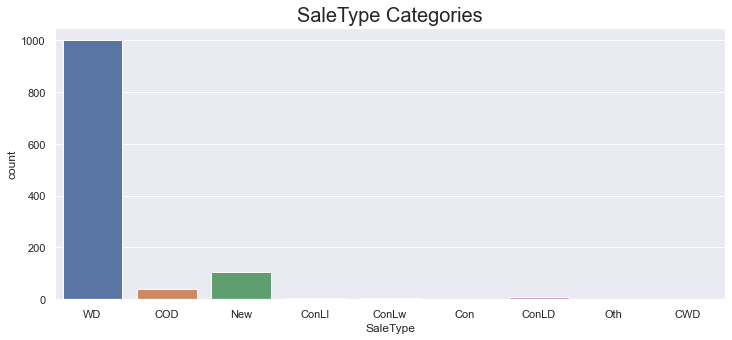

In [87]:
print(train['SaleType'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['SaleType'])
plt.title("SaleType Categories", fontsize = 20)

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


Text(0.5, 1.0, 'SaleCondition Categories')

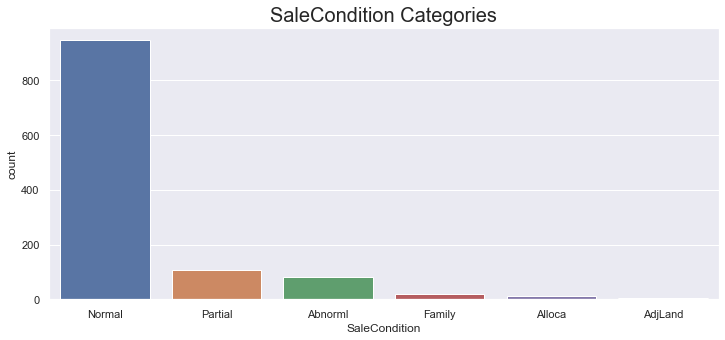

In [88]:
print(train['SaleCondition'].value_counts())
plt.figure(figsize = (12,5))
sns.countplot(train['SaleCondition'])
plt.title("SaleCondition Categories", fontsize = 20)

Text(0.5, 1.0, 'Distribution of SalePrice (Targe Variable)')

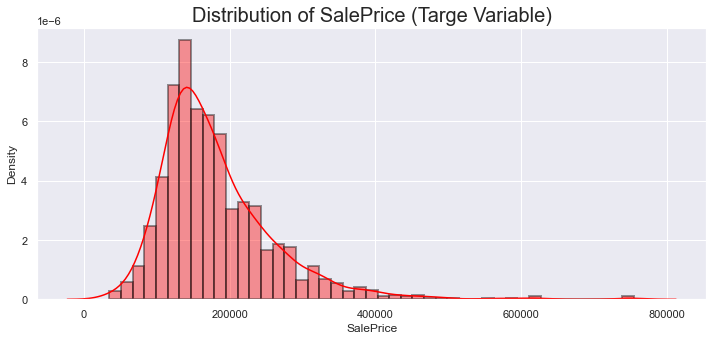

In [89]:
plt.figure(figsize = (12,5))
sns.distplot(train['SalePrice'], color = 'red',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title("Distribution of SalePrice (Targe Variable)", fontsize = 20)

### Bivariate Analysis

Text(0.5, 1.0, 'Effect on SalePrice by LotArea')

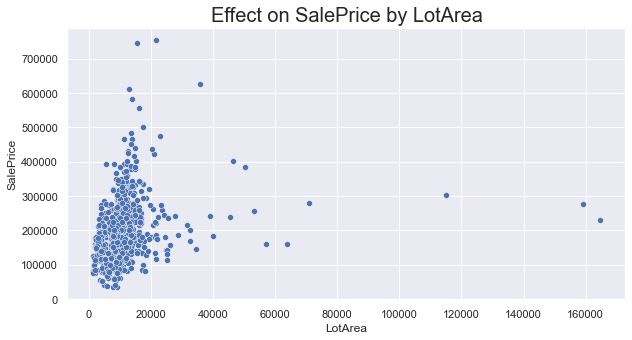

In [90]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'LotArea', y ='SalePrice')
plt.title("Effect on SalePrice by LotArea", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by LotFrontage')

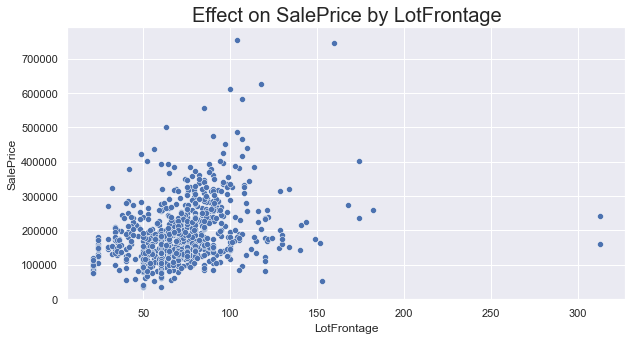

In [91]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'LotFrontage', y ='SalePrice')
plt.title("Effect on SalePrice by LotFrontage", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by MSSubClass')

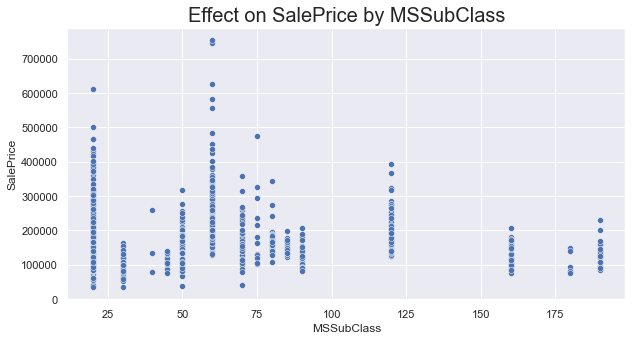

In [92]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'MSSubClass', y ='SalePrice')
plt.title("Effect on SalePrice by MSSubClass", fontsize = 20)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 [Text(0, 0, '1875'),
  Text(1, 0, '1880'),
  Text(2, 0, '1882'),
  Text(3, 0, '1890'),
  Text(4, 0, '1892'),
  Text(5, 0, '1893'),
  Text(6, 0, '1898'),
  Text(7, 0, '1900'),
  Text(8, 0, '1904'),
  Text(9, 0, '1905'),
  Text(10, 0, '1906'),
  Text(11, 0, '1908'),
  Text(12, 0, '1910'),
  Text(13, 0, '1911'),
  Text(14, 0, '1912'),
  Text(15, 0, '1913'),
  Text(16, 0, '191

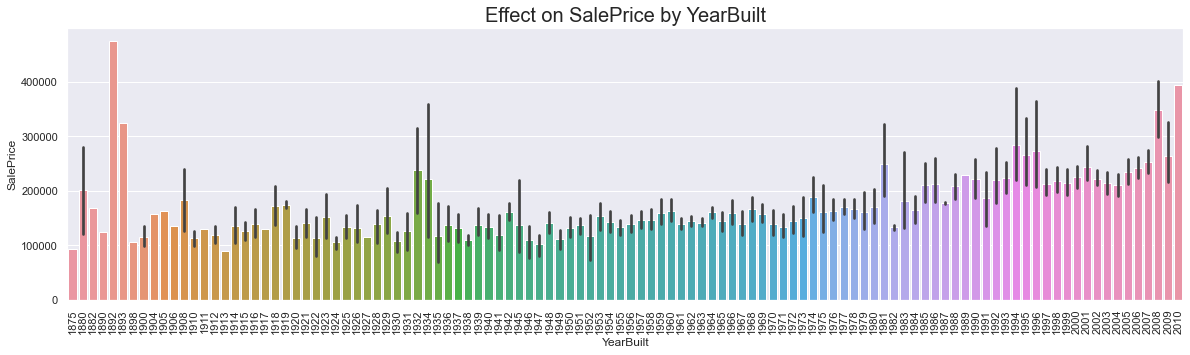

In [93]:
plt.figure(figsize = (20,5))
sns.barplot(data = train, x = 'YearBuilt', y ='SalePrice')
plt.title("Effect on SalePrice by YearBuilt", fontsize = 20)
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Effect on SalePrice by YearRemodAdd')

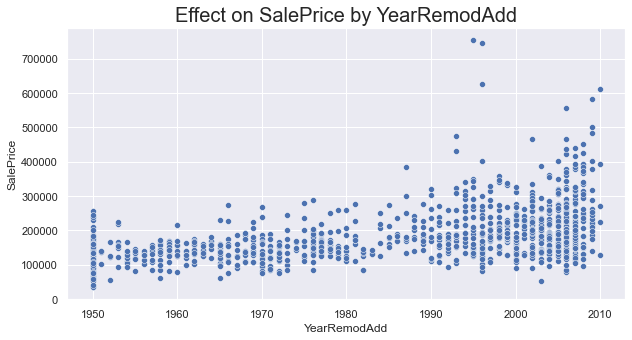

In [94]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'YearRemodAdd', y ='SalePrice')
plt.title("Effect on SalePrice by YearRemodAdd", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by MasVnrArea')

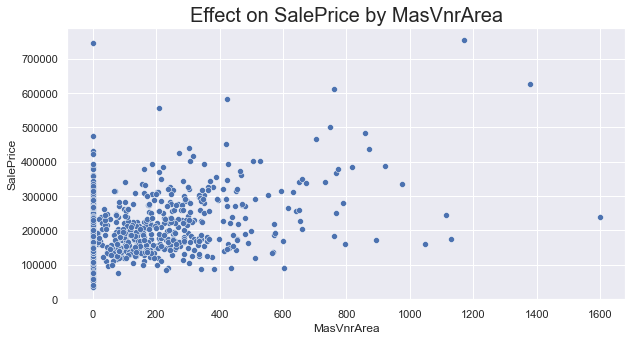

In [95]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'MasVnrArea', y ='SalePrice')
plt.title("Effect on SalePrice by MasVnrArea", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by BsmtFinSF1')

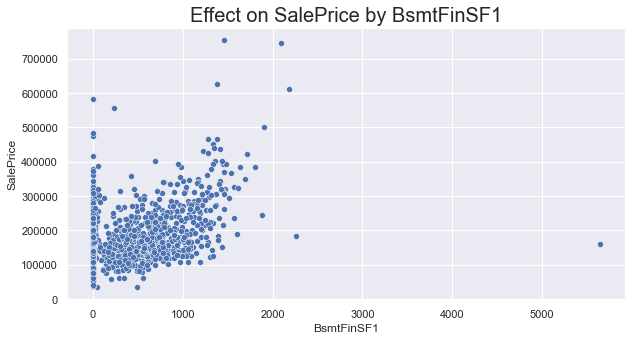

In [96]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'BsmtFinSF1', y ='SalePrice')
plt.title("Effect on SalePrice by BsmtFinSF1", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by BsmtFinSF2')

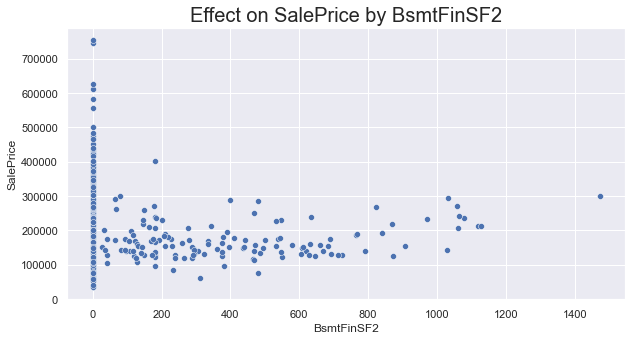

In [97]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'BsmtFinSF2', y ='SalePrice')
plt.title("Effect on SalePrice by BsmtFinSF2", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by BsmtUnfSF')

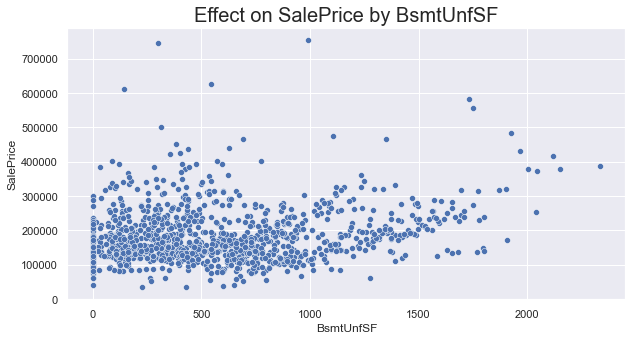

In [98]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'BsmtUnfSF', y ='SalePrice')
plt.title("Effect on SalePrice by BsmtUnfSF", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by TotalBsmtSF')

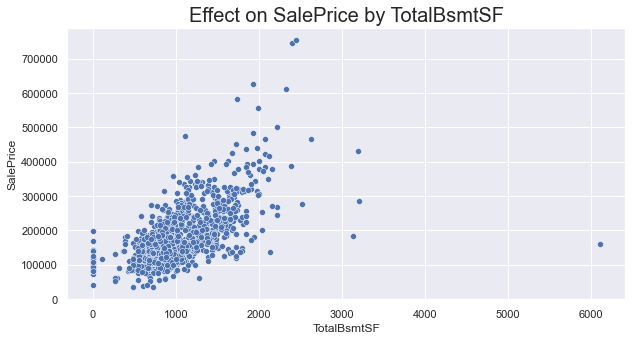

In [99]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'TotalBsmtSF', y ='SalePrice')
plt.title("Effect on SalePrice by TotalBsmtSF", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by 1stFlrSF')

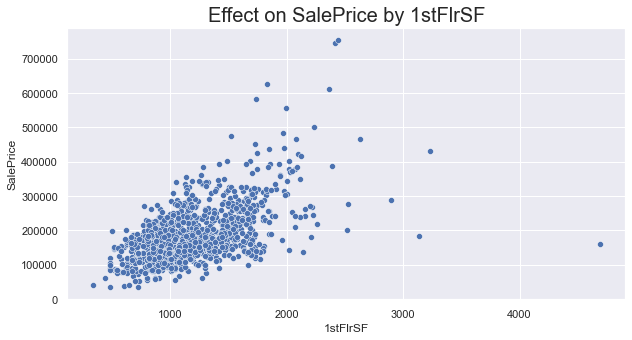

In [100]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = '1stFlrSF', y ='SalePrice')
plt.title("Effect on SalePrice by 1stFlrSF", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by 2ndFlrSF')

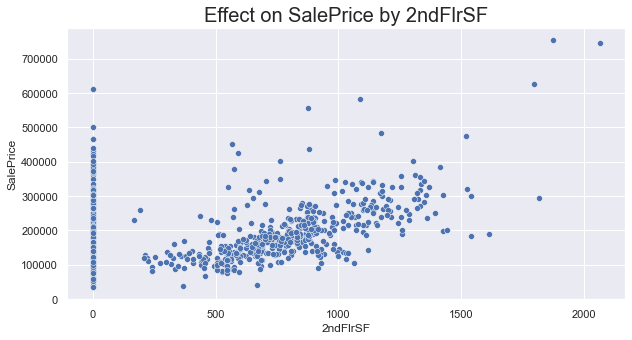

In [101]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = '2ndFlrSF', y ='SalePrice')
plt.title("Effect on SalePrice by 2ndFlrSF", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by GarageArea')

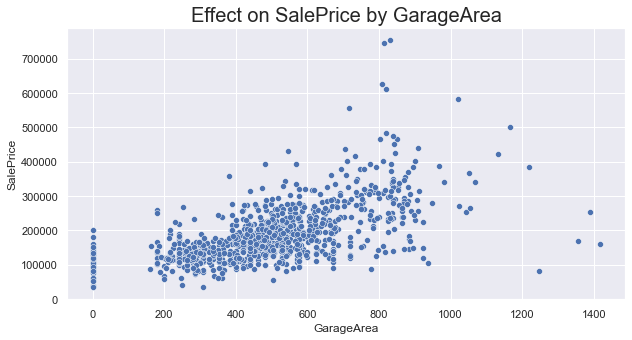

In [102]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'GarageArea', y ='SalePrice')
plt.title("Effect on SalePrice by GarageArea", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by GrLivArea')

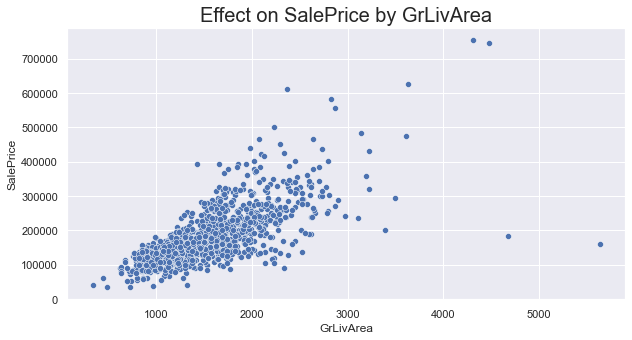

In [103]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'GrLivArea', y ='SalePrice')
plt.title("Effect on SalePrice by GrLivArea", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by WoodDeckSF')

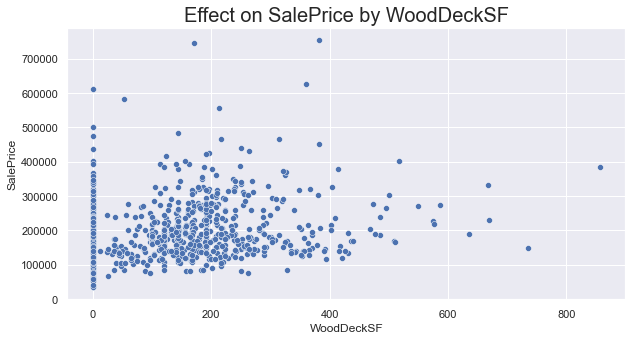

In [104]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'WoodDeckSF', y ='SalePrice')
plt.title("Effect on SalePrice by WoodDeckSF", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by OpenPorchSF')

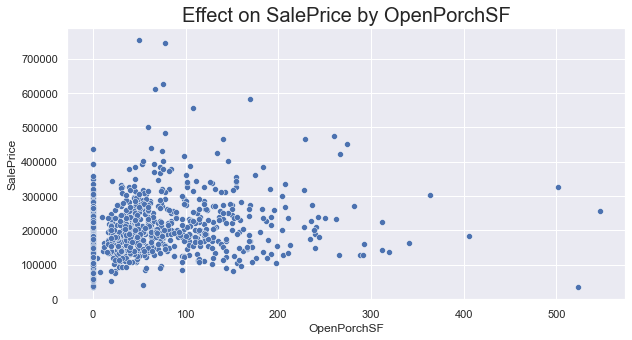

In [105]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'OpenPorchSF', y ='SalePrice')
plt.title("Effect on SalePrice by OpenPorchSF", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by EnclosedPorch')

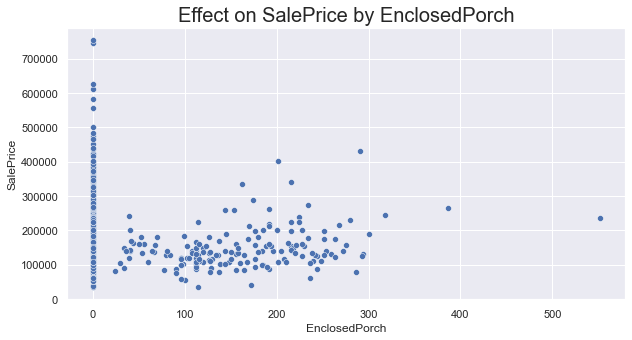

In [106]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'EnclosedPorch', y ='SalePrice')
plt.title("Effect on SalePrice by EnclosedPorch", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by 3SsnPorch')

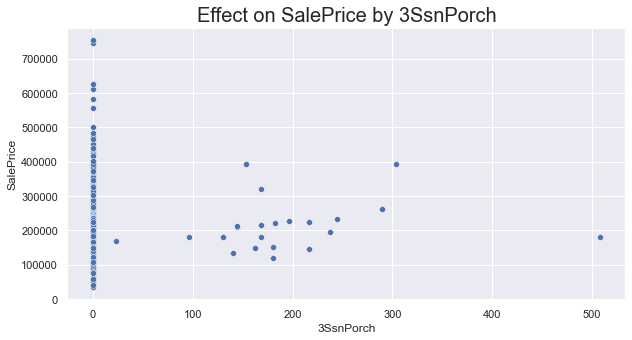

In [107]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = '3SsnPorch', y ='SalePrice')
plt.title("Effect on SalePrice by 3SsnPorch", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by ScreenPorch')

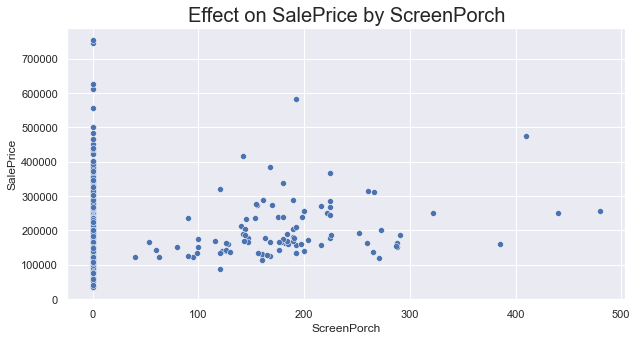

In [108]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'ScreenPorch', y ='SalePrice')
plt.title("Effect on SalePrice by ScreenPorch", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by PoolArea')

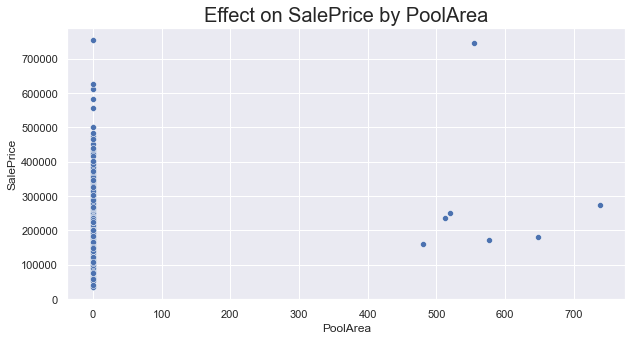

In [109]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'PoolArea', y ='SalePrice')
plt.title("Effect on SalePrice by PoolArea", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by MoSold')

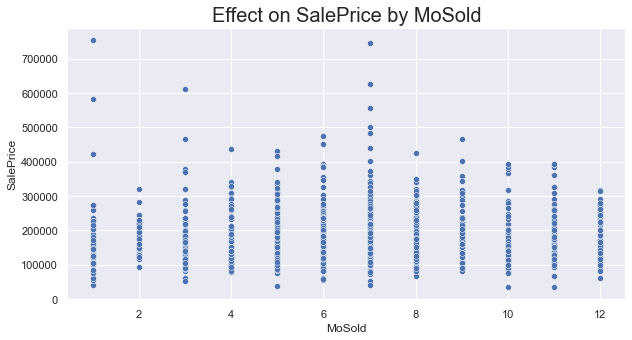

In [110]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'MoSold', y ='SalePrice')
plt.title("Effect on SalePrice by MoSold", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by YrSold')

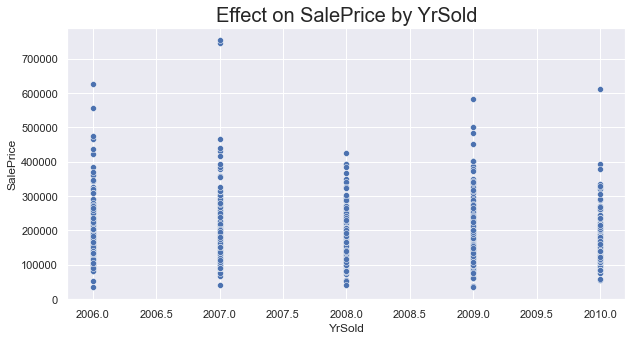

In [111]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = train, x = 'YrSold', y ='SalePrice')
plt.title("Effect on SalePrice by YrSold", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by MSZoning')

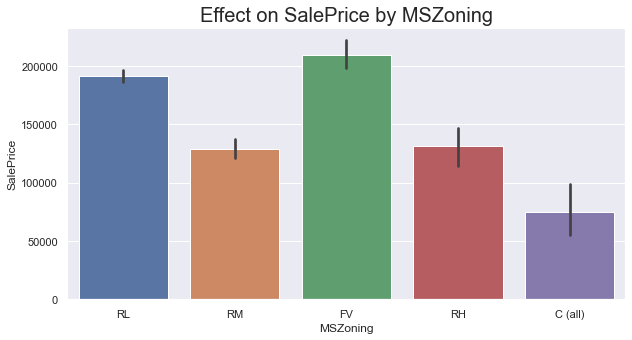

In [112]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'MSZoning', y ='SalePrice')
plt.title("Effect on SalePrice by MSZoning", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Street')

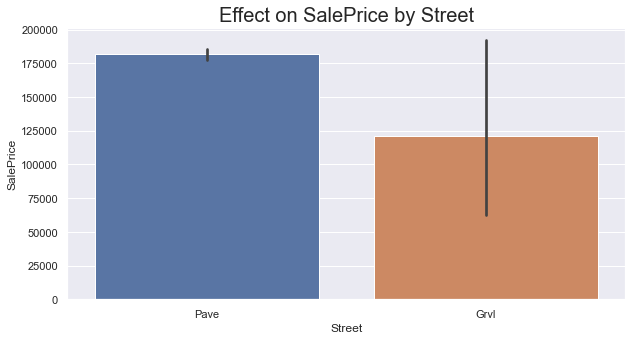

In [113]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Street', y ='SalePrice')
plt.title("Effect on SalePrice by Street", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Alley')

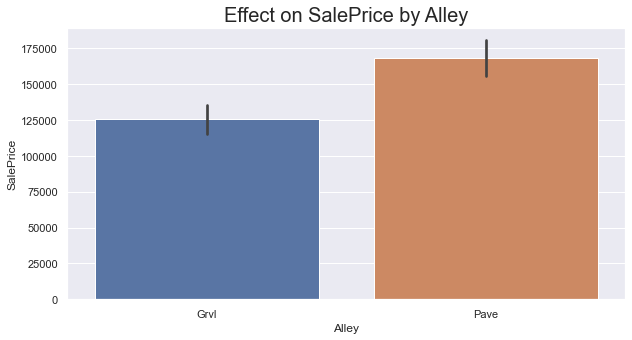

In [114]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Alley', y ='SalePrice')
plt.title("Effect on SalePrice by Alley", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by LotShape')

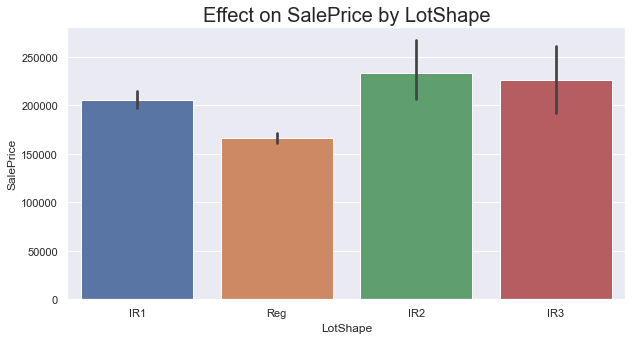

In [115]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'LotShape', y ='SalePrice')
plt.title("Effect on SalePrice by LotShape", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by LandContour')

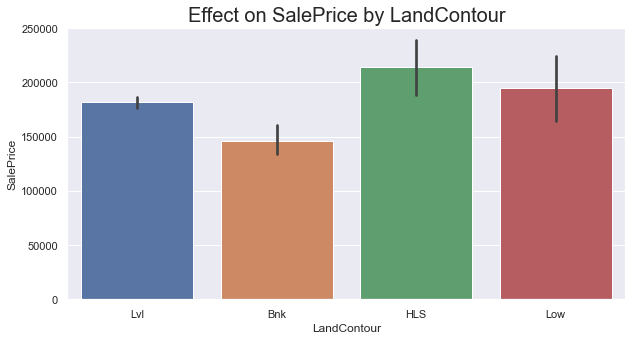

In [116]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'LandContour', y ='SalePrice')
plt.title("Effect on SalePrice by LandContour", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Utilities')

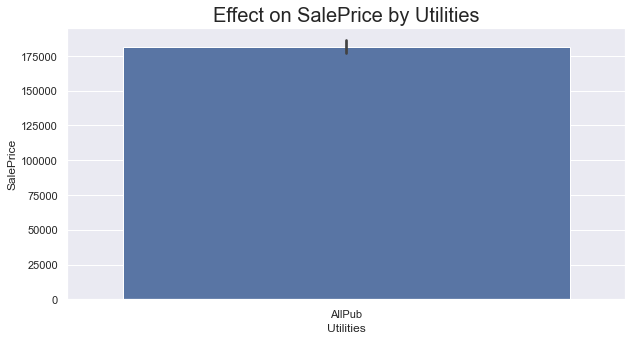

In [117]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Utilities', y ='SalePrice')
plt.title("Effect on SalePrice by Utilities", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by LotConfig')

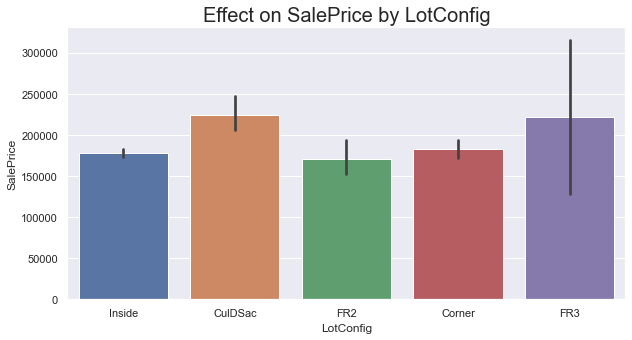

In [118]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'LotConfig', y ='SalePrice')
plt.title("Effect on SalePrice by LotConfig", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Landslope')

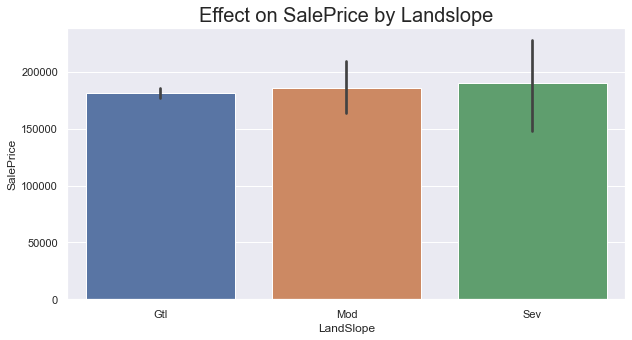

In [119]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'LandSlope', y ='SalePrice')
plt.title("Effect on SalePrice by Landslope", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Neighborhood')

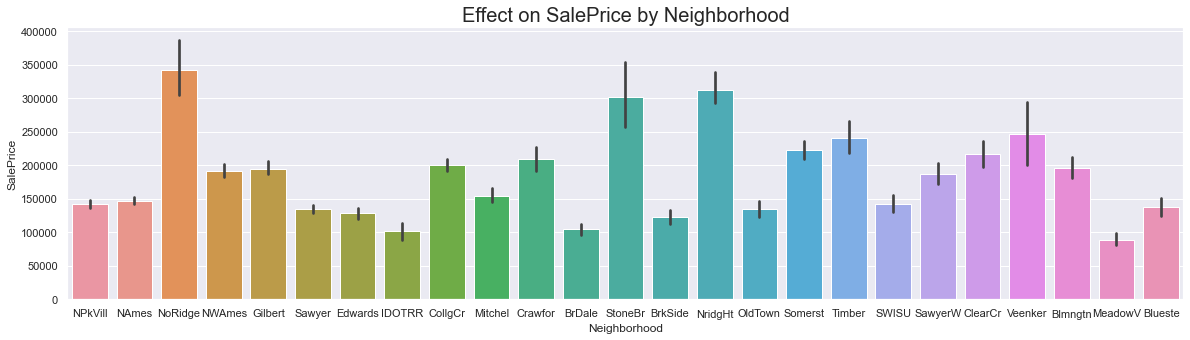

In [120]:
plt.figure(figsize = (20,5))
sns.barplot(data = train, x = 'Neighborhood', y ='SalePrice')
plt.title("Effect on SalePrice by Neighborhood", fontsize = 20)


Text(0.5, 1.0, 'Effect on SalePrice by Condition1')

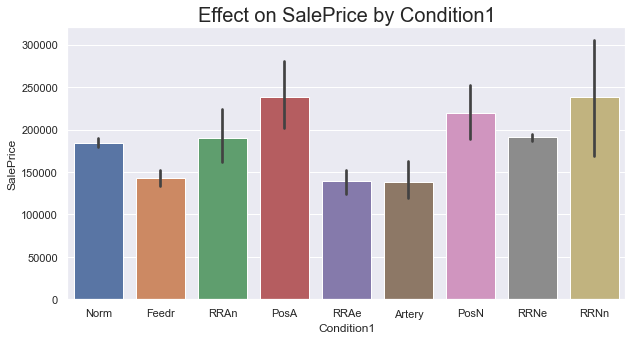

In [121]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Condition1', y ='SalePrice')
plt.title("Effect on SalePrice by Condition1", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Condition2')

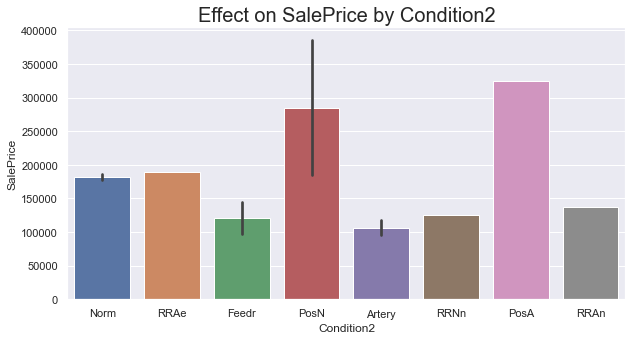

In [122]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Condition2', y ='SalePrice')
plt.title("Effect on SalePrice by Condition2", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by BldgType')

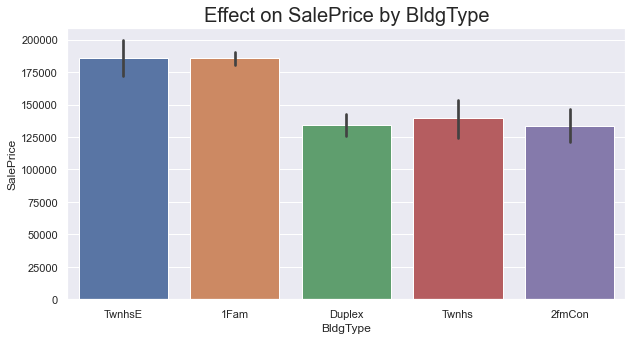

In [123]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'BldgType', y ='SalePrice')
plt.title("Effect on SalePrice by BldgType", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by HouseStyle')

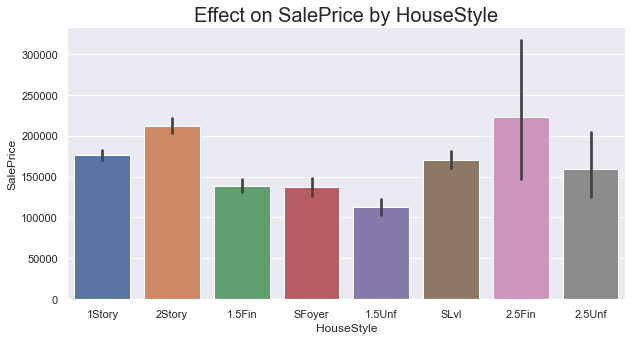

In [124]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'HouseStyle', y ='SalePrice')
plt.title("Effect on SalePrice by HouseStyle", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by RoofStyle')

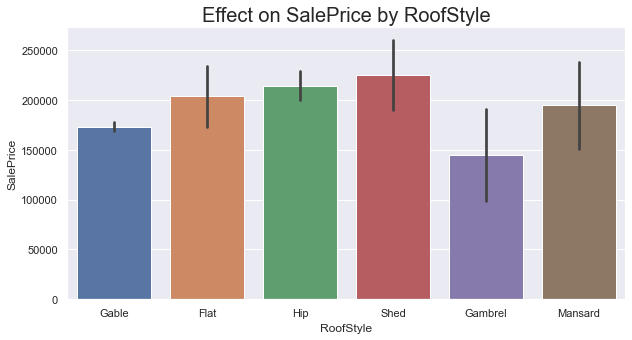

In [125]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'RoofStyle', y ='SalePrice')
plt.title("Effect on SalePrice by RoofStyle", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by RoofMatl')

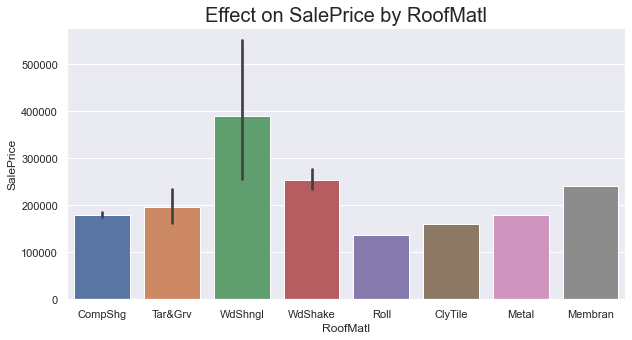

In [126]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'RoofMatl', y ='SalePrice')
plt.title("Effect on SalePrice by RoofMatl", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Exterior1st')

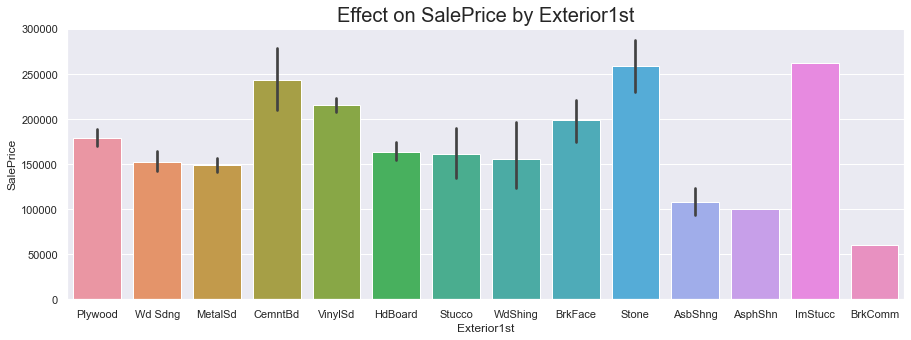

In [127]:
plt.figure(figsize = (15,5))
sns.barplot(data = train, x = 'Exterior1st', y ='SalePrice')
plt.title("Effect on SalePrice by Exterior1st", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Exterior2nd')

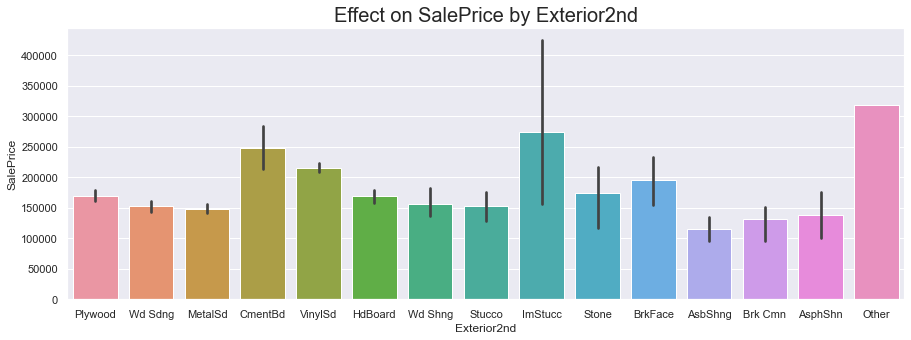

In [128]:
plt.figure(figsize = (15,5))
sns.barplot(data = train, x = 'Exterior2nd', y ='SalePrice')
plt.title("Effect on SalePrice by Exterior2nd", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by MasVnrType')

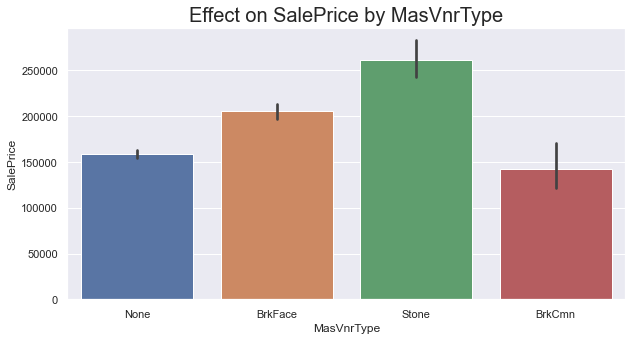

In [129]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'MasVnrType', y ='SalePrice')
plt.title("Effect on SalePrice by MasVnrType", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by ExterQual')

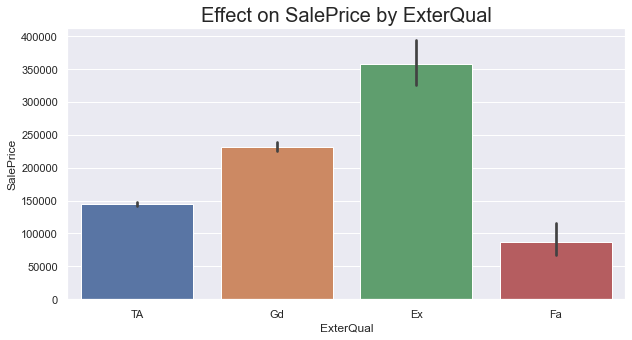

In [130]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'ExterQual', y ='SalePrice')
plt.title("Effect on SalePrice by ExterQual", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by ExterCond')

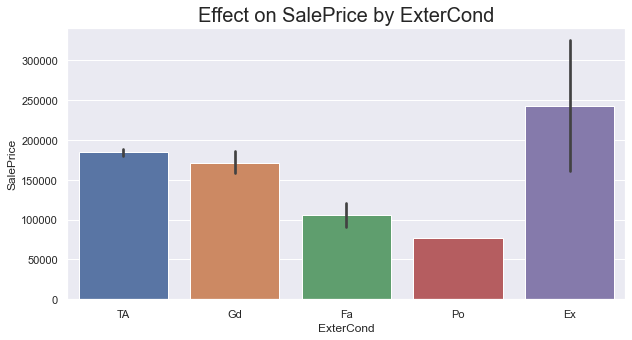

In [131]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'ExterCond', y ='SalePrice')
plt.title("Effect on SalePrice by ExterCond", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Foundation')

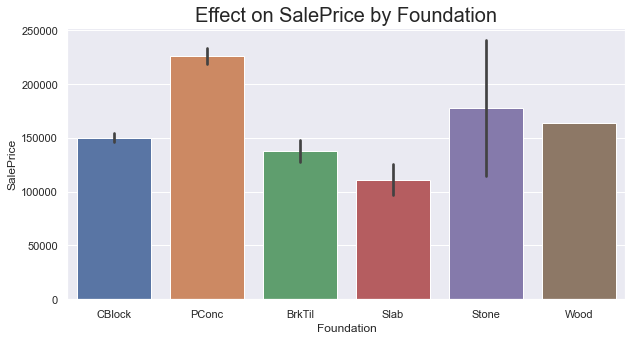

In [132]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Foundation', y ='SalePrice')
plt.title("Effect on SalePrice by Foundation", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by BsmtQual')

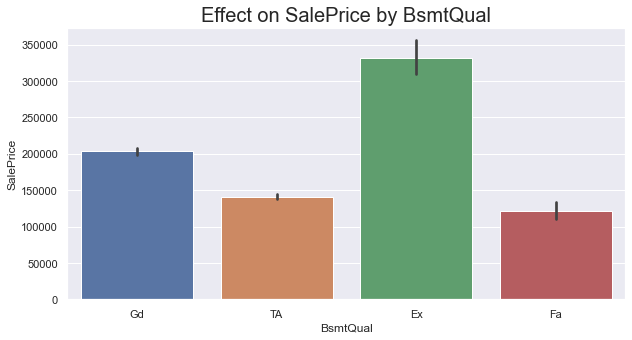

In [133]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'BsmtQual', y ='SalePrice')
plt.title("Effect on SalePrice by BsmtQual", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Basement Condition')

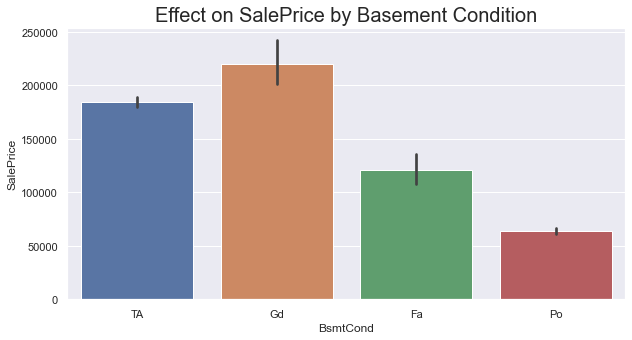

In [134]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'BsmtCond', y ='SalePrice')
plt.title("Effect on SalePrice by Basement Condition", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Basement Exposure')

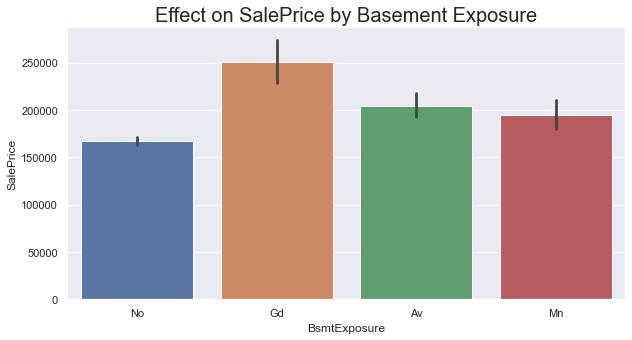

In [135]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'BsmtExposure', y ='SalePrice')
plt.title("Effect on SalePrice by Basement Exposure", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by BsmtFinType1')

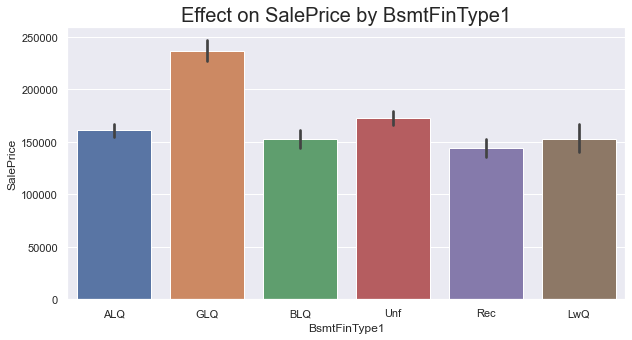

In [136]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'BsmtFinType1', y ='SalePrice')
plt.title("Effect on SalePrice by BsmtFinType1", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by BsmtFinType2')

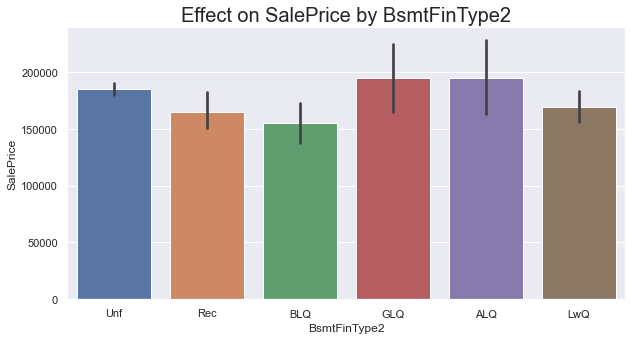

In [137]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'BsmtFinType2', y ='SalePrice')
plt.title("Effect on SalePrice by BsmtFinType2", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Heating')

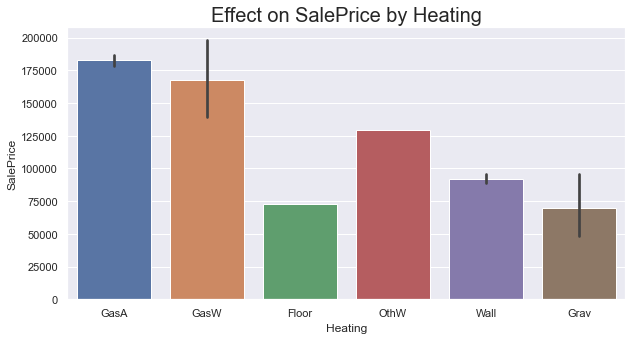

In [138]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Heating', y ='SalePrice')
plt.title("Effect on SalePrice by Heating", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by HeatingQC')

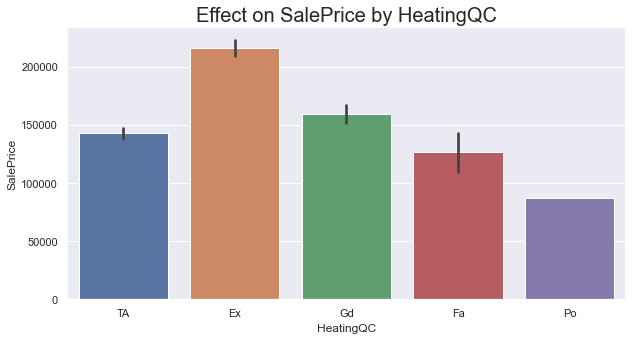

In [139]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'HeatingQC', y ='SalePrice')
plt.title("Effect on SalePrice by HeatingQC", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by CentralAir')

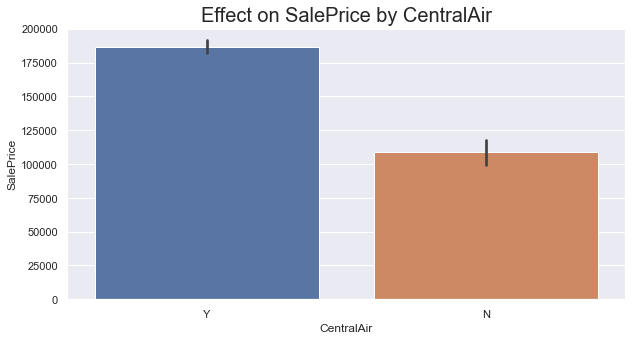

In [140]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'CentralAir', y ='SalePrice')
plt.title("Effect on SalePrice by CentralAir", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Electrical')

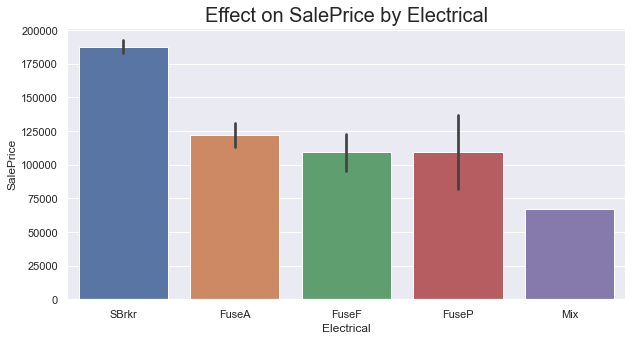

In [141]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Electrical', y ='SalePrice')
plt.title("Effect on SalePrice by Electrical", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by KitchenQual')

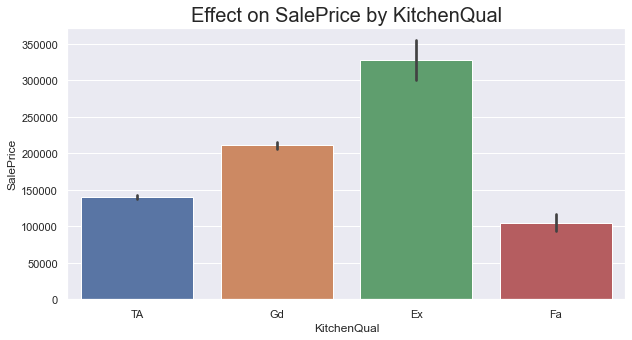

In [142]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'KitchenQual', y ='SalePrice')
plt.title("Effect on SalePrice by KitchenQual", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Funtional')

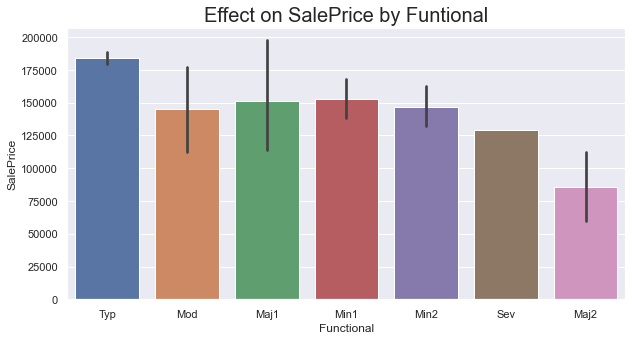

In [143]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Functional', y ='SalePrice')
plt.title("Effect on SalePrice by Funtional", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by FireplaceQu')

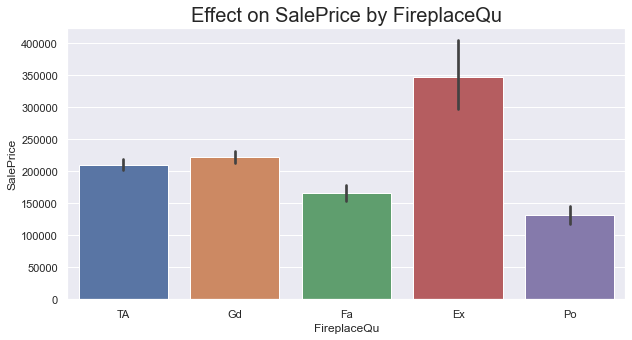

In [144]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'FireplaceQu', y ='SalePrice')
plt.title("Effect on SalePrice by FireplaceQu", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Garage Type')

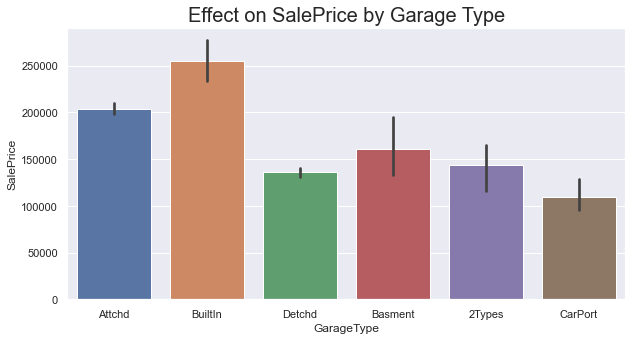

In [145]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'GarageType', y ='SalePrice')
plt.title("Effect on SalePrice by Garage Type", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by GarageFinish')

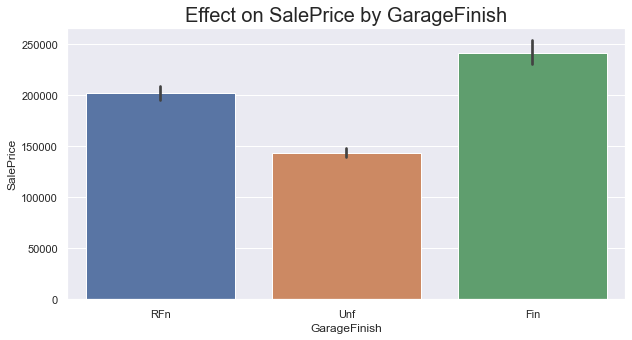

In [146]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'GarageFinish', y ='SalePrice')
plt.title("Effect on SalePrice by GarageFinish", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by GarageQual')

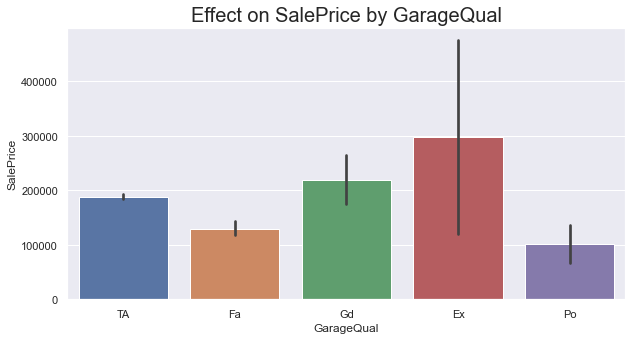

In [147]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'GarageQual', y ='SalePrice')
plt.title("Effect on SalePrice by GarageQual", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by GarageCond')

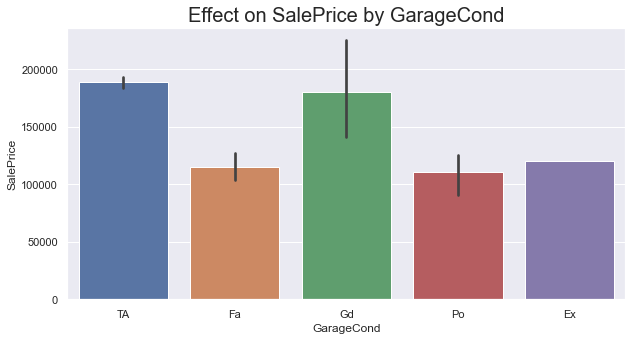

In [148]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'GarageCond', y ='SalePrice')
plt.title("Effect on SalePrice by GarageCond", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by PavedDrive')

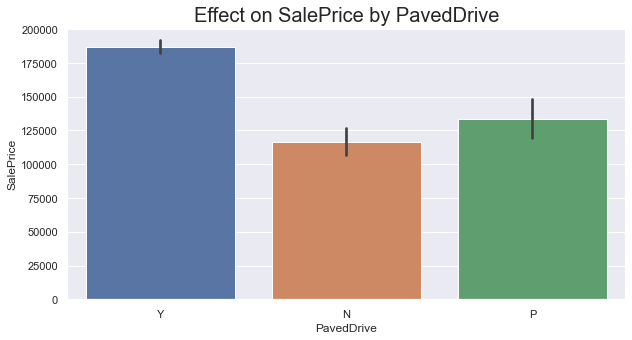

In [149]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'PavedDrive', y ='SalePrice')
plt.title("Effect on SalePrice by PavedDrive", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by PoolQC')

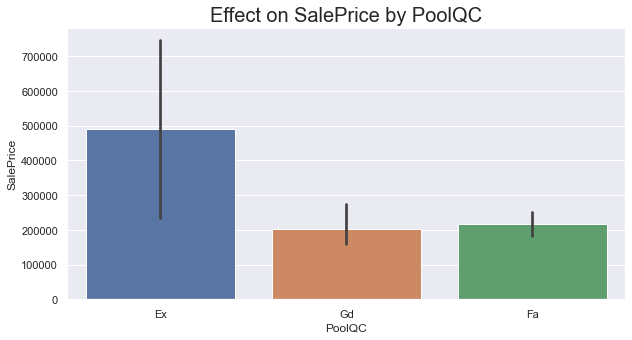

In [150]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'PoolQC', y ='SalePrice')
plt.title("Effect on SalePrice by PoolQC", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Fence')

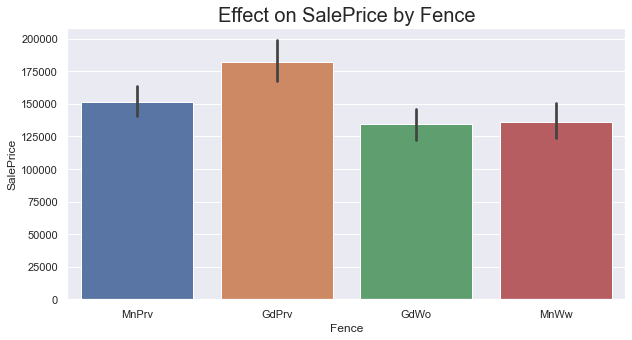

In [151]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Fence', y ='SalePrice')
plt.title("Effect on SalePrice by Fence", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by MiscFeature')

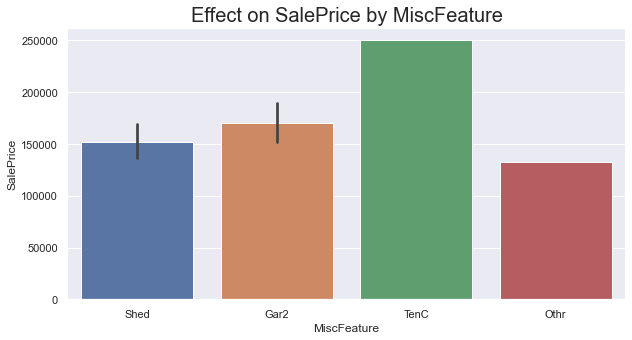

In [152]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'MiscFeature', y ='SalePrice')
plt.title("Effect on SalePrice by MiscFeature", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Sale Type')

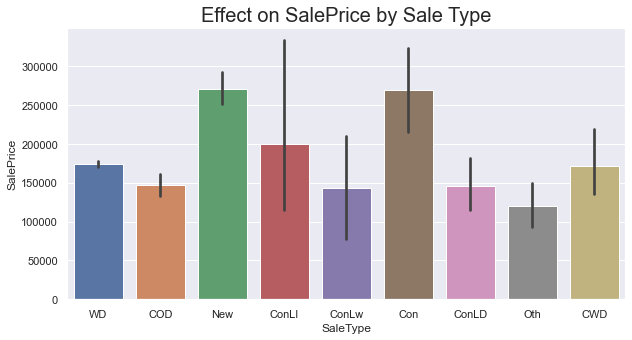

In [153]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'SaleType', y ='SalePrice')
plt.title("Effect on SalePrice by Sale Type", fontsize = 20)

Text(0.5, 1.0, 'Effect on SalePrice by Sale Condition')

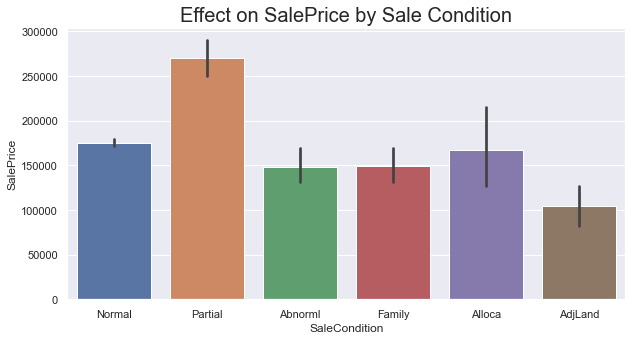

In [154]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'SaleCondition', y ='SalePrice')
plt.title("Effect on SalePrice by Sale Condition", fontsize = 20)

In [155]:
catg = train.select_dtypes("object")
cont = train.select_dtypes("number")

In [156]:
print(catg.shape)
catg.head()

(1168, 43)


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     Plywood     Plywood       None        TA        TA     CBlock       Gd   
1     Wd Sdng     Wd Sdng       None        Gd        Gd      PConc       TA   
2     MetalSd     MetalSd       None        Gd        TA      PConc       Gd   
3     Plywood     Plywood    BrkFace        TA        TA     CBlock       Gd   
4     CemntBd     CmentBd      Stone        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          ALQ          Unf    GasA        TA   
1       Gd           Gd          ALQ          Rec    GasA        Ex   
2       TA           Av          GLQ          Unf    GasA        Ex   
3       TA           No          BLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Gd   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ          TA     Attchd   
1          Y      SBrkr          Gd        Typ          TA     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          TA        Typ          TA     Attchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN    NaN         NaN   
1          Unf         TA         TA          Y    NaN    NaN         NaN   
2          Unf         TA         TA          Y    NaN    NaN         NaN   
3          RFn         TA         TA          Y    NaN  MnPrv         NaN   
4          Fin         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3      COD        Normal  
4       WD        Normal

In [157]:
print(cont.shape)
cont.head()

(1168, 38)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000

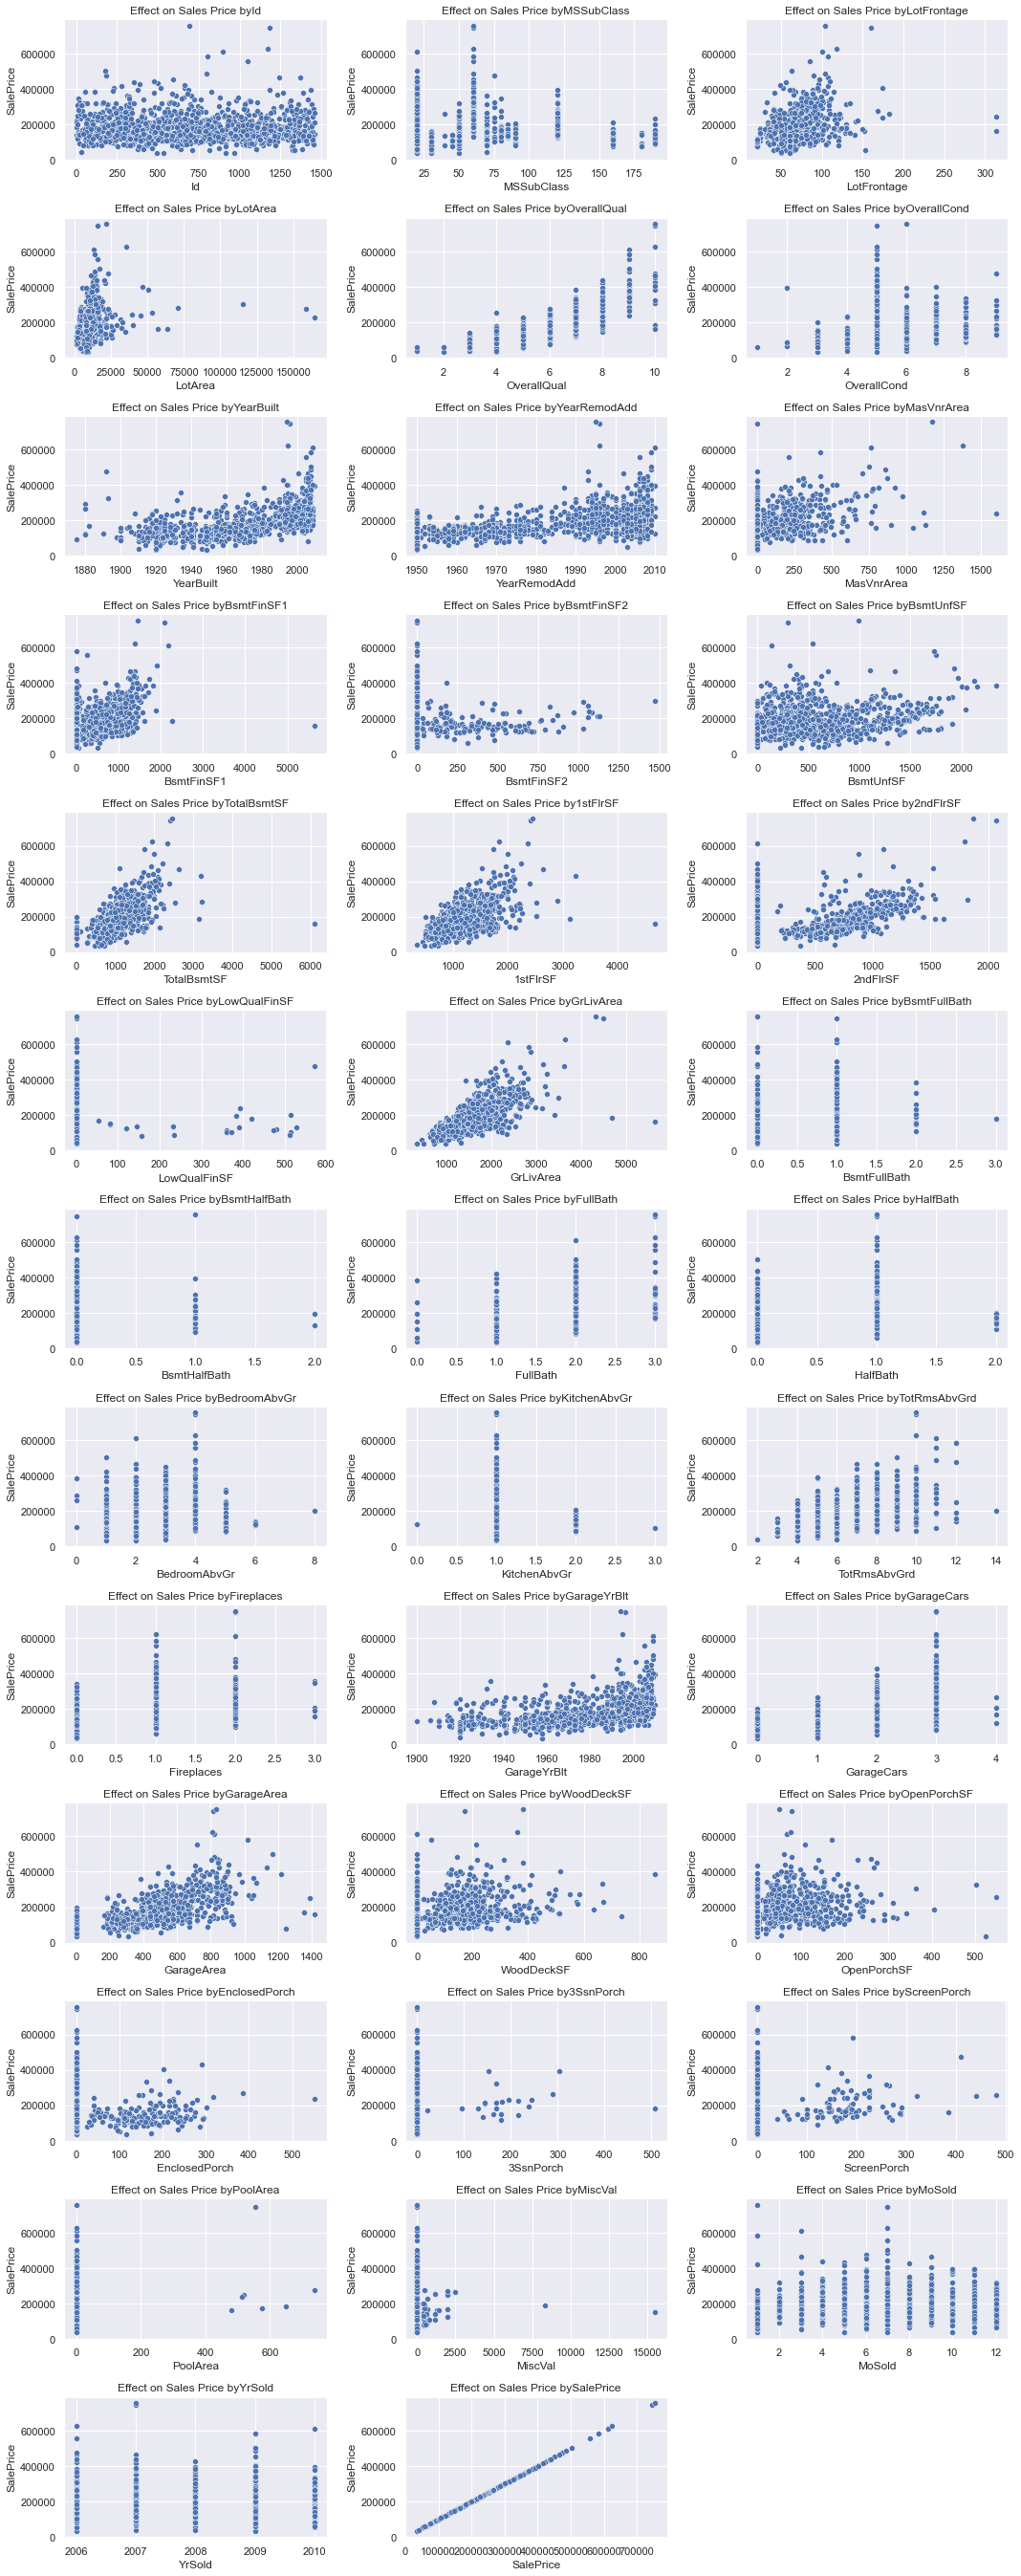

In [158]:
#Multivariate Analysis
#Visualising Data distribution of our dataset
plt.figure(figsize = (15,40), facecolor ='white')
plotnumber=1
                           
for column in cont:
    if plotnumber<=38: 
        ax = plt.subplot(14,3,plotnumber)
        sns.scatterplot(data = cont,x = cont[column],y = "SalePrice")
        plt.title('Effect on Sales Price by' + column)
    plotnumber+=1
plt.tight_layout()

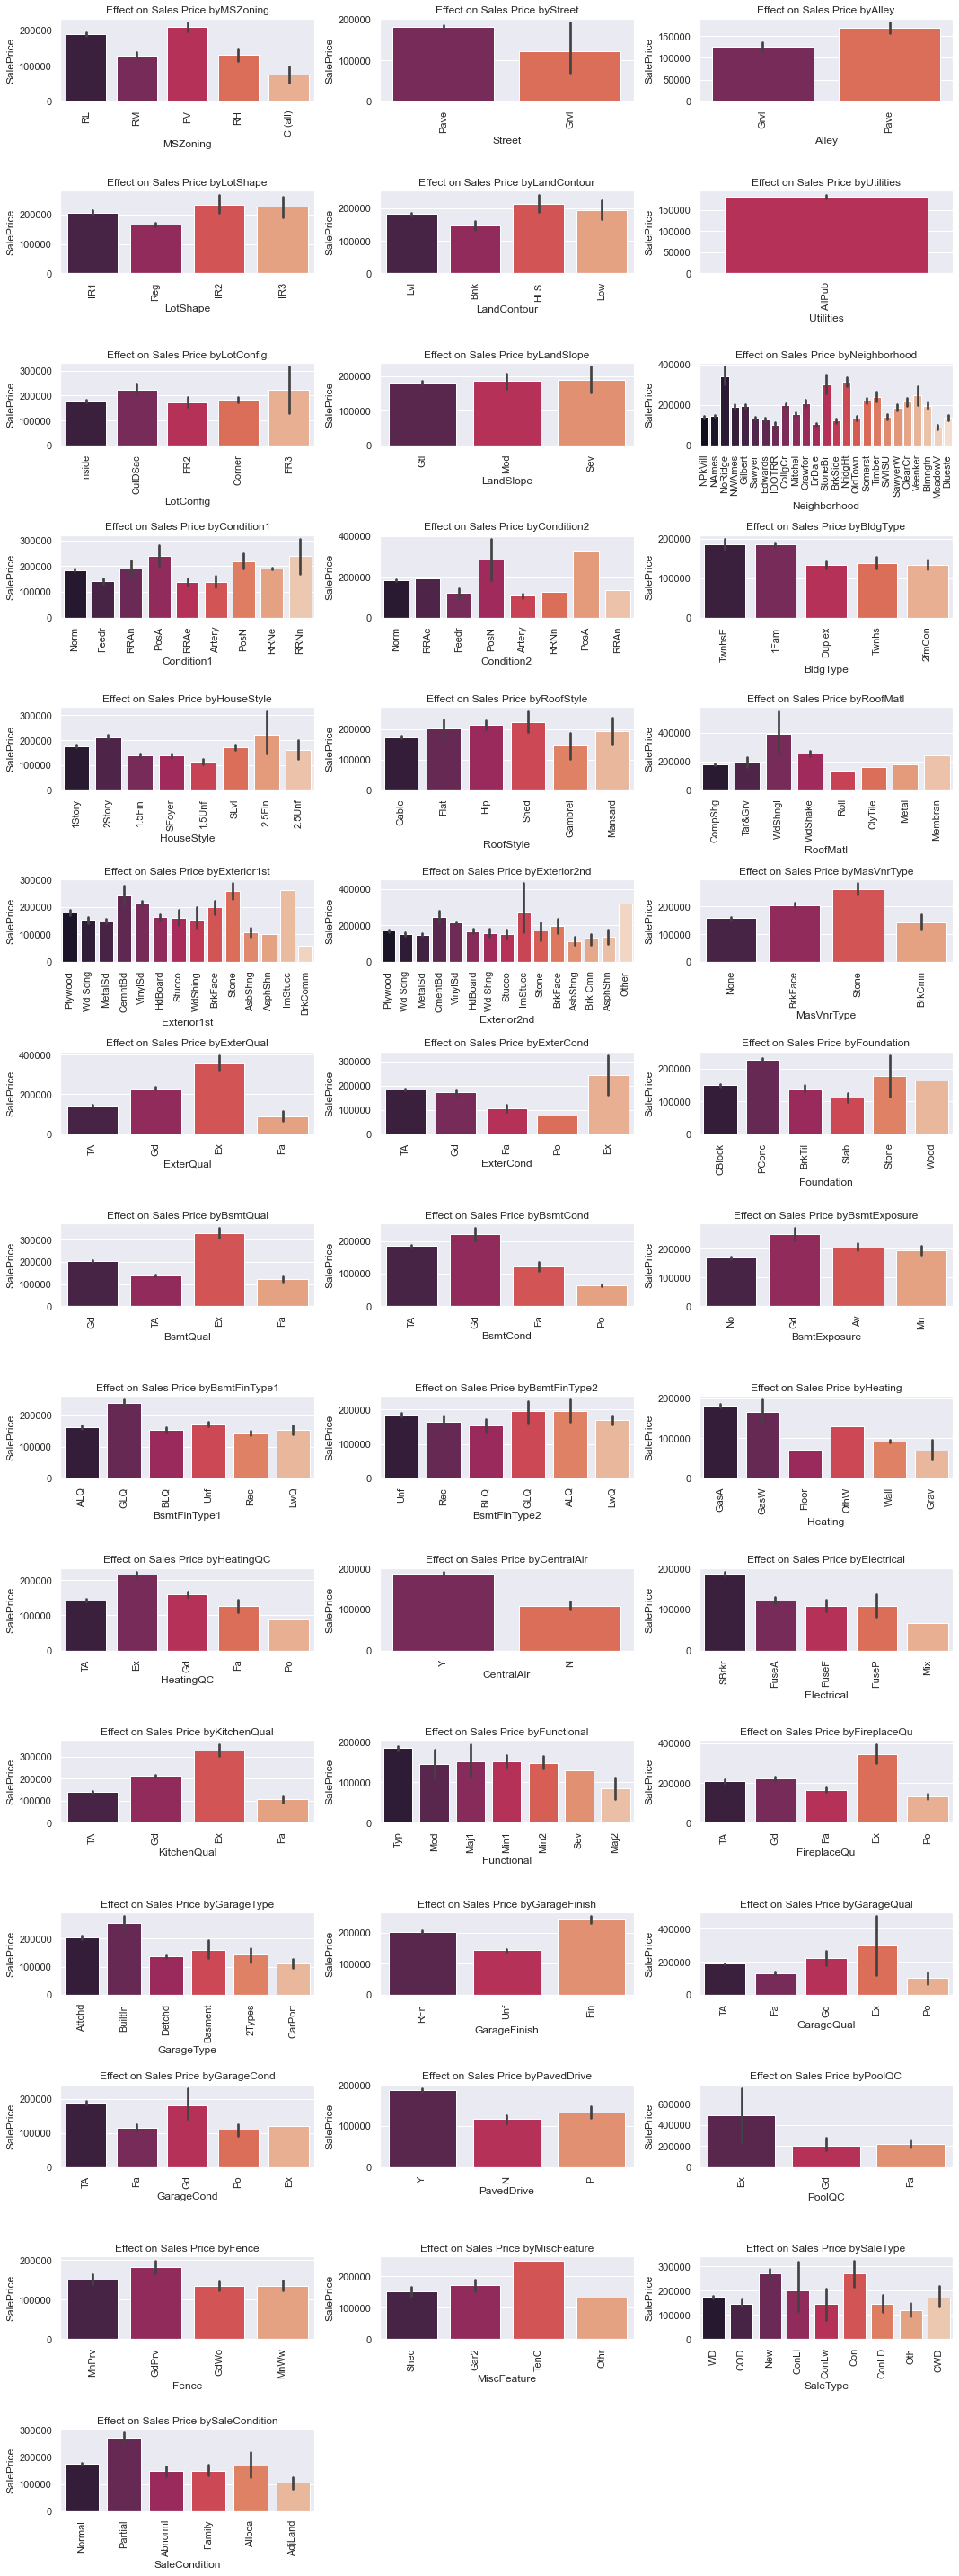

In [159]:
#Multivariate Analysis
#Visualising Data distribution of our dataset
plt.figure(figsize = (15,40), facecolor ='white')
plotnumber=1

for column in catg:
    if plotnumber<=43: 
        ax = plt.subplot(15,3,plotnumber)
        sns.barplot(data = catg, x = catg[column], y = cont["SalePrice"], palette = "rocket")
        plt.title('Effect on Sales Price by' + column)
        plt.xticks(rotation = 90)
    plotnumber+=1
plt.tight_layout()

### Multivariate Analysis 

In [160]:
train.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006629 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.365220 -0.124151     0.070462   
LotFrontage   -0.006629   -0.365220     1.000000  0.557257     0.247809   
LotArea       -0.029212   -0.124151     0.557257  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.247809  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.053345  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.118554  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.096050  0.027228     0.555945   
MasVnrArea    -0.060652    0.027868     0.202225  0.121448     0.409163   
BsmtFinSF1     0.003868   -0.052236     0.247780  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.002514  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.123943  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.386261  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.448186  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.099250  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.007885 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.410414  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.104255  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001528  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.189321  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.053168  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.264010  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002890 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.351969  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.262076  0.285983     0.390067   
GarageYrBlt   -0.000469    0.077630     0.061101 -0.034981     0.541719   
GarageCars     0.007549   -0.027639     0.276798  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.344908  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.101751  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.167092  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.023118 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.059508  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.033111  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.223429  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.004559  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.025046  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004296 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.341294  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.060652    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.027868   -0.052236   
LotFrontage      -0.053345   0.118554      0.096050    0.202225    0.247780   
LotArea           0.017513   0.005506      0.027228    0.121448    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.409163    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.137882   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.323006    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.181869    0.114430   
MasVnrArea       -0.137882   0.323006      0.181869    1.000000    0.267066   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.267066    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.065723   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.109850   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.366833    0

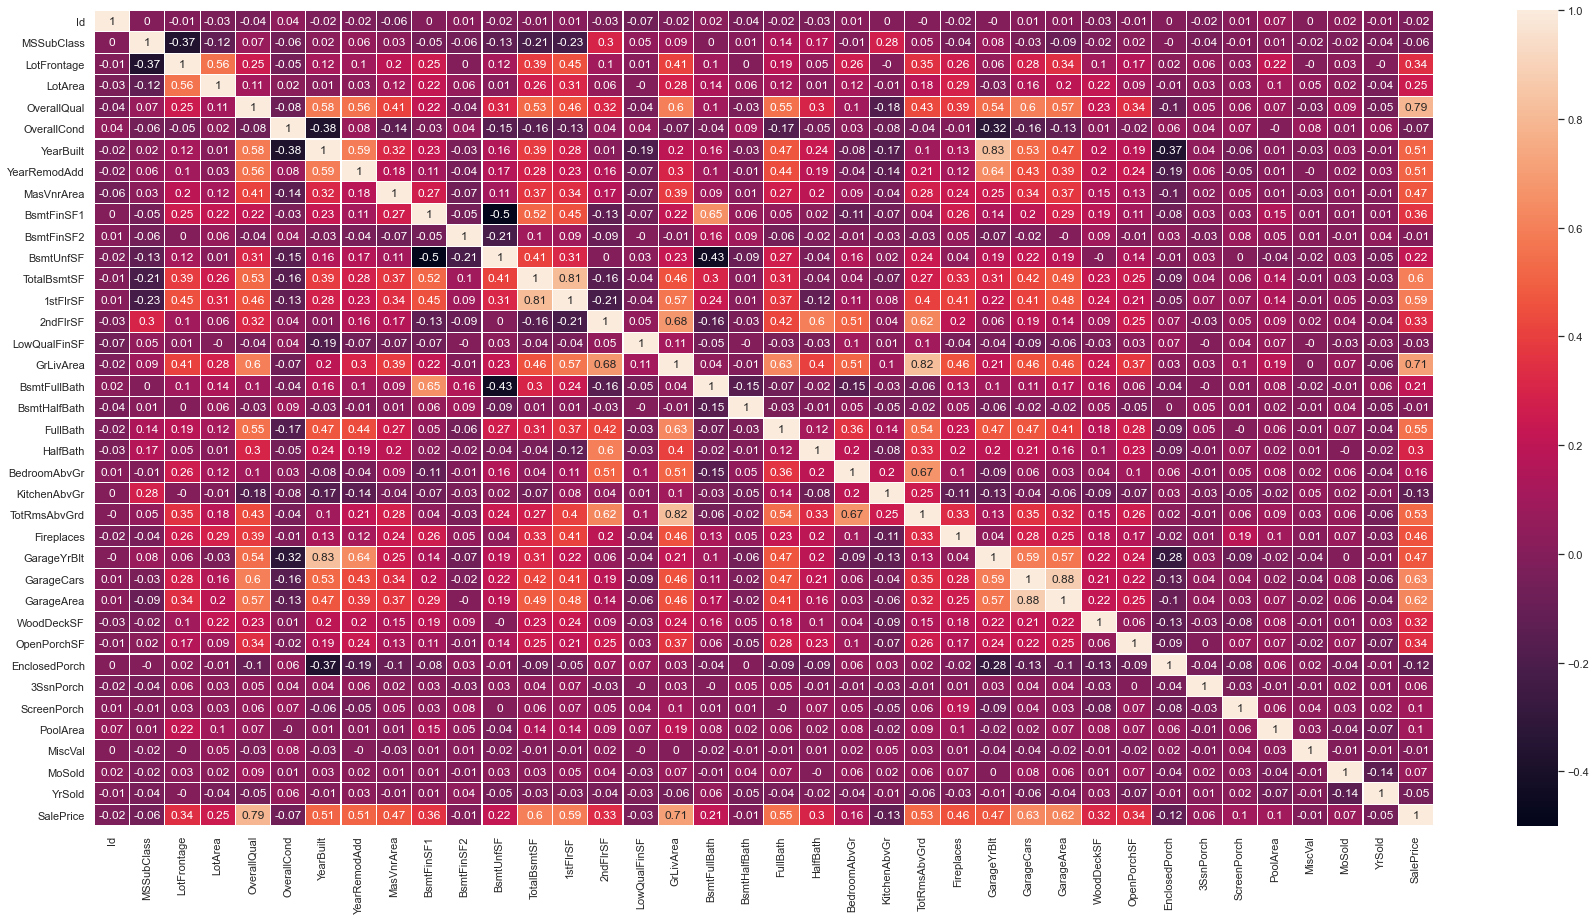

In [161]:
#Visualising correlation table
plt.figure(figsize = [30,15])
sns.heatmap(round(train.corr(),2), annot = True,linewidths=0.1,fmt = '.3g' )
plt.show()

### Data Cleaning

In [162]:
#Checking for null Values to treat them
print("\nMissing values in percentage: \n \n",train.isnull().sum()/train.shape[0]*100)
#show values in percentage


Missing values in percentage: 
 
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
Alley            93.407534
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.

<AxesSubplot:>

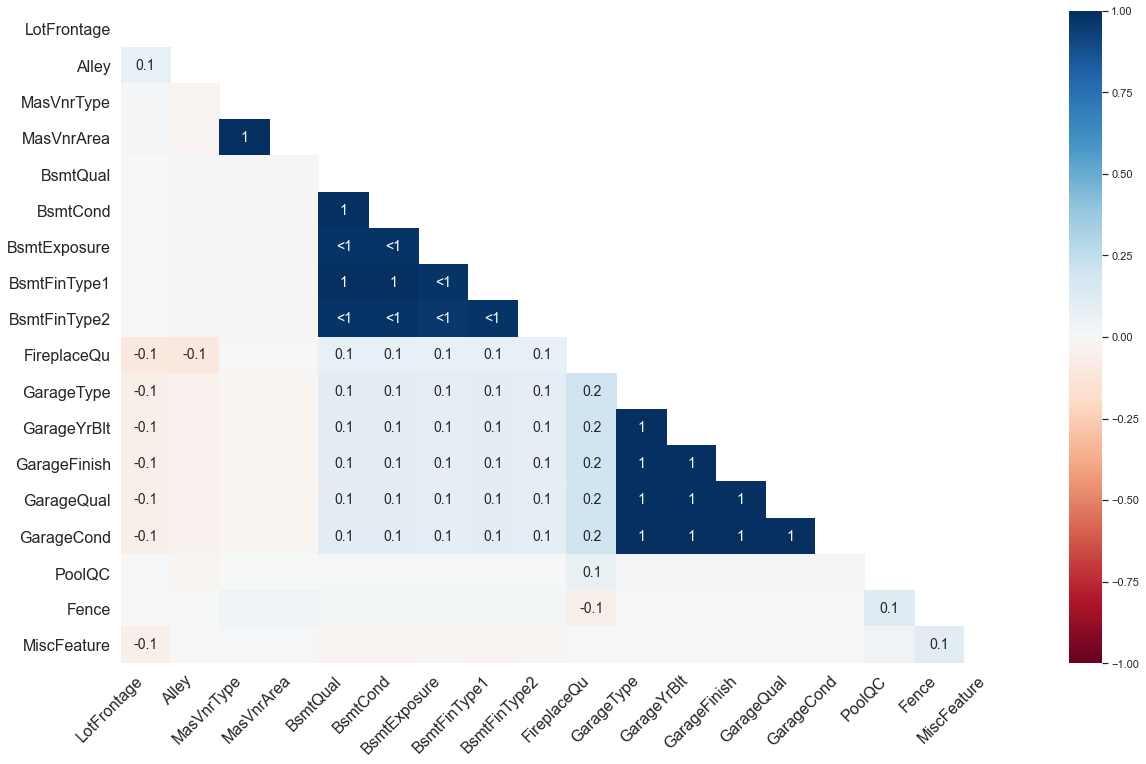

In [163]:
msno.heatmap(train)

#Dropping columns with more than 90% data missing.
df = train.drop(columns = ["Alley","PoolQC","MiscFeature"], axis = 1)
df.head()

In [164]:
train.drop("Id", axis = 1, inplace = True)

In [165]:
train['MasVnrType'].fillna('BrkFace', inplace = True)
train['BsmtQual'].fillna('No Basement', inplace = True)
train['BsmtCond'].fillna('No Basement', inplace = True)
train['BsmtExposure'].fillna('No Basement', inplace = True)
train['BsmtFinType1'].fillna('No Basement', inplace = True)
train['BsmtFinType2'].fillna('No Basement', inplace = True)
train['FireplaceQu'].fillna('No Fireplace', inplace = True)
train['GarageType'].fillna("No Garage", inplace = True)
train['GarageFinish'].fillna("No Garage", inplace = True)
train['GarageQual'].fillna("No Garage", inplace = True)
train['GarageCond'].fillna("No Garage", inplace = True)
train['Fence'].fillna("No Fence", inplace = True)
train['Alley'].fillna("No Alley Way", inplace = True)
train['PoolQC'].fillna("No Pool", inplace = True)
train['MiscFeature'].fillna("No Add Feature", inplace = True)

In [166]:
train['GarageYrBlt'].fillna(0, inplace = True)
train['MasVnrArea'].fillna(0, inplace = True)

In [167]:
print(train['LotFrontage'].mean())
train['LotFrontage'].fillna(70.988,inplace = True)

70.98846960167715


In [168]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [169]:
from sklearn.preprocessing import LabelEncoder

In [170]:
enc = LabelEncoder()
train = train.apply(enc.fit_transform)

In [171]:
train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          11         3           41       80       1      1         0   
1           0         3           66      808       1      1         0   
2           5         3           63      449       1      1         0   
3           0         3           76      632       1      1         0   
4           0         3           41      821       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            13           2   
1            3          0          4          1            12           2   
2            3          0          1          0            15           2   
3            3          0          4          0            14           2   
4            3          0          2          0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         4           2            5            4         75   
1           2         0           2            7            5         69   
2           2         0           5            6            4         95   
3           2         0           2            5            5         76   
4           2         0           2            5            6         76   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            26          1         1            8            9           2   
1            20          0         5           12           13           2   
2            47          1         1            7            7           2   
3            27          3         1            8            9           1   
4            50          1         1            4            4           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0           0          3          4           1         2         4   
1           0          2          2           2         4         1   
2           0          2          4           2         2         4   
3         236          3          4           1         2         4   
4          73          2          4           1         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             0          25             6           0   
1             1             0         112             5         107   
2             0             2         382             6           0   
3             3             1         312             6           0   
4             3             0         489             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        500          286        1          4           1           4   
1        527          624        1          0           1           4   
2        135          312        1          0           1           4   
3        558          590        1          0           1           4   
4        192          537        1          2           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       180         0             0         70             0             0   
1       654         0             0        646             1             0   
2       295       215             0        585             1             0   
3       617         0             0        520             0             0   
4       541         0             0        399             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             3   
1         2         0             4             1            2             6   
2         2         1             3             1            3             6   
3         2         0             3             1            3             5   
4      

### Cleaning Test Dataset

In [172]:
test = pd.read_csv("test.csv")
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [173]:
print("Shape of our dataset is : ",test.shape)

Shape of our dataset is :  (292, 80)


In [174]:
#Analysing Datatypes in our dataset and Checking for null Values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [175]:
#Statistical Analysis of Numerical Features in our dataset
test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count   292.000000   292.000000    292.000000   291.000000   292.000000   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521   
std       1.063267    30.447016     20.105792   175.030021   429.559675   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean     46.157534   557.315068  1042.767123  1133.691781   339.657534   
std     152.467119   411.043768   424.561153   366.941919   424.278825   
min       0.000000     0.000000     0.000000   372.000000     0.000000   
25%       0.000000   255.000000   771.750000   858.000000     0.000000   
50%       0.000000   487.000000   971.000000  1047.500000     0.000000   
75%       0.000000   780.000000  1322.000000  1370.500000   717.000000   
max    1085.000000  1935.000000  3094.000000  2402.000000  1589.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    292.000000   292.000000    292.000000    292.000000  292.000000   
mean       3.702055  1477.051370      0.424658      0.065068    1.575342   
std       38.219527   514.199429      0.508831      0.247070    0.547856   
min        0.000000   520.000000      0.000000      0.000000    0.000000   
25%        0.000000  1061.500000      0.000000      0.000000    1.000000   
50%        0.000000  1440.000000      0.000000      0.000000    2.000000   
75%        0.000000  1720.250000      1.000000      0.000000    2.000000   
max      479.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   275.000000  292.000000   292.000000  292.000000   292.000000   
mean   1979.760000    1.729452   457.458904   86.397260    47.061644   
std      23.868875    0.754430   210.785591  121.898836    65.865449   
min    1916.000000    0.000000     0.000000    0.000000     0.000000   
25%    1964.000000    1.000000   300.000000    0.000000     0.000000   
50%    1979.000000    2.000000   467.500000    0.000000    28.500000   
75%    2003.000000    2.000000   569.750000  149.250000    66.000000   
max    2010.000000    4.000000  1052.000000  728.000000   41

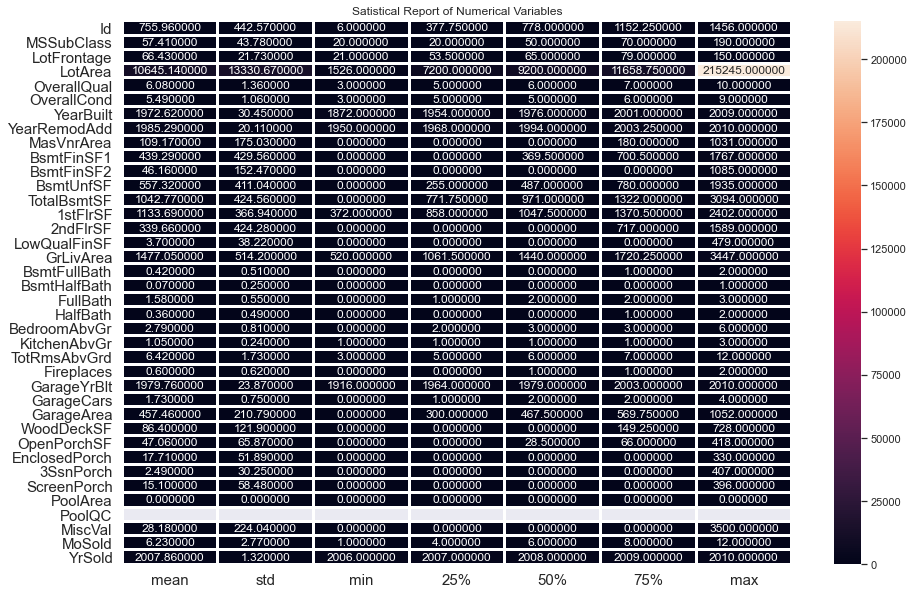

In [176]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(test.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

In [177]:
#Checking for Duplicate Values
test.duplicated().sum()

0

In [178]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [179]:
#Checking for null Values to treat them
print("\nMissing values in percentage: \n \n",test.isnull().sum()/test.shape[0]*100)
#show values in percentage


Missing values in percentage: 
 
 Id                 0.000000
MSSubClass         0.000000
MSZoning           0.000000
LotFrontage       15.410959
LotArea            0.000000
Street             0.000000
Alley             95.205479
LotShape           0.000000
LandContour        0.000000
Utilities          0.000000
LotConfig          0.000000
LandSlope          0.000000
Neighborhood       0.000000
Condition1         0.000000
Condition2         0.000000
BldgType           0.000000
HouseStyle         0.000000
OverallQual        0.000000
OverallCond        0.000000
YearBuilt          0.000000
YearRemodAdd       0.000000
RoofStyle          0.000000
RoofMatl           0.000000
Exterior1st        0.000000
Exterior2nd        0.000000
MasVnrType         0.342466
MasVnrArea         0.342466
ExterQual          0.000000
ExterCond          0.000000
Foundation         0.000000
BsmtQual           2.397260
BsmtCond           2.397260
BsmtExposure       2.397260
BsmtFinType1       2.397260
BsmtFinSF1   

<AxesSubplot:>

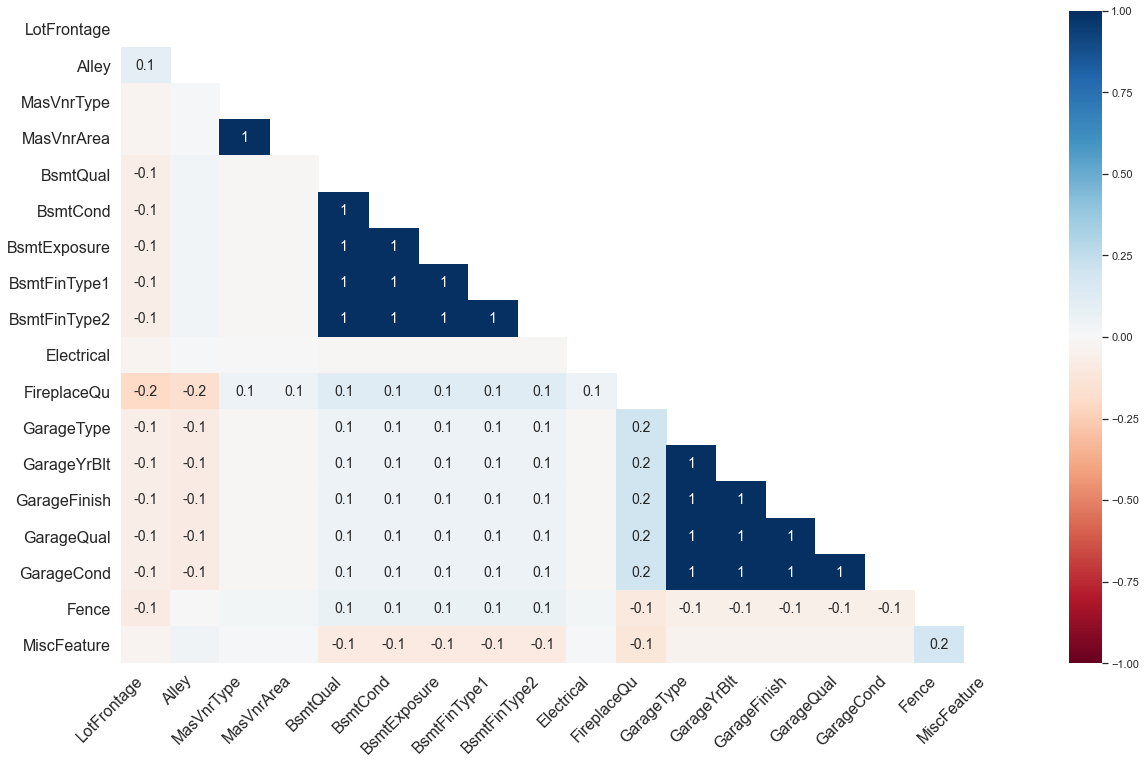

In [180]:
msno.heatmap(test)

In [181]:
test.drop("Id", axis = 1, inplace = True)

In [182]:
test['MasVnrType'].fillna('BrkFace', inplace = True)
test['BsmtQual'].fillna('No Basement', inplace = True)
test['BsmtCond'].fillna('No Basement', inplace = True)
test['BsmtExposure'].fillna('No Basement', inplace = True)
test['BsmtFinType1'].fillna('No Basement', inplace = True)
test['BsmtFinType2'].fillna('No Basement', inplace = True)
test['FireplaceQu'].fillna('No Fireplace', inplace = True)
test['GarageType'].fillna("No Garage", inplace = True)
test['GarageFinish'].fillna("No Garage", inplace = True)
test['GarageQual'].fillna("No Garage", inplace = True)
test['GarageCond'].fillna("No Garage", inplace = True)
test['Fence'].fillna("No Fence", inplace = True)
test['PoolQC'].fillna("No Pool", inplace = True)
test['Alley'].fillna("No Alley Way", inplace = True)
test['MiscFeature'].fillna("No Add Feature", inplace = True)

In [183]:
test['GarageYrBlt'].fillna(0, inplace = True)
test['MasVnrArea'].fillna(0, inplace = True)

In [184]:
print(test['LotFrontage'].mean())

66.4251012145749


In [185]:
test['LotFrontage'].fillna(66.425,inplace = True)

In [186]:
test.dropna(inplace = True)

In [187]:
test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [188]:
print("Shape of our Final Train Dataset: ", train.shape)
print("Shape of our Final Test Dataset: ", test.shape)

Shape of our Final Train Dataset:  (1168, 80)
Shape of our Final Test Dataset:  (291, 79)


### Removing Skewness

In [189]:
cont.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

Id                  AxesSubplot(0.125,0.799681;0.133621x0.0803191)
MSSubClass       AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
LotFrontage       AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
LotArea          AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
OverallQual      AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
OverallCond         AxesSubplot(0.125,0.703298;0.133621x0.0803191)
YearBuilt        AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
YearRemodAdd      AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
MasVnrArea       AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
BsmtFinSF1       AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
BsmtFinSF2          AxesSubplot(0.125,0.606915;0.133621x0.0803191)
BsmtUnfSF        AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
TotalBsmtSF       AxesSubplot(0.44569,0.606915;0.133621x0.0803191)
1stFlrSF         AxesSubplot(0.606034,0.606915;0.133621x0.0803191)
2ndFlrSF         AxesSubplot(0.766379,0.606915;0.133621x0.0803

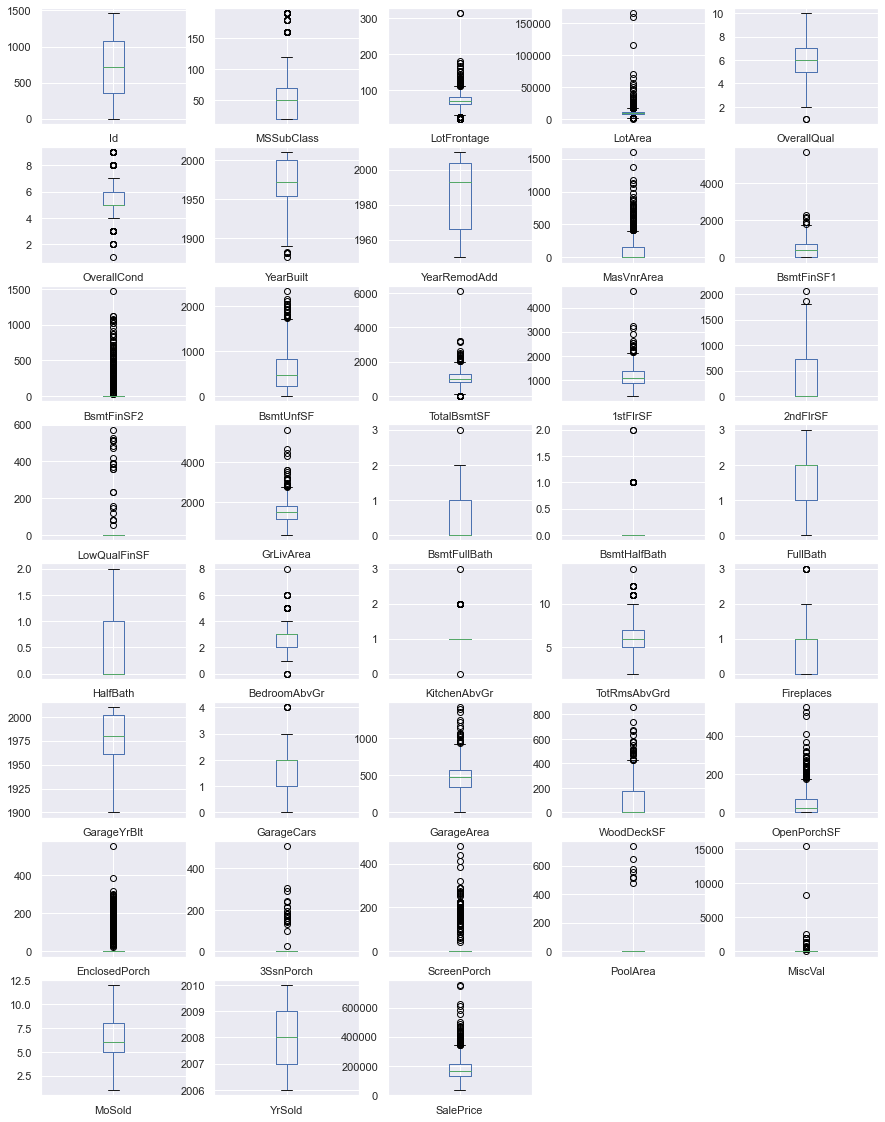

In [190]:
#Visualising Skewness after Removal
cont.plot(kind ='box', subplots = True, layout = (8,5), figsize = (15,20))

In [191]:
#Removind/ Reducing Skewness using Square - Root Transformations

train['MSSubCLass'] = np.sqrt(train['MSSubClass'])
train['LotFrontage'] = np.sqrt(train['LotFrontage'])
train['LotArea'] = np.sqrt(train['LotFrontage'])
train['1stFlrSF'] = np.sqrt(train['1stFlrSF'])
train['BsmtFinSF1'] = np.sqrt(train['BsmtFinSF1'])
train['TotalBsmtSF'] = np.sqrt(train['TotalBsmtSF'])
train['GrLivArea'] = np.sqrt(train['GrLivArea'])
train['WoodDeckSF'] = np.sqrt(train['WoodDeckSF'])
train['OpenPorchSF'] = np.sqrt(train['OpenPorchSF'])
train['SalePrice'] = np.sqrt(train['SalePrice'])

In [192]:
#Removind/ Reducing Skewness using Cube - Root Transformations


train['MasVnrArea'] = np.cbrt(train['MasVnrArea'])
train['2ndFlrSF'] = np.cbrt(train['2ndFlrSF'])
train['BsmtFinSF2'] = np.cbrt(train['BsmtFinSF2'])
train['LowQualFinSF'] = np.cbrt(train['LowQualFinSF'])
train['3SsnPorch'] = np.cbrt(train['3SsnPorch'])
train['ScreenPorch'] = np.cbrt(train['ScreenPorch'])
train['PoolArea'] = np.cbrt(train['PoolArea'])
train['EnclosedPorch'] = np.cbrt(train['EnclosedPorch'])
train['MiscVal'] = np.cbrt(train['MiscVal'])

Id                  AxesSubplot(0.125,0.799681;0.133621x0.0803191)
MSSubClass       AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
LotFrontage       AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
LotArea          AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
OverallQual      AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
OverallCond         AxesSubplot(0.125,0.703298;0.133621x0.0803191)
YearBuilt        AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
YearRemodAdd      AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
MasVnrArea       AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
BsmtFinSF1       AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
BsmtFinSF2          AxesSubplot(0.125,0.606915;0.133621x0.0803191)
BsmtUnfSF        AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
TotalBsmtSF       AxesSubplot(0.44569,0.606915;0.133621x0.0803191)
1stFlrSF         AxesSubplot(0.606034,0.606915;0.133621x0.0803191)
2ndFlrSF         AxesSubplot(0.766379,0.606915;0.133621x0.0803

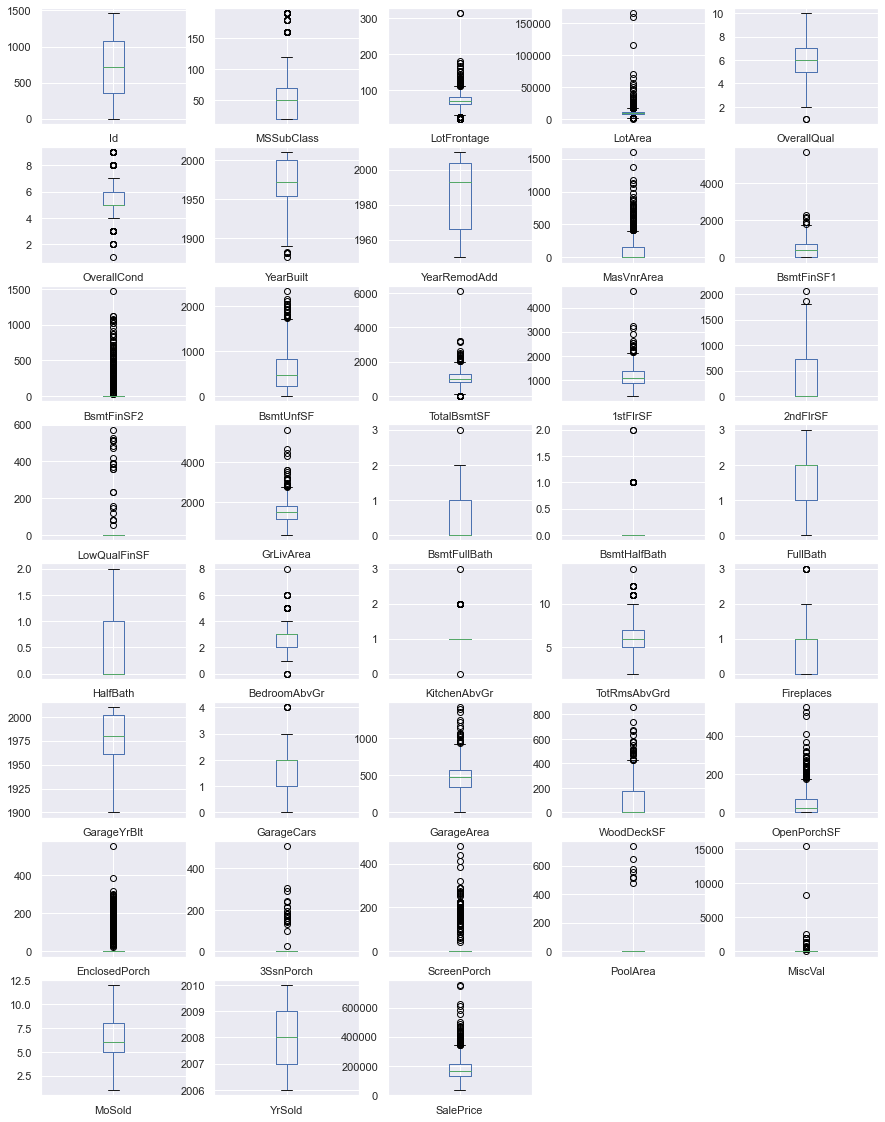

In [193]:
#Visualising Skewness after Removal
cont.plot(kind ='box', subplots = True, layout = (8,5), figsize = (15,20))

In [194]:
cont1 = test.select_dtypes("number")
cont1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20       86.000    14157            9            5       2005   
1         120       66.425     5814            8            5       1984   
2          20       66.425    11838            8            5       2001   
3          70       75.000    12000            7            7       1941   
4          60       86.000    14598            6            5       2007   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2006       200.0        1249           0        673         1922   
1          1984         0.0        1036           0        184         1220   
2          2001         0.0           0           0       1753         1753   
3          1950         0.0         275           0        429          704   
4          2007        74.0           0           0        894          894   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             3             1             8           1   
1         1         0             1             1             4           1   
2         2         0             3             1             7           1   
3         1         1             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2005.0           3         676         178           51   
1       1984.0           2         565          63            0   
2       2001.0           2         522         202          151   
3       1941.0           1         234           0            0   
4       2007.0           3         668         100           18   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       7    2007  
1              0          0            0         0        0       8    2009  
2              0          0            0         0        0       6    2009  
3              0          0            0         0        0       7    2009  
4              0          0            0         0        0       1    2008

In [195]:
test.skew()

MSSubClass        1.363035
LotFrontage       0.469573
LotArea          12.759728
OverallQual       0.391432
OverallCond       1.204544
YearBuilt        -0.751861
YearRemodAdd     -0.531093
MasVnrArea        1.973451
BsmtFinSF1        0.735646
BsmtFinSF2        3.690979
BsmtUnfSF         0.955850
TotalBsmtSF       0.521819
1stFlrSF          0.687823
2ndFlrSF          0.772311
LowQualFinSF     10.910919
GrLivArea         1.007349
BsmtFullBath      0.457928
BsmtHalfBath      3.537585
FullBath         -0.043444
HalfBath          0.770114
BedroomAbvGr      0.077794
KitchenAbvGr      4.840173
TotRmsAbvGrd      0.808001
Fireplaces        0.534932
GarageYrBlt      -3.769344
GarageCars       -0.276477
GarageArea        0.130617
WoodDeckSF        1.706585
OpenPorchSF       2.180950
EnclosedPorch     3.170169
3SsnPorch        12.256231
ScreenPorch       4.174081
PoolArea          0.000000
MiscVal          13.242048
MoSold            0.182075
YrSold            0.019477
dtype: float64

In [196]:
#Removing/ Reducing Skewness using Square - Root Transformations

test['BsmtFinSF1'] = np.sqrt(test['BsmtFinSF1'])
test['WoodDeckSF'] = np.sqrt(test['WoodDeckSF'])
test['OpenPorchSF'] = np.sqrt(test['OpenPorchSF'])

In [197]:
#Removing/ Reducing Skewness using Cube - Root Transformations

test['2ndFlrSF'] = np.cbrt(test['2ndFlrSF'])
test['BsmtFinSF2'] = np.cbrt(test['BsmtFinSF2'])
test['LowQualFinSF'] = np.cbrt(test['LowQualFinSF'])
test['3SsnPorch'] = np.cbrt(test['3SsnPorch'])
test['ScreenPorch'] = np.cbrt(test['ScreenPorch'])
test['EnclosedPorch'] = np.cbrt(test['EnclosedPorch'])
test['MiscVal'] = np.cbrt(test['MiscVal'])

### Encoding Categorical Variables

In [198]:
#Encoding our Categorical Features
train = train.apply(enc.fit_transform)
train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          11         3           41       41       1      1         0   
1           0         3           66       66       1      1         0   
2           5         3           63       63       1      1         0   
3           0         3           76       76       1      1         0   
4           0         3           41       41       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            13           2   
1            3          0          4          1            12           2   
2            3          0          1          0            15           2   
3            3          0          4          0            14           2   
4            3          0          2          0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         4           2            5            4         75   
1           2         0           2            7            5         69   
2           2         0           5            6            4         95   
3           2         0           2            5            5         76   
4           2         0           2            5            6         76   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            26          1         1            8            9           2   
1            20          0         5           12           13           2   
2            47          1         1            7            7           2   
3            27          3         1            8            9           1   
4            50          1         1            4            4           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0           0          3          4           1         2         4   
1           0          2          2           2         4         1   
2           0          2          4           2         2         4   
3         236          3          4           1         2         4   
4          73          2          4           1         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             0          25             6           0   
1             1             0         112             5         107   
2             0             2         382             6           0   
3             3             1         312             6           0   
4             3             0         489             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        500          286        1          4           1           4   
1        527          624        1          0           1           4   
2        135          312        1          0           1           4   
3        558          590        1          0           1           4   
4        192          537        1          2           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       180         0             0         70             0             0   
1       654         0             0        646             1             0   
2       295       215             0        585             1             0   
3       617         0             0        520             0             0   
4       541         0             0        399             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             3   
1         2         0             4             1            2             6   
2         2         1             3             1            3             6   
3         2         0             3             1            3             5   
4      

In [199]:
#Encoding our Categorical Features
test = test.apply(enc.fit_transform)
test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0           0         2           48      214       1      1         0   
1          11         2           31       34       1      1         0   
2           0         2           31      179       1      1         3   
3           6         2           40      184       1      1         3   
4           5         2           48      219       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          0          0            21           2   
1            3          0          1          0            21           2   
2            3          0          4          0             4           2   
3            0          0          4          0             5           2   
4            3          0          1          0            20           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            6            2         79   
1           0         4           2            5            2         60   
2           0         0           2            5            2         75   
3           0         0           5            4            4         25   
4           0         0           5            3            2         81   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            52          3         0            9           11           3   
1            31          1         0            5            5           2   
2            47          3         0            9           11           2   
3             0          1         0            6            7           2   
4            53          1         0            9           11           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0          45          2          3           2         0         3   
1           0          2          3           1         2         3   
2           0          2          3           2         2         3   
3           0          3          3           1         4         3   
4          11          2          3           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             2         170             6           0   
1             0             2         151             6           0   
2             0             6           0             6           0   
3             3             5          28             6           0   
4             2             6           0             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        139          217        0          0           1           3   
1         24          139        0          2           1           3   
2        228          209        0          0           1           3   
3         92           31        0          0           1           3   
4        181           76        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       228         0             0        202             1             0   
1       166         0             0         93             1             0   
2       222         0             0        189             0             0   
3        56        40             0        137             0             0   
4        64        92             0        204             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             0            2             5   
1         1         0             1             0            2             1   
2         2         0             3             0            0             4   
3         1         1             3             0            1             4   
4      

### Preparing Dataset for Modeling

In [200]:
X = train.drop('SalePrice',axis = 1)
y = train['SalePrice']

In [201]:
#Splitting Dataset into Trainin(80%) and Testing(20%) Data.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [202]:
#Importing Predictive Models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV


#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

## Linear Regression

In [203]:
#Model instantiating and fitting
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [204]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  91.8 %
Linear Regression Model Confidence on testing set :  87.63 %


In [205]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [206]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  -304.7897846678479 

Features and their corresponding weights:


features  coefficients
0      MSSubClass  2.333372e-01
1        MSZoning -1.108562e+01
2     LotFrontage  4.047545e-02
3         LotArea  4.047545e-02
4          Street  4.899732e+01
5           Alley  6.533358e+00
6        LotShape -2.035767e+00
7     LandContour  4.373951e+00
8       Utilities -7.058798e-13
9       LotConfig -9.631344e-01
10      LandSlope  1.376439e+01
11   Neighborhood -1.223575e-01
12     Condition1 -6.967978e-01
13     Condition2 -1.316410e+01
14       BldgType -6.707789e+00
15     HouseStyle -1.270987e+00
16    OverallQual  1.866075e+01
17    OverallCond  1.194420e+01
18      YearBuilt  7.713924e-01
19   YearRemodAdd  4.817534e-01
20      RoofStyle  9.294735e-01
21       RoofMatl  7.818588e+00
22    Exterior1st -1.438860e+00
23    Exterior2nd  1.315234e+00
24     MasVnrType -5.159051e-01
25     MasVnrArea -6.852107e-02
26      ExterQual -3.701201e+00
27      ExterCond -1.002653e+00
28     Foundation  2.299839e+00
29       BsmtQual -2.255839e+00
30       BsmtCond  1.731588e+00
31   BsmtExposure -1.415610e+00
32   BsmtFinType1 -8.403473e-01
33     BsmtFinSF1 -1.806686e-02
34   BsmtFinType2  2.249284e+00
35     BsmtFinSF2 -5.501979e-02
36      BsmtUnfSF -7.488783e-02
37    TotalBsmtSF  1.929658e-01
38        Heating  4.547185e+00
39      HeatingQC -4.022326e+00
40     CentralAir -1.309244e+00
41     Electrical -2.217472e+00
42       1stFlrSF  2.788110e-02
43       2ndFlrSF  1.165557e-01
44   LowQualFinSF -5.731663e-01
45      GrLivArea  2.225478e-01
46   BsmtFullBath  7.261430e+00
47   BsmtHalfBath -1.691265e+00
48       FullBath  1.341895e+01
49       HalfBath  3.614238e+00
50   BedroomAbvGr -4.320112e+00
51   KitchenAbvGr -5.444081e+01
52    KitchenQual -5.201046e+00
53   TotRmsAbvGrd -1.598984e+00
54     Functional  7.849379e+00
55     Fireplaces  1.206988e+01
56    FireplaceQu -1.860945e+00
57     GarageType -1.058939e+00
58    GarageYrBlt -2.908155e-01
59   GarageFinish -3.778378e+00
60     GarageCars  1.712239e+01
61     GarageArea  7.117621e-02
62     GarageQual  1.444221e+00
63     GarageCond  2.854406e+00
64     PavedDrive  2.390194e+00
65     WoodDeckSF  7.344358e-02
66    OpenPorchSF  8.201424e-03
67  EnclosedPorch  1.512888e-01
68      3SsnPorch  2.333003e+00
69    ScreenPorch  6.057506e-01
70       PoolArea  2.680617e+01
71         PoolQC  6.460387e+01
72          Fence  2.302632e+00
73    MiscFeature -5.863764e+00
74        MiscVal  1.744641e+00
75         MoSold  8.124243e-01
76         YrSold -9.651612e-01
77       SaleType -5.109400e-02
78  SaleCondition  3.323323e+00
79     MSSubCLass  2.333372e-01

In [207]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.876288105928982
Mean Absolute Error for our Linear Regression Model: 36.65935294857569
Mean Squared Error for our Linear Regression Model: 2739.7093113134742
Root Mean Squared Error for our Linear Regression Model: 52.34223257861164


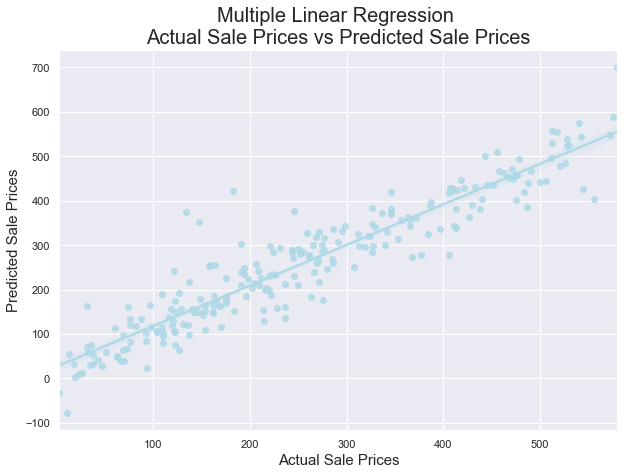

In [208]:
plt.figure(figsize = (10,7))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'lightblue')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Multiple Linear Regression \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Regularization with Lasso

In [209]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.0375081009191209

In [210]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0375081009191209)

In [211]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  87.6 %


In [212]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
lassopred = lasso_reg.predict(X_test)

print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R2 Score for Tuned Lasso Regression Model: 0.8764302986062372
Mean Absolute Error for our Tuned Lasso Regression Model: 36.67172346134557
Mean Squared Error for our Tuned Lasso Regression Model: 2736.5603287131994
Root Mean Squared Error for our Lasso Linear Regression Model: 52.31214322423809


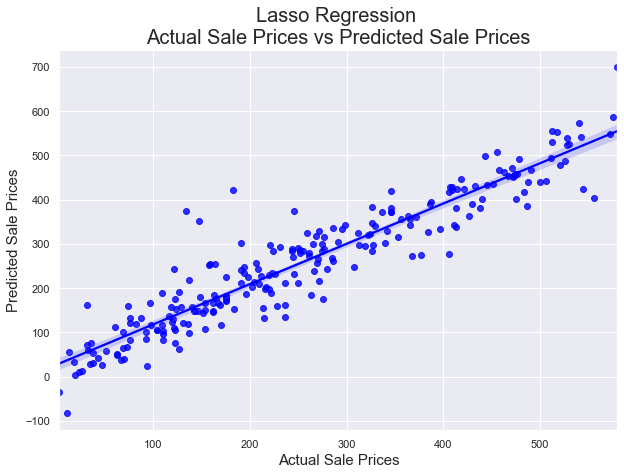

In [213]:
plt.figure(figsize = (10,7))
sns.regplot(x=y_test,y=lassopred,data=X, color = 'blue')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Lasso Regression \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Decision Tree Regressor

In [214]:
#Model instantiating and fitting

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [215]:
#Applying Evaluation metrics to our Regression model
prd = dt.predict(X_test)

print('R squared for our Linear Regression Model:', r2_score(y_test,prd))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,prd))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,prd))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,prd)))

R squared for our Linear Regression Model: 0.7386688136474973
Mean Absolute Error for our Linear Regression Model: 55.52991452991453
Mean Squared Error for our Linear Regression Model: 5787.410256410257
Root Mean Squared Error for our Linear Regression Model: 76.07503043975899


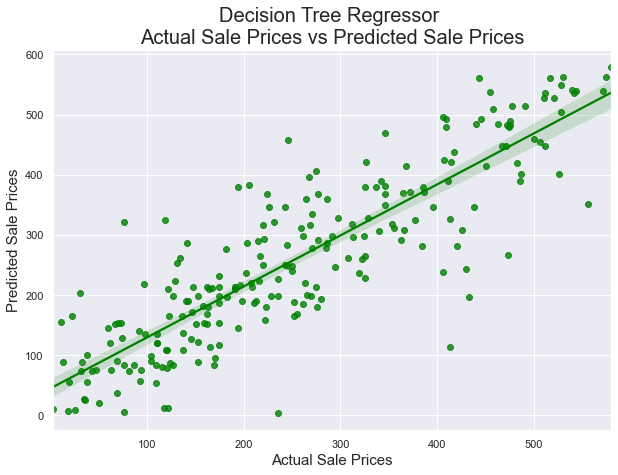

In [216]:
plt.figure(figsize = (10,7))
sns.regplot(x=y_test,y=prd,data=X, color = 'green')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Decision Tree Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Random Forest Regressor

In [217]:
# Model Instantiating and fitting
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
r2_score(y_test,pred)

0.8834552296509159

In [218]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.8834552296509159
Mean Absolute Error for our Random Forest Regressor Model: 37.93884615384615
Mean Squared Error for our Random Forest Regressor Model: 2580.9870175213678
Root Mean Squared Error for our Random Forest Regressor Model: 50.80341541197174


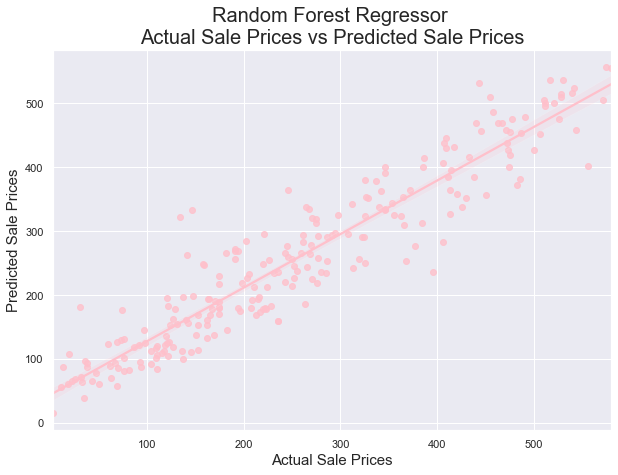

In [219]:
plt.figure(figsize = (10,7))
sns.regplot(x=y_test,y=pred,data=X, color = 'pink')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Random Forest Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Regularization with Ridge

In [220]:
#Ridge will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas= np.arange(0.001,0.2,0.001),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.136, 0.137, 0.138, 0.139, 0.14 , 0.141, 0.142, 0.143, 0.144,
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199]),
        normalize=True)

In [221]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.057)

In [222]:
#Applying Evaluation metrics to our Tuned Ridge Regression model
ridgepred = ridge_model.predict(X_test)

print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,ridgepred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,ridgepred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,ridgepred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,ridgepred)))

R2 Score for Tuned Ridge Regression Model: 0.876286379126788
Mean Absolute Error for our Tuned Ridge Regression Model: 36.66266486470827
Mean Squared Error for our Tuned Ridge Regression Model: 2739.747552875333
Root Mean Squared Error for our Ridge Linear Regression Model: 52.342597880458065


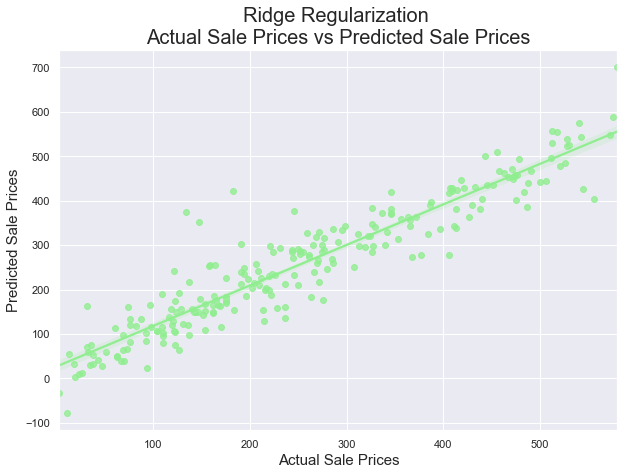

In [223]:
#Plotting Regression Line
plt.figure(figsize = (10,7))
sns.regplot(x=y_test,y=ridgepred,data=X, color = 'lightgreen')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Ridge Regularization \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Ordinary least square using stats model

In [224]:
lm1 = smf.ols(formula = 'y ~ X',data = train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:23:14   Log-Likelihood:                -6088.2
No. Observations:                1168   AIC:                         1.233e+04
Df Residuals:                    1090   BIC:                         1.273e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -271.9806     61.599     -4.415      0.000    -392.847    -151.114
X[0]           0.0377      0.383      0.098      0.922      -0.714       0.789
X[1]         -10.2952      2.708     -3.802      0.000     -15.608      -4.982
X[2]           0.0335      0.049      0.683      0.495      -0.063       0.130
X[3]           0.0335      0.049      0.683      0.495      -0.063       0.130
X[4]          55.0473     24.968      2.205      0.028       6.056     104.039
X[5]           8.7967      6.186      1.422      0.155      -3.340      20.934
X[6]          -2.5388      1.066     -2.381      0.017      -4.631      -0.447
X[7]           1.2215      2.192      0.557      0.577      -3.080       5.523
X[8]       -4.311e-12   2.51e-12     -1.720      0.086   -9.23e-12    6.08e-13
X[9]          -0.5727      0.881     -0.650      0.516      -2.301       1.156
X[10]         14.9886      5.721      2.620      0.009       3.763      26.215
X[11]         -0.0972      0.254     -0.383      0.702      -0.595       0.400
X[12]          0.3633      1.668      0.218      0.828      -2.909       3.636
X[13]        -12.1571      5.705     -2.131      0.033     -23.352      -0.963
X[14]         -5.7766      2.484     -2.326      0.020     -10.650      -0.904
X[15]         -0.3928      1.169     -0.336      0.737      -2.687       1.902
X[16]         19.3700      1.962      9.874      0.000      15.521      23.219
X[17]         12.1051      1.690      7.163      0.000       8.789      15.421
X[18]          0.7419      0.138      5.362      0.000       0.470       1.013
X[19]          0.3807      0.111      3.425      0.001       0.163       0.599
X[20]         -0.6844      1.845     -0.371      0.711      -4.304       2.935
X[21]          2.1733      2.310      0.941      0.347      -2.360       6.706
X[22]         -2.0383      0.908     -2.245      0.025      -3.820      -0.257
X[23]          1.7240      0.814      2.119      0.034       0.128       3.320
X[24]          1.1597      2.595      0.447      0.655      -3.932       6.252
X[25]         -0.0393      0.023     -1.711      0.087      -0.084       0.006
X[26]         -5.7168      3.153     -1.813      0.070     -11.903       0.469
X[27]         -0.8384      2.005     -0.418      0.676      -4.772       3.095
X[28]          2.0892      2.734      0.764      0.445      -3.275       7.453
X[29]         -2.1623      1.693     -1.277      0.202      -5.484       1.159
X[30]          1.7934      1.543      1.162      0.246      -1.235       4.822
X[31]         -1.8162      1.443     -1.259      0.208      -4.648       1.015
X[32]         -0.9598      0.847     -1.133      0.257      -2.622       0.702
X[33]         -0.0244      0.027     -0.918      0.359      -0.076       0.028
X[34]          0.7988      1.791      0.446      0.656      -2.716       4.314
X[

### KNN Regressor

In [225]:
#Model fitting and Instantiating

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [226]:
print("Model Confidence on training Dataset: ",knn.score(X_train,y_train)*100,'%')
print("Model Confidence on test Dataset:",knn.score(X_test,y_test)*100,'%')

Model Confidence on training Dataset:  85.26357600367078 %
Model Confidence on test Dataset: 72.74266020980163 %


In [227]:
knnpred  = knn.predict(X_test)
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for KNN Regression Model:', r2_score(y_test,knnpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,knnpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,knnpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,knnpred)))

R2 Score for KNN Regression Model: 0.7274266020980162
Mean Absolute Error for our KNN Regression Model: 54.85897435897436
Mean Squared Error for our KNN Regression Model: 6036.378974358975
Root Mean Squared Error for our KNN Regression Model: 77.69413732296006


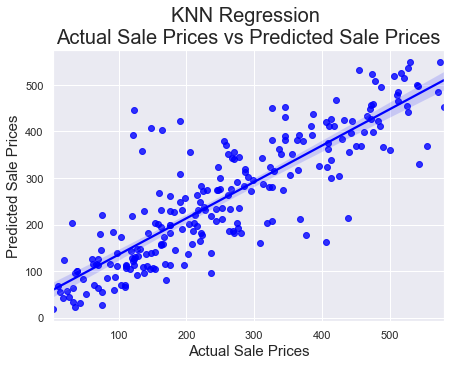

In [228]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'blue')
plt.xlabel('Actual Sale Prices',fontsize = 15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('KNN Regression \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Gradient Boosting Regressor

In [229]:
#Model Instantiating and fitting

gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [230]:
grpred = gradient.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,grpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,grpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,grpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,grpred)))

R2 Score for Gradient Boostin Regresser Model: 0.8839001701445616
Mean Absolute Error for our Gradient Boostin Regresser Model: 36.643359602193
Mean Squared Error for our Gradient Boostin Regresser Model: 2571.1334167615137
Root Mean Squared Error for our Gradient Boostin Regresser Model: 50.70634493593


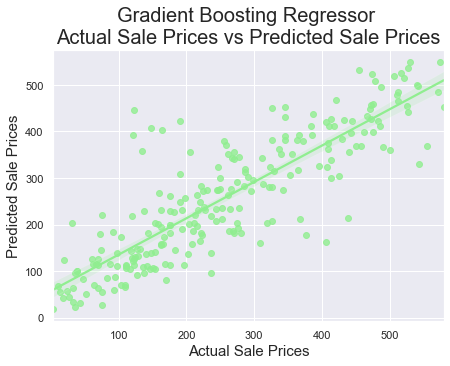

In [231]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'lightgreen')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Gradient Boosting Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Bagging Regressor

In [232]:
#Model Instantiating and fitting

bagging = BaggingRegressor()
bagging.fit(X_train,y_train)

BaggingRegressor()

In [233]:
bgpred = bagging.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Bagging Regresser Model:', r2_score(y_test,bgpred))
print('Mean Absolute Error for our Bagging Regresser Model:',mean_absolute_error(y_test,bgpred))
print('Mean Squared Error for our Bagging Regresser Model:',mean_squared_error(y_test,bgpred))
print('Root Mean Squared Error for our Bagging Regresser Model:',np.sqrt(mean_squared_error(y_test,bgpred)))

R2 Score for Bagging Regresser Model: 0.8737723752083535
Mean Absolute Error for our Bagging Regresser Model: 39.0076923076923
Mean Squared Error for our Bagging Regresser Model: 2795.4223931623937
Root Mean Squared Error for our Bagging Regresser Model: 52.871754209241004


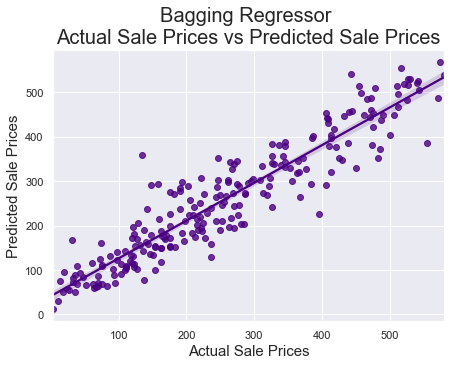

In [234]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=bgpred,data=X, color = 'indigo')
plt.xlabel('Actual Sale Prices',fontsize =15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('Bagging Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### AdaBoost Regressor

In [235]:
#Model Instantiating and fitting

ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [236]:
adapred = ada.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Adaptive Boostin Regresser Model:', r2_score(y_test,adapred))
print('Mean Absolute Error for our Adaptive Boostin Regresser Model:',mean_absolute_error(y_test,adapred))
print('Mean Squared Error for our Adaptive Boostin Regresser Model:',mean_squared_error(y_test,adapred))
print('Root Mean Squared Error for our Adaptive Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,adapred)))

R2 Score for Adaptive Boostin Regresser Model: 0.8286716038439668
Mean Absolute Error for our Adaptive Boostin Regresser Model: 48.11605459230576
Mean Squared Error for our Adaptive Boostin Regresser Model: 3794.2188644499315
Root Mean Squared Error for our Adaptive Boostin Regresser Model: 61.59723098037713


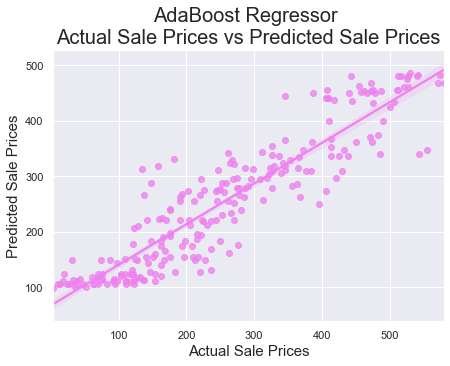

In [237]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=adapred,data=X, color = 'violet')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('AdaBoost Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### XGB Regressor

In [238]:
#Model fitting and Instantiating
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [239]:
#Applying Evaluation metrics to our Tuned Ridge Regression model
xgbpred = xgb.predict(X_test)

print('R2 Score for XGB Regressor Model:', r2_score(y_test,xgbpred))
print('Mean Absolute Error for our Tuned XGB Regressor Model:',mean_absolute_error(y_test,xgbpred))
print('Mean Squared Error for our Tuned XGB Regressor Model:',mean_squared_error(y_test,xgbpred))
print('Root Mean Squared Error for our XGB Regressor Model:',np.sqrt(mean_squared_error(y_test,xgbpred)))

R2 Score for XGB Regressor Model: 0.8777828082070237
Mean Absolute Error for our Tuned XGB Regressor Model: 38.52887074152628
Mean Squared Error for our Tuned XGB Regressor Model: 2706.607807375289
Root Mean Squared Error for our XGB Regressor Model: 52.02506902806847


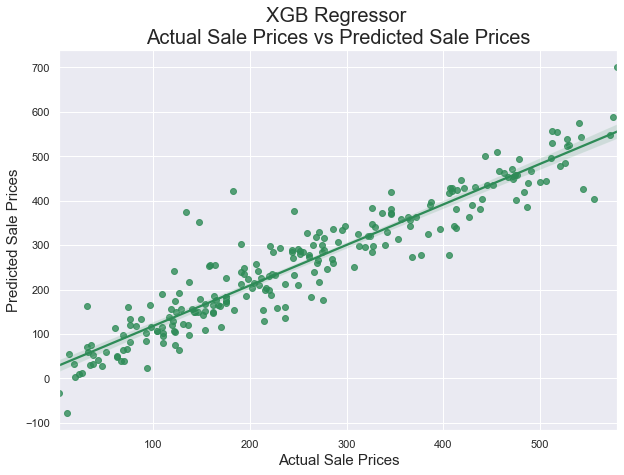

In [240]:
#Plotting Regression Line
plt.figure(figsize = (10,7))
sns.regplot(x=y_test,y=ridgepred,data=train, color = 'seagreen')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('XGB Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Feature Selection and Model Building with Selected Features

In [241]:
from sklearn.feature_selection import SelectKBest, f_regression

In [242]:
# Selecting k as 7
best_features = SelectKBest(score_func=f_regression, k=7)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']
         
#Sorting in Descending order
print(feature_scores.nlargest(    60 ,'Score'))

     Feature_Name        Score
16    OverallQual  2342.436476
45      GrLivArea  1374.519159
60     GarageCars   946.788901
61     GarageArea   894.885854
37    TotalBsmtSF   732.478815
48       FullBath   706.396996
18      YearBuilt   695.353479
29       BsmtQual   682.443221
26      ExterQual   654.377541
58    GarageYrBlt   641.704475
42       1stFlrSF   606.505082
19   YearRemodAdd   602.104673
52    KitchenQual   526.018170
53   TotRmsAbvGrd   438.305668
57     GarageType   420.712031
55     Fireplaces   367.171443
39      HeatingQC   311.726913
59   GarageFinish   303.922575
28     Foundation   256.168671
25     MasVnrArea   251.597121
66    OpenPorchSF   231.241319
43       2ndFlrSF   227.774174
2     LotFrontage   162.602190
3         LotArea   162.602190
33     BsmtFinSF1   144.782019
65     WoodDeckSF   141.988719
49       HalfBath   138.074487
63     GarageCond   115.387261
40     CentralAir   108.549357
6        LotShape   105.382324
31   BsmtExposure   102.872778
41     E

In [243]:
X_new = X[['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','FullBath','YearBuilt', 'BsmtQual','ExterQual',
          'GarageYrBlt','1stFlrSF','YearRemodAdd','KitchenQual','TotRmsAbvGrd','GarageType','Fireplaces','HeatingQC','GarageFinish',
          'Foundation','MasVnrArea','OpenPorchSF','2ndFlrSF','LotFrontage','LotArea','BsmtFinSF1','WoodDeckSF','HalfBath','GarageCond',
          'CentralAir','LotShape','BsmtExposure','Electrical','PavedDrive','HouseStyle','GarageQual','SaleCondition','BsmtFullBath',
          'MSZoning','BsmtUnfSF','BedroomAbvGr','Neighborhood','Fence','KitchenAbvGr','RoofStyle','Exterior2nd','Exterior1st',
          'Condition1','ExterCond','Functional','EnclosedPorch','RoofMatl','Heating','Alley','BsmtFinType1','ScreenPorch','BsmtCond',
          'MoSold','3SsnPorch','PoolQC','OverallCond']]
        
X_new.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  \
0            5         70           2         118          286         2   
1            7        646           2         248          624         2   
2            6        585           2         129          312         2   
3            5        520           2         200          590         2   
4            5        399           2         188          537         2   

   YearBuilt  BsmtQual  ExterQual  GarageYrBlt  1stFlrSF  YearRemodAdd  \
0         75         2          3           64       180            26   
1         69         4          2           57       654            20   
2         95         2          2           84       295            47   
3         76         2          3           64       617            27   
4         76         2          2           64       541            50   

   KitchenQual  TotRmsAbvGrd  GarageType  Fireplaces  HeatingQC  GarageFinish  \
0            3             3           1           1          4             2   
1            2             6           1           1          0             3   
2            3             6           1           1          0             3   
3            3             5           1           1          0             2   
4            2             6           1           1          2             0   

   Foundation  MasVnrArea  OpenPorchSF  2ndFlrSF  LotFrontage  LotArea  \
0           1           0          144         0           41       41   
1           2           0          145         0           66       66   
2           2           0          101       215           63       63   
3           1         236           95         0           76       76   
4           1          73            0         0           41       41   

   BsmtFinSF1  WoodDeckSF  HalfBath  GarageCond  CentralAir  LotShape  \
0          25           0         0           5           1         0   
1         112          29         0           5           1         0   
2         382          96         1           5           1         0   
3         312           0         0           5           1         0   
4         489         140         0           5           1         0   

   BsmtExposure  Electrical  PavedDrive  HouseStyle  GarageQual  \
0             3           4           2           2           5   
1             1           4           2           2           5   
2             0           4           2           5           5   
3             3           4           2           2           5   
4             3           4           2           2           5   

   SaleCondition  BsmtFullBath  MSZoning  BsmtUnfSF  BedroomAbvGr  \
0              4             0         3        500             2   
1              4             1         3        527             4   
2              4             1         3        135             3   
3              4             0         3        558             3   
4              4             0         3        192             3   

   Neighborhood  Fence  KitchenAbvGr  RoofStyle  Exterior2nd  Exterior1st  \
0            13      4             1          1            9            8   
1            12      4             1          0           13           12   
2            15      4             1          1            7            7   
3            14      2             1          3            9            8   
4            14      4             1          1            4            4   

   Condition1  ExterCond  Functional  EnclosedPorch  RoofMatl  Heating  Alley  \
0           2          4           6              0         1        1      1   
1           2          2           6              0         5        1      1   
2           2          4           6              0         1        1      1   
3           2          4           6              0         1        1      1   
4           2          4           6        

In [244]:
#Retriving same features for our testing dataset

Test = test[['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','FullBath','YearBuilt', 'BsmtQual','ExterQual',
          'GarageYrBlt','1stFlrSF','YearRemodAdd','KitchenQual','TotRmsAbvGrd','GarageType','Fireplaces','HeatingQC','GarageFinish',
          'Foundation','MasVnrArea','OpenPorchSF','2ndFlrSF','LotFrontage','LotArea','BsmtFinSF1','WoodDeckSF','HalfBath','GarageCond',
          'CentralAir','LotShape','BsmtExposure','Electrical','PavedDrive','HouseStyle','GarageQual','SaleCondition','BsmtFullBath',
          'MSZoning','BsmtUnfSF','BedroomAbvGr','Neighborhood','Fence','KitchenAbvGr','RoofStyle','Exterior2nd','Exterior1st',
          'Condition1','ExterCond','Functional','EnclosedPorch','RoofMatl','Heating','Alley','BsmtFinType1','ScreenPorch','BsmtCond',
          'MoSold','3SsnPorch','PoolQC','OverallCond']]
Test.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  \
0            6        202           3         129          217         2   
1            5         93           2         104          139         1   
2            5        189           2          89          209         2   
3            4        137           1           6           31         1   
4            3        204           3         126           76         2   

   YearBuilt  BsmtQual  ExterQual  GarageYrBlt  1stFlrSF  YearRemodAdd  \
0         79         0          2           66       228            52   
1         60         2          2           46       166            31   
2         75         2          2           62       222            47   
3         25         4          3           13        56             0   
4         81         2          2           68        64            53   

   KitchenQual  TotRmsAbvGrd  GarageType  Fireplaces  HeatingQC  GarageFinish  \
0            2             5           1           1          0             0   
1            2             1           1           1          2             2   
2            0             4           1           1          0             2   
3            1             4           1           1          0             3   
4            2             6           3           1          0             0   

   Foundation  MasVnrArea  OpenPorchSF  2ndFlrSF  LotFrontage  LotArea  \
0           2          45           27         0           48      214   
1           1           0            0         0           31       34   
2           2           0           72         0           31      179   
3           1           0            0        40           40      184   
4           2          11            3        92           48      219   

   BsmtFinSF1  WoodDeckSF  HalfBath  GarageCond  CentralAir  LotShape  \
0         170          46         0           5           1         0   
1         151           9         0           5           1         0   
2           0          50         0           5           1         3   
3          28           0         1           5           1         3   
4           0          17         1           5           1         0   

   BsmtExposure  Electrical  PavedDrive  HouseStyle  GarageQual  \
0             1           3           2           2           5   
1             0           3           2           2           5   
2             0           3           2           2           5   
3             3           3           2           5           5   
4             2           3           2           5           5   

   SaleCondition  BsmtFullBath  MSZoning  BsmtUnfSF  BedroomAbvGr  \
0              2             1         2        139             3   
1              0             1         2         24             1   
2              2             0         2        228             3   
3              2             0         2         92             3   
4              2             0         2        181             4   

   Neighborhood  Fence  KitchenAbvGr  RoofStyle  Exterior2nd  Exterior1st  \
0            21      4             0          3           11            9   
1            21      4             0          1            5            5   
2             4      4             0          3           11            9   
3             5      4             0          1            7            6   
4            20      4             0          1           11            9   

   Condition1  ExterCond  Functional  EnclosedPorch  RoofMatl  Heating  Alley  \
0           2          3           5              0         0        0      1   
1           2          3           5              0         0        0      1   
2           2          3           5              0         0        0      1   
3           2          3           5              0         0        0      1   
4           1          3           5        

In [245]:
#Using Train_test_Split for splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.20)

### Multiple Linear Regression

In [246]:
#Model Instantiating and Fitting

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [247]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  90.51 %
Linear Regression Model Confidence on testing set :  91.08 %


In [248]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [249]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  -86.02077439751105 

Features and their corresponding weights:


features  coefficients
0     MSSubClass     15.898756
1       MSZoning      0.242360
2    LotFrontage     17.274459
3        LotArea      0.059850
4         Street      0.161509
5          Alley      6.183154
6       LotShape      0.851761
7    LandContour     -3.716650
8      Utilities     -2.803644
9      LotConfig     -0.205398
10     LandSlope      0.017095
11  Neighborhood      0.266796
12    Condition1     -7.640892
13    Condition2     -1.288453
14      BldgType     -1.937768
15    HouseStyle     14.101184
16   OverallQual     -4.221520
17   OverallCond     -4.143414
18     YearBuilt      1.949470
19  YearRemodAdd     -0.034462
20     RoofStyle      0.009326
21      RoofMatl      0.068822
22   Exterior1st      0.079213
23   Exterior2nd      0.079213
24    MasVnrType      0.001029
25    MasVnrArea      0.079755
26     ExterQual      2.255198
27     ExterCond     -0.588422
28    Foundation      9.001354
29      BsmtQual     -3.694670
30      BsmtCond     -2.861407
31  BsmtExposure     -2.632755
32  BsmtFinType1     -0.204388
33    BsmtFinSF1      0.041029
34  BsmtFinType2      0.923157
35    BsmtFinSF2      6.114337
36     BsmtUnfSF      8.898635
37   TotalBsmtSF    -11.965456
38       Heating     -0.042749
39     HeatingQC     -2.344956
40    CentralAir     -0.081230
41    Electrical      0.352635
42      1stFlrSF    -57.027708
43      2ndFlrSF     -1.726839
44  LowQualFinSF      2.019533
45     GrLivArea     -1.993183
46  BsmtFullBath      1.488924
47  BsmtHalfBath     -0.217396
48      FullBath      7.629457
49      HalfBath      0.149320
50  BedroomAbvGr      5.061985
51  KitchenAbvGr      5.242993
52   KitchenQual      3.864815
53  TotRmsAbvGrd     -0.576500
54    Functional      0.506660
55    Fireplaces      1.261616
56   FireplaceQu      1.032630
57    GarageType      1.170587
58   GarageYrBlt      9.552206
59  GarageFinish     14.229963

In [250]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.9107618642768847
Mean Absolute Error for our Linear Regression Model: 33.83131942127992
Mean Squared Error for our Linear Regression Model: 1994.739630604925
Root Mean Squared Error for our Linear Regression Model: 44.66250810920637


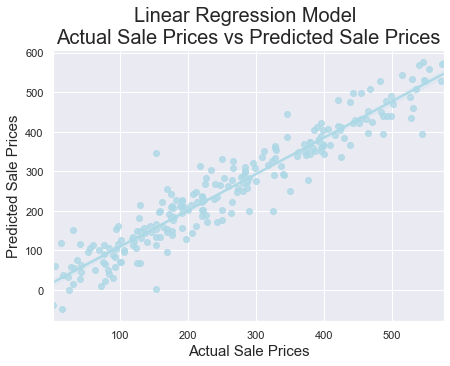

In [251]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=y_pred,data=X_new, color = 'lightblue')
plt.xlabel('Actual Sale Prices', fontsize =15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('Linear Regression Model \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Lasso Regularization

In [252]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.07431734286242764

In [253]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.07431734286242764)

In [254]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  91.10000000000001 %


In [255]:
#Applying Evaluation metrics to our Regression model
lassopred = lasso_reg.predict(X_test)
print('R squared for our Lasso Regularization Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Lasso Regularization Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Lasso Regularization Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Regularization Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R squared for our Lasso Regularization Model: 0.9106484734187648
Mean Absolute Error for our Lasso Regularization Model: 33.794869745011695
Mean Squared Error for our Lasso Regularization Model: 1997.2742559263456
Root Mean Squared Error for our Lasso Regularization Model: 44.690874414429906


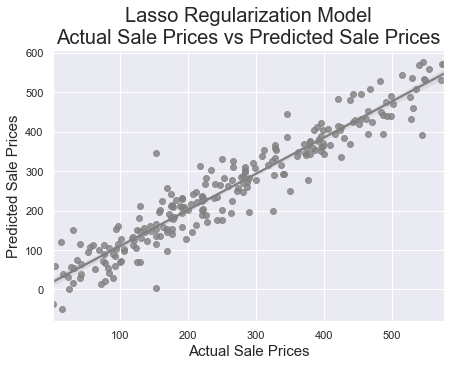

In [256]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=lassopred,data=X_new, color = 'grey')
plt.xlabel('Actual Sale Prices', fontsize =15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('Lasso Regularization Model\nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Decision Tree Regressor

In [257]:
#Model instantiating and fitting

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [258]:
#Applying Evaluation metrics to our Regression model
prd = dt.predict(X_test)

print('R squared for our Decision Tree Regression Model:', r2_score(y_test,prd))
print('Mean Absolute Error for our  Decision Tree Regression Model:',mean_absolute_error(y_test,prd))
print('Mean Squared Error for our  Decision Tree Regression Model:',mean_squared_error(y_test,prd))
print('Root Mean Squared Error for our  Decision Tree Regression Model:',np.sqrt(mean_squared_error(y_test,prd)))

R squared for our Decision Tree Regression Model: 0.7550719271021771
Mean Absolute Error for our  Decision Tree Regression Model: 53.37179487179487
Mean Squared Error for our  Decision Tree Regression Model: 5474.876068376068
Root Mean Squared Error for our  Decision Tree Regression Model: 73.99240547769797


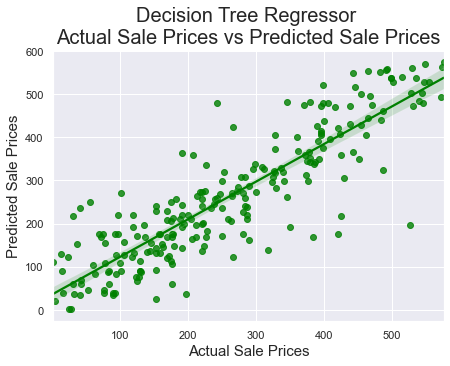

In [259]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=prd,data=X_new, color = 'green')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('Decision Tree Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Random Forest Regressor

In [260]:
# Model Instantiating and fitting
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [261]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.9025696535139809
Mean Absolute Error for our Random Forest Regressor Model: 35.49068376068376
Mean Squared Error for our Random Forest Regressor Model: 2177.860079487179
Root Mean Squared Error for our Random Forest Regressor Model: 46.66754846236493


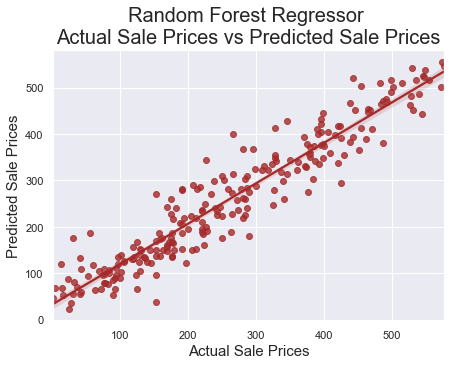

In [262]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=pred,data=X_new, color = 'brown')
plt.xlabel('Actual Sale Prices', fontsize = 15 )
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('Random Forest Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### KNN Regressor

In [263]:
#Model fitting and Instantiating

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [264]:
print("Model Confidence on training Dataset: ",knn.score(X_train,y_train)*100,'%')
print("Model Confidence on test Dataset:",knn.score(X_test,y_test)*100,'%')

Model Confidence on training Dataset:  84.70437811657835 %
Model Confidence on test Dataset: 78.80729308305551 %


In [265]:
knnpred  = knn.predict(X_test)
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for KNN Regression Model:', r2_score(y_test,knnpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,knnpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,knnpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,knnpred)))

R2 Score for KNN Regression Model: 0.7880729308305552
Mean Absolute Error for our KNN Regression Model: 49.969230769230776
Mean Squared Error for our KNN Regression Model: 4737.204786324787
Root Mean Squared Error for our KNN Regression Model: 68.8273549275634


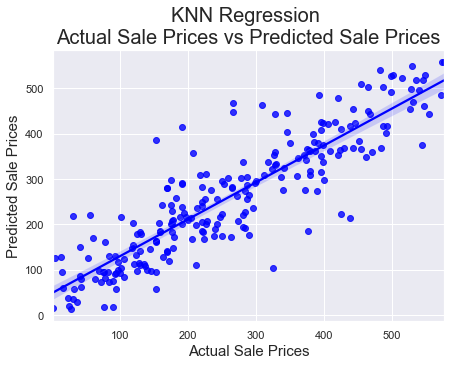

In [266]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=knnpred,data=X_new, color = 'blue')
plt.xlabel('Actual Sale Prices',fontsize = 15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('KNN Regression \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Gradient Boosting Regressor

In [267]:
#Model Instantiating and fitting

gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [268]:
grpred = gradient.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,grpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,grpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,grpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,grpred)))

R2 Score for Gradient Boostin Regresser Model: 0.9103688212835161
Mean Absolute Error for our Gradient Boostin Regresser Model: 33.25032830183075
Mean Squared Error for our Gradient Boostin Regresser Model: 2003.5253187981043
Root Mean Squared Error for our Gradient Boostin Regresser Model: 44.7607564591809


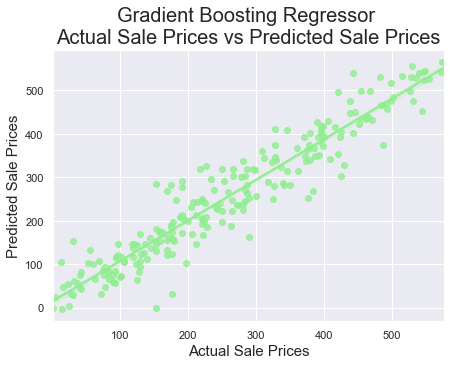

In [269]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=grpred,data=X_new, color = 'lightgreen')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Gradient Boosting Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Bagging Regressor

In [270]:
#Model Instantiating and fitting

bagging = BaggingRegressor()
bagging.fit(X_train,y_train)

BaggingRegressor()

In [271]:
bgpred = bagging.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Bagging Regresser Model:', r2_score(y_test,bgpred))
print('Mean Absolute Error for our Bagging Regresser Model:',mean_absolute_error(y_test,bgpred))
print('Mean Squared Error for our Gradient Bagging Model:',mean_squared_error(y_test,bgpred))
print('Root Mean Squared Error for our Bagging Regresser Model:',np.sqrt(mean_squared_error(y_test,bgpred)))

R2 Score for Bagging Regresser Model: 0.8824121814959189
Mean Absolute Error for our Bagging Regresser Model: 39.23205128205128
Mean Squared Error for our Gradient Bagging Model: 2628.4399572649572
Root Mean Squared Error for our Bagging Regresser Model: 51.26831338424307


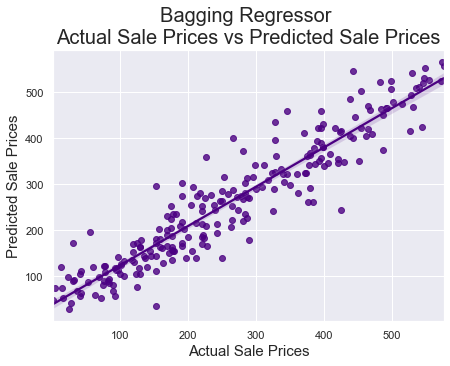

In [272]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=bgpred,data=X_new, color = 'indigo')
plt.xlabel('Actual Sale Prices',fontsize =15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('Bagging Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### AdaBoost Regressor

In [273]:
#Model Instantiating and fitting

ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [274]:
adapred = ada.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Adaptive Boostin Regresser Model:', r2_score(y_test,adapred))
print('Mean Absolute Error for our Adaptive Boostin Regresser Model:',mean_absolute_error(y_test,adapred))
print('Mean Squared Error for our Adaptive Boostin Regresser Model:',mean_squared_error(y_test,adapred))
print('Root Mean Squared Error for our Adaptive Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,adapred)))

R2 Score for Adaptive Boostin Regresser Model: 0.8541935402066068
Mean Absolute Error for our Adaptive Boostin Regresser Model: 45.62496654302478
Mean Squared Error for our Adaptive Boostin Regresser Model: 3259.211114074714
Root Mean Squared Error for our Adaptive Boostin Regresser Model: 57.08950090931531


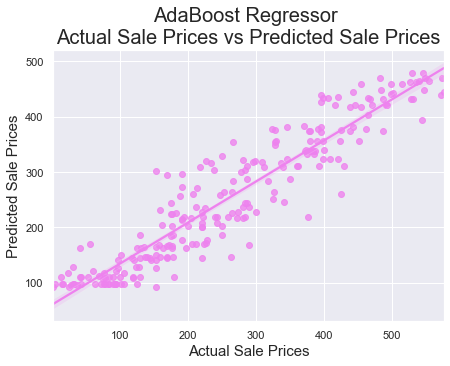

In [275]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=adapred,data=X_new, color = 'violet')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('AdaBoost Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### XGB Regressor

In [276]:
#Model fitting and Instantiating
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [277]:
#Applying Evaluation metrics to our Tuned Ridge Regression model
xgbpred = xgb.predict(X_test)

print('R2 Score for XGB Regressor Model:', r2_score(y_test,xgbpred))
print('Mean Absolute Error for our Tuned XGB Regressor Model:',mean_absolute_error(y_test,xgbpred))
print('Mean Squared Error for our Tuned XGB Regressor Model:',mean_squared_error(y_test,xgbpred))
print('Root Mean Squared Error for our XGB Regressor Model:',np.sqrt(mean_squared_error(y_test,xgbpred)))

R2 Score for XGB Regressor Model: 0.8789224341618407
Mean Absolute Error for our Tuned XGB Regressor Model: 39.60680871132092
Mean Squared Error for our Tuned XGB Regressor Model: 2706.446263108039
Root Mean Squared Error for our XGB Regressor Model: 52.02351644312444


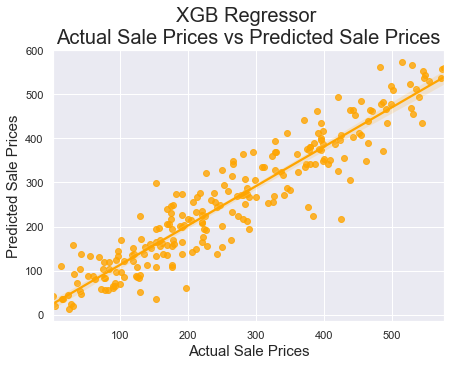

In [278]:
plt.figure(figsize = (7,5))
sns.regplot(x=y_test,y=xgbpred,data=X_new, color = 'orange')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices', fontsize = 15)
plt.title('XGB Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Conclusion :
- Among all other Gradient Boosting Regression Model seems to giving us high scores among all evaluation metrics : 
    - R_square Score: 0.912
    - MAE : 32.675
    - MSE : 1902.952
    - RMSE : 43.622

### Hyperparameter Tuning of Our Best Model

In [279]:
grid = {'loss': ['ls','ladd','huber','quantile'],
       'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
       'n_estimators': [10,20,30,40,50],
       'criterion': ['mse','friedman_mse','mae'],
        'min_samples_leaf' : [2,3,4,5,6],
        'min_samples_split' : [2,3,4,5]}

In [280]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = gradient, param_distributions = grid, 
                              n_iter = 100, cv = 3, verbose=2, random_state=42)

In [281]:
#Fitting our Random Search CV
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=mse, learning_rate=0.4, loss=ladd, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.4, loss=ladd, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END criterion=mse, learning_rate=0.4, loss=ladd, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.0s
[CV] END criterion=mae, learning_rate=0.8, loss=quantile, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END criterion=mae, learning_rate=0.8, loss=quantile, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   4.9s
[CV] END criterion=mae, learning_rate=0.8, loss=quantile, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END criterion=mae, learning_rate=0.3, loss=ls, min_samples_leaf=3, min_samples_split=2, n_estimators=30; total time=   2.8s
[CV] END c

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8],
                                        'loss': ['ls', 'ladd', 'huber',
                                                 'quantile'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=42, verbose=2)

In [282]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'loss': 'huber',
 'learning_rate': 0.2,
 'criterion': 'mse'}

In [283]:
#Model Instantiating and fitting

model = GradientBoostingRegressor(n_estimators = 40,min_samples_split = 2, min_samples_leaf = 6, loss = 'huber',
                                    learning_rate = 0.2, criterion = 'mse')
model.fit(X_train,y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.2, loss='huber',
                          min_samples_leaf=6, n_estimators=40)

In [284]:
pred = model.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Tuned Gradient Boostin Regresser Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Tuned Gradient Boostin Regresser Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our  Tuned Gradient Boostin Regresser Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Tuned Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Tuned Gradient Boostin Regresser Model: 0.9075177156127069
Mean Absolute Error for our Tuned Gradient Boostin Regresser Model: 33.95309944510303
Mean Squared Error for our  Tuned Gradient Boostin Regresser Model: 2067.2560705279666
Root Mean Squared Error for our Tuned Gradient Boostin Regresser Model: 45.467087772673175


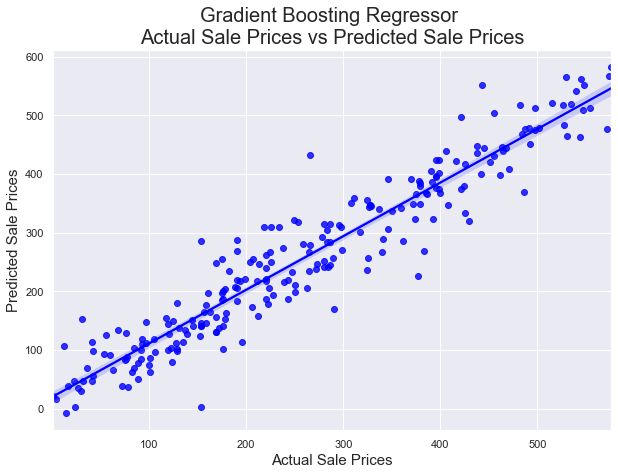

In [285]:
plt.figure(figsize = (10,7))
sns.regplot(x=y_test,y=pred,data=X_new, color = 'blue')
plt.xlabel('Actual Sale Prices', fontsize = 15)
plt.ylabel('Predicted Sale Prices',fontsize =15)
plt.title('Gradient Boosting Regressor \nActual Sale Prices vs Predicted Sale Prices',fontsize = 20)
plt.show()

### Saving Our Final Model

In [286]:
joblib.dump(model,"HouseSellingPricePrediction.pkl")

['HouseSellingPricePrediction.pkl']

### Loading Our Final Model

In [287]:
Model = joblib.load("HouseSellingPricePrediction.pkl")

In [288]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = Model.predict(Test)
prediction = pd.DataFrame(prediction)

In [289]:
#Creating a dataset of Actual vs Predicted Datapoints
House_Prices = pd.DataFrame({})
House_Prices['Actual_Sale_Prices'] = y[:290]
House_Prices['Predicted_Sale_Prices'] = prediction
House_Prices

Actual_Sale_Prices  Predicted_Sale_Prices
0                   129             264.072872
1                   468             157.733820
2                   470             188.398004
3                   326              67.918857
4                   379             127.721431
5                   385              10.428390
6                   112             116.368400
7                   220             219.530754
8                   175             143.544555
9                   101              87.220656
10                  106             -29.581304
11                  418              57.607637
12                  351              36.314190
13                  126             135.657104
14                  154             192.353474
15                  250              39.321852
16                  110              18.038382
17                  335              19.096219
18                  199              80.674868
19                   69             127.606612
20                  408              84.558354
21                  145              56.603442
22                  179              62.739504
23                  159             -41.522013
24                  194             -25.644994
25                  383              28.027545
26                   87              98.721496
27                  558              54.233635
28                   89              80.430591
29                  323               4.766846
30                  525              31.376102
31                  153             124.845554
32                  326             135.583778
33                  131              99.616747
34                  261              26.066984
35                  114             108.744019
36                  213              82.088592
37                  429              32.913221
38                  223              85.492258
39                   22              72.663401
40                  379              -1.439000
41                  142             215.094878
42                  188             133.759148
43                  137             120.516301
44                  206              71.544842
45                  120              27.142872
46                  290              20.356233
47                  196               4.930914
48                    3             123.534645
49                  220             254.176359
50                  514              33.008833
51                  448             162.103997
52                   10             -20.052985
53                  214             -19.598955
54                   32             150.565522
55                  406              71.656498
56                  297              66.816945
57                  326             112.685179
58                   71              32.668638
59                  421             168.845279
60                   74              50.068989
61                  117             108.930373
62                  280              40.098232
63                  403             100.197489
64                   98             133.645060
65                  542              17.864571
66                  137              96.056881
67                  137             145.738335
68                  350              75.767604
69                  199              44.157973
70                  273             202.433571
71                  396              81.030361
72                   31              86.508740
73                  276              49.000121
74                   21              82.615595
75                  502             153.510437
76                  153             248.019916
77                   36             155.737627
78                  570             202.948042
79                  379              58.880773
80                  358             172.563941
81                  127              19.205046
82                  231              25.221070
83                  265              89.696153
84        

In [290]:
#Converting the saved file into .csv format
House_Prices.to_csv('Results.csv',index = True)

In [291]:
Model =  ['Linear Regression','Lasso Regularization','Decision Tree Regressor','Random Forest Regressor','Ridge Regularization', 'K-Nearest Neighbors', 'Gradient Boost Regressor','Adaptive Boosting Regressor','Bagging Regressor','XGB Regressor']

In [292]:
## Model Evaluation Metrics without Feature Selection
models = pd.DataFrame( index = Model)

models['r2 Score (%)'] = [89.80, 89.82, 67.67, 87.74, 89.80, 78.00, 90.03, 85.81, 82.74, 87.29]
models['Mean Absolute Error'] = [33.854, 33.708, 58.307, 36.365, 33.853, 51.258, 31.632, 40.086,45.917, 36.375]
models['Mean Squared Error'] = [2079.483, 2075.761, 6595.470, 2499.598, 2079.964, 4486.526, 2032.8245, 2893.977, 3519.927, 2592.300]
models['Root Mean Squared Error'] = [45.601, 45.560, 81.212, 49.995, 45.606, 66.981, 45.086, 53.795, 59.328, 50.914] 
models

r2 Score (%)  Mean Absolute Error  \
Linear Regression                   89.80               33.854   
Lasso Regularization                89.82               33.708   
Decision Tree Regressor             67.67               58.307   
Random Forest Regressor             87.74               36.365   
Ridge Regularization                89.80               33.853   
K-Nearest Neighbors                 78.00               51.258   
Gradient Boost Regressor            90.03               31.632   
Adaptive Boosting Regressor         85.81               40.086   
Bagging Regressor                   82.74               45.917   
XGB Regressor                       87.29               36.375   

                             Mean Squared Error  Root Mean Squared Error  
Linear Regression                     2079.4830                   45.601  
Lasso Regularization                  2075.7610                   45.560  
Decision Tree Regressor               6595.4700                   81.212  
Random Forest Regressor               2499.5980                   49.995  
Ridge Regularization                  2079.9640                   45.606  
K-Nearest Neighbors                   4486.5260                   66.981  
Gradient Boost Regressor              2032.8245                   45.086  
Adaptive Boosting Regressor           2893.9770                   53.795  
Bagging Regressor                     3519.9270                   59.328  
XGB Regressor                         2592.3000                   50.914

In [293]:
Model =  ['Linear Regression','Lasso Regularization','Decision Tree Regressor','Random Forest Regressor', 'K-Nearest Neighbors', 'Gradient Boost Regressor','Adaptive Boosting Regressor','Bagging Regressor','XGB Regressor']

In [294]:
## Model Evaluation Metrics with Feature Selection

models = pd.DataFrame( index = Model)

models['r2 Score (%)'] = [90.61,90.65,72.01, 89.79, 77.70,90.40,87.52, 86.21, 88.62]
models['Mean Absolute Error'] = [31.601,31.532,53.273, 34.256, 48.414,33.259, 38.068, 41.380, 36.273]
models['Mean Squared Error'] = [1845.831,1837.91, 5505.700, 2008.345, 4387.328, 1888.172, 2454.555, 2713.086, 2238.999]
models['Root Mean Squared Error'] = [42.963,42.870, 74.200, 44.814,66.236, 43.453, 49.543, 52.087, 47.318]
models

r2 Score (%)  Mean Absolute Error  \
Linear Regression                   90.61               31.601   
Lasso Regularization                90.65               31.532   
Decision Tree Regressor             72.01               53.273   
Random Forest Regressor             89.79               34.256   
K-Nearest Neighbors                 77.70               48.414   
Gradient Boost Regressor            90.40               33.259   
Adaptive Boosting Regressor         87.52               38.068   
Bagging Regressor                   86.21               41.380   
XGB Regressor                       88.62               36.273   

                             Mean Squared Error  Root Mean Squared Error  
Linear Regression                      1845.831                   42.963  
Lasso Regularization                   1837.910                   42.870  
Decision Tree Regressor                5505.700                   74.200  
Random Forest Regressor                2008.345                   44.814  
K-Nearest Neighbors                    4387.328                   66.236  
Gradient Boost Regressor               1888.172                   43.453  
Adaptive Boosting Regressor            2454.555                   49.543  
Bagging Regressor                      2713.086                   52.087  
XGB Regressor                          2238.999                   47.318